<a href="https://colab.research.google.com/github/dsaldana/reinforcement-learning-course/blob/main/lab5_approximation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 5: Value-Function Approximation


## Exercise 1 SGD
Many real-world processes can be modeled as nonlinear relationships, and SGD is a standard tool to fit those models from data.  

**Example: Predicting energy consumption in a building**  
- Energy usage depends on **temperature**, **time of day**, and **occupancy**.  
- If you plot the data, the relationship might not be linear — it curves.  
- A simple way to approximate this nonlinear relation is to fit a **polynomial function** of temperature (or time).  

Now, imagine you’re collecting data continuously:  
- You get one data point (temperature, usage) at a time.  
- Instead of waiting to collect all data and computing a full batch update, you update your model incrementally with **SGD**.  
- This makes your learning **online, adaptive, and scalable** — just like in reinforcement learning.  

---

In this exercise, approximating a cubic polynomial is a simplified version of **predicting a nonlinear real-world phenomenon**.


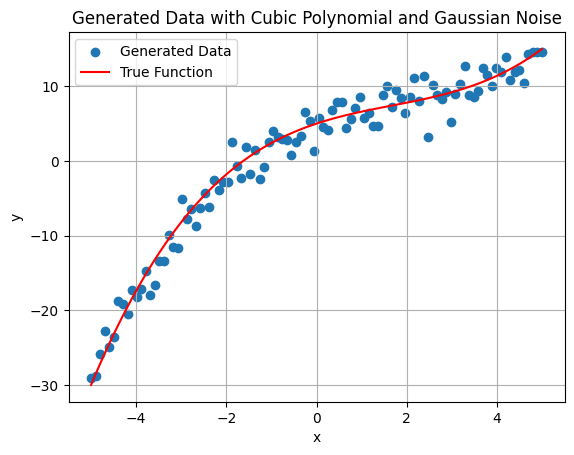

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data based on a cubic polynomial with Gaussian noise
np.random.seed(42)  # for reproducibility
n_samples = 100
x = np.linspace(-5, 5, n_samples)
# Define the true cubic polynomial function
def true_function(x):
  return 0.1 * x**3 - 0.5 * x**2 + 2 * x + 5

y_true = true_function(x)
noise = np.random.normal(0, 2, n_samples)  # Gaussian noise with mean 0 and std dev 2
y = y_true + noise

# Optional: Plot the generated data
plt.scatter(x, y, label='Generated Data')
plt.plot(x, y_true, color='red', label='True Function')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Generated Data with Cubic Polynomial and Gaussian Noise')
plt.legend()
plt.grid(True)
plt.show()

Based on the given a dataset of input–output pairs `(x, y)` where the underlying relationship is approximately polynomial.  

a. Use a **linear model with polynomial features**: Write a function that takes an input `x` and a weight vector `w`, and return the predicted value y_hat.    
   
   - y_hat(x; w) = w0 + w1 * x + w2 * x^2 + w3 * x^3  

   where w0, w1, w2, w3 are the parameters to be learned.

b. **Loss function (Mean Squared Error)**:
   Write a function that computes the loss for one training point `(x, y)`:

     - Formula: `loss = 0.5 * (y - y_hat)**2`

c. **SGD update**:   Derive the gradient of the loss with respect to each parameter (w0, w1, w2, w3).  
   - Write a function:  

     ```python
     def sgd_update(x, y, w, alpha):
         """
         Perform one SGD update for a single training example.
         Input:
             x (float) - input value
             y (float) - true output
             w (np.array) - current weights
             alpha (float) - learning rate
         Output:
             w (np.array) - updated weights
         """
         # TODO: compute prediction, gradient, and update weights
         return w
     ```
d. **Training loop**:
   - Loop over the dataset.  
   - At each step, update the weights using `sgd_update`.  
   - Track the training loss after each iteration.  

e. **Comparison with different learning rates**  
   - Train your model using at least three different learning rates, for example:  
     - alpha = 0.001  
     - alpha = 0.01  
     - alpha = 0.1  
   - Plot training loss vs iteration for each learning rate.  
   - Plot the final fitted polynomial curves for each learning rate on the same graph with the true dataset.

---

### Deliverables
- Code for `predict`, `mse_loss`, and `sgd_update`.  
- Training loop that runs with multiple learning rates.  
- Plot of training loss vs iteration for each learning rate.  
- Plot of the fitted polynomial vs dataset for each learning rate.  
- A short discussion:
  - How does the learning rate affect convergence speed and stability?  
    - A large learning rate tends to be less reliable because after convergence, even small errors can cause significant weight updates, making the process unstable. However, I noticed that it can lead to faster convergence at the beginning for large complicated datasets. On the other hand, very small learning rates result in much longer settling times but provide more stability and reliability in the later iterations, especially in the presence of noise.
  - Which learning rate gives the best balance between speed and accuracy?  
    -  A learning rate of 0.01 provides the best balance. It does not converge too rapidly, which helps avoid instability, while still being reliable against noise and in the later stages of training.

In [40]:
np.random.random((4,))


array([0.69701574, 0.70248408, 0.35949115, 0.29359184])

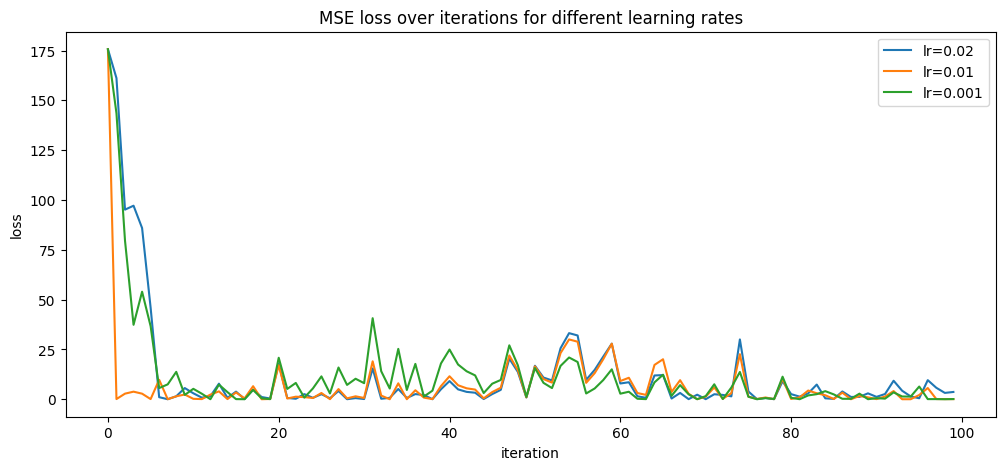

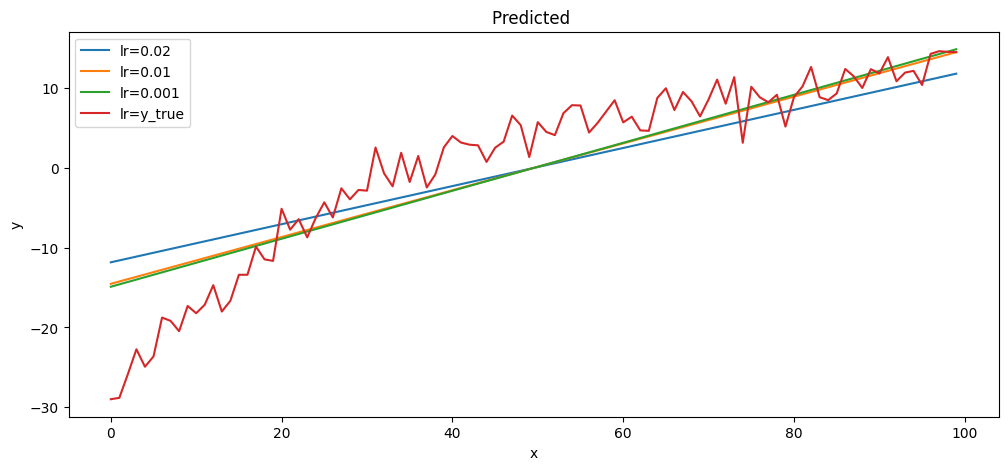

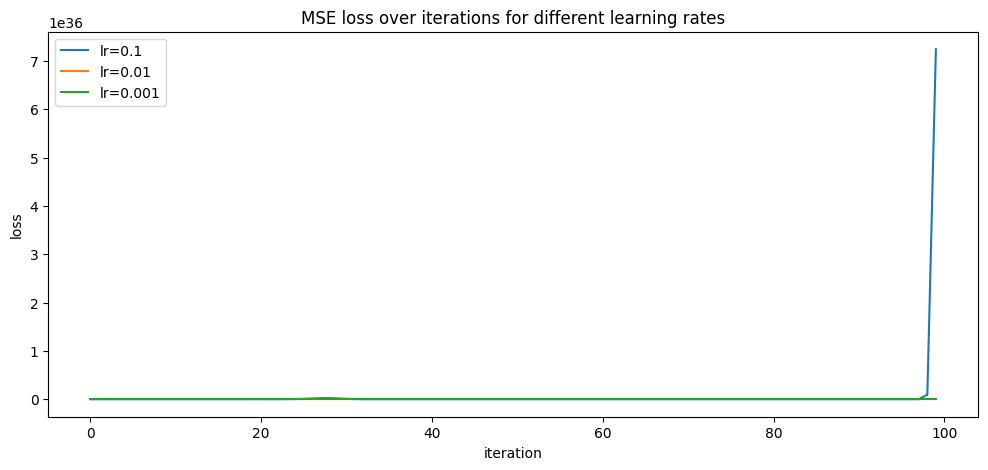

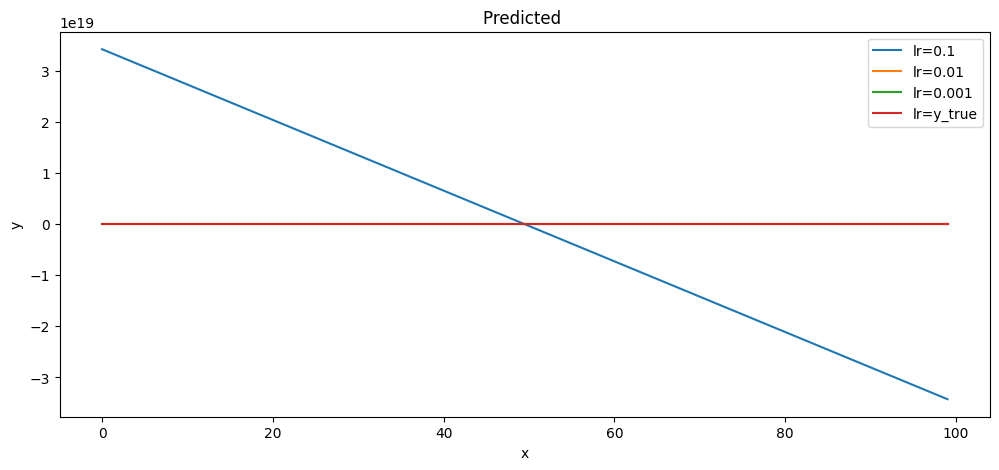

w1 = {0.02: array([0.77540321, 0.78087155, 0.43787862, 0.37197931]), 0.01: array([0.91041132, 0.91587966, 0.57288673, 0.50698742]), 0.001: array([0.92875832, 0.93422666, 0.59123373, 0.52533442])}
w2 = {0.1: array([-1.71297177e+18, -1.71297177e+18, -1.71297177e+18, -1.71297177e+18]), 0.01: array([0.91041132, 0.91587966, 0.57288673, 0.50698742]), 0.001: array([0.92875832, 0.93422666, 0.59123373, 0.52533442])}


In [64]:
## Your code here
import matplotlib.pyplot as plt

def mse_loss(y_loc, y_hat_loc):
  return 0.5 * (y_loc - y_hat_loc)**2

def sgd_update(x_loc, y_loc, w_loc, alpha_loc):
    """
    Perform one SGD update for a single training example.
    Input:
        x (float) - input value
        y (float) - true output
        w (np.array) - current weights
        alpha (float) - learning rate
    Output:
        w (np.array) - updated weights
    """
    # TODO: compute prediction, gradient, and update weights
    y_hat_loc = predict(w_loc, x_loc)
    loss_loc = mse_loss(y_hat_loc, y_loc)
    grad_loc = (y_hat_loc - y_loc) * x_loc
    w_loc -= alpha_loc * grad_loc
    return w_loc, loss_loc

def predict(w_loc, x_loc):
  return np.sum(w_loc.T * x_loc)

def train_model(x_loc, y_loc, learning_rates:list=(0.02, 0.01, 0.001,)):
    
    loss_loc = {_: [] for _ in learning_rates}
    w_loc = {_: np.array([0.69701574, 0.70248408, 0.35949115, 0.29359184])  for _ in learning_rates}
    # w_loc = {_: np.random.random((2,))  for _ in learning_rates}
    for learning_rate in loss_loc.keys():
        for i, sample in  enumerate(zip(x_loc, y_loc)):
            x_sample, y_sample = sample
            w_loc[learning_rate], temp_loss = sgd_update(x_sample, y_sample, w_loc[learning_rate], learning_rate)
            loss_loc[learning_rate].append(temp_loss)
    return w_loc, loss_loc

def plot_linear(dict_of_values: dict, x_label:str=None, y_label:str=None, title: str=None):
    plt.figure(figsize=(12,5))
    for lr, values in dict_of_values.items():
        plt.plot(values, label=f"lr={lr}")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()
    plt.show()

def train_and_plot(learning_rates=(0.02, 0.01, 0.001,)):
    w_values, loss_values = train_model(x, y, learning_rates=learning_rates)
    plot_linear(loss_values, x_label="iteration", y_label="loss", title="MSE loss over iterations for different learning rates")
    y_pred = {lr: [predict(w, x_) for x_ in x] for lr, w in w_values.items()}
    y_pred.update({'y_true': y})    
    plot_linear(y_pred, x_label="x", y_label="y", title="Predicted ")
    return w_values

w1 = train_and_plot(learning_rates=(0.02, 0.01, 0.001,))
w2 = train_and_plot(learning_rates=(0.1, 0.01, 0.001,))
print(f"{w1 = }\n{w2 = }")

## Exercise 2: 1000-State Random Walk with Semi-Gradient TD(0)

We will study the 1,000-state Random Walk a classic reinforcement learning benchmark from Sutton & Barto.  

- The environment has states numbered **1 to 1000**.  
- There are two **terminal states**:  
  - State `0` on the left (reward = 0)  
  - State `1001` on the right (reward = 1)  
- Each episode starts in the **middle** at state `500`.  
- At each step, the agent moves **left or right with equal probability (0.5 each)**.  
- The episode ends when the agent reaches either terminal.  
- Discount factor: **γ = 1.0** (episodic task).  


### Function Approximation
Instead of storing a separate value for each state, approximate the value function with a **linear function of the state index**: V_hat(s; w0, w1) = w0 + w1 * s



---

## Instructions
1. **Implement the environment**:  
   - You may **use AI tools such as ChatGPT** to generate the environment code (states, transitions, rewards).  
   - Make sure you understand how the environment works.  

2. **Implement the TD(0) update manually**:  
   - Do **not** use AI for this part.  
   - You must write the gradient update equations yourself using the formulas above.  

3. **Train your agent**:  
   - Run several episodes (e.g., 1000 episodes).  
   - Experiment with different step sizes (`alpha`).  

4. **Evaluate**:  
   - Plot the **true value function** `V*(s) = s/1001`.  
   - Plot your **learned approximation line** after training.  
   - Discuss whether the line captures the overall trend of the true values.  

---


## Guidelines on Using AI Tools
- You are encouraged to use AI tools (e.g., ChatGPT, Gemini, Copilot) to **generate helper code**, such as:  
  - Building the random walk environment (`reset`, `step`).  
  - Implementing the feature map φ(s).  
  - Plotting results.  
- However, **do not use AI tools to generate the TD(0) update equation**.  
  - Deriving and implementing the update is the key learning objective of this exercise.  
  - If we find code that uses an AI-generated update without understanding, the score will be zero.  


## Deliverables
- Python code for the environment and the TD(0) algorithm.  
- Plot the **true value function**: For state `s`, the probability of reaching the right terminal is:  
  `V*(s) = s / 1001`
- Plot comparing the true value function and the approximated line.  
- A short discussion:  
  - How does the approximation behave for small vs large states?  
  - How does the learning rate affect convergence?  

---

## Hints
- Normalize states to `[0,1]` before using them in the line approximation to avoid very large values for w1.  
- Start with small step sizes (e.g., 0.001–0.01).  
- The approximation will not be perfect (a line cannot match the true curve), but should capture the increasing trend.  


In [128]:
from tqdm import tqdm
import numpy as np


N_EPISODES = 1000000
DISCOUNT_FACTOR = 1.0
STEPS_PER_EPISODE = 50
STEP_SIZE = 0.001

class RandomWalk:
    def __init__(self, n_states: int=1000, p_left: float=0.5, initial_state: int=None):
        self.n_states = n_states
        self.initial_state = initial_state if initial_state else self.n_states // 2
        self.r_left_first = 0
        self.r_right_lst = 1
        self.r_regular = 0
        self.max_step_size = 100
        self.terminate_flag = None
        self.current_state = None
        self.reset()
        self.p_left_action = p_left
        
    def move(self, action:int):
        self.current_state += action
        if self.current_state < 1:
            self.terminate_flag = True
            reward_loc = self.r_left_first #0
        elif self.current_state > self.n_states:
            self.terminate_flag = True
            reward_loc = self.r_right_lst #1
        else:
            reward_loc = self.r_regular
            self.terminate_flag = False
        # if reward_loc: print("right reward!!!!!!!!!!!!")
        return reward_loc, self.current_state, self.terminate_flag
    
    # @staticmethod
    def get_action(self):
        # right_available = min(100, self.n_states-self.current_state)
        # left_available = min(100, self.current_state)
        return np.random.randint(- self.max_step_size, self.max_step_size+1)
        # return np.random.choice([-1, +1])
        # return int(np.random.random() > self.p_left_action)
    
    def reset(self):
        self.current_state = self.initial_state
        self.terminate_flag = False
        return self.current_state
        
def v_hat(s, w_loc): return w_loc[0] + w_loc[1] * (s / env.n_states)

def grad_v(s): return np.array([1.0, s / env.n_states])

w = np.zeros(2)
w = np.array([0.45, 0.7])
# w = np.random.random(2)

env = RandomWalk()
total_reward = []
for episode in tqdm(range(N_EPISODES)):
    state = env.reset()
    reward_step = []
    for step in range(STEPS_PER_EPISODE):
        action_current = env.get_action()
        r_current, state_next, terminate = env.move(action_current)
        delta = r_current + DISCOUNT_FACTOR * v_hat(state_next, w) - v_hat(state, w)
        w += STEP_SIZE * delta * grad_v(state)
        
        state = state_next
        reward_step.append(r_current)
    total_reward.append(np.sum(reward_step))
    # if episode % 500 == 0:
    #     temp = np.mean(total_reward[500 * (episode // 500):])
    #     print(f'Episode {episode}: {temp=}, {w=}, {terminate=}')


  0%|          | 1130/1000000 [00:00<02:56, 5660.50it/s]

Episode 0: temp=0.0, w=array([0.45005737, 0.69997659]), terminate=False
Episode 500: temp=0.0, w=array([1.45464939, 1.83973272]), terminate=True
Episode 1000: temp=1.0, w=array([2.43352254, 2.97165161]), terminate=False


  0%|          | 2281/1000000 [00:00<02:55, 5698.54it/s]

Episode 1500: temp=0.0, w=array([3.62720339, 4.35312689]), terminate=False
Episode 2000: temp=4.0, w=array([4.7770643 , 5.62529205]), terminate=True
Episode 2500: temp=0.0, w=array([5.80366935, 6.79239361]), terminate=False


  0%|          | 4017/1000000 [00:00<02:52, 5765.17it/s]

Episode 3000: temp=11.0, w=array([6.90962258, 8.03241613]), terminate=True
Episode 3500: temp=0.0, w=array([8.17469905, 9.53517604]), terminate=True
Episode 4000: temp=6.0, w=array([ 9.70295251, 11.24826   ]), terminate=True


  1%|          | 5176/1000000 [00:00<02:52, 5776.45it/s]

Episode 4500: temp=8.0, w=array([11.16900533, 12.76794798]), terminate=True
Episode 5000: temp=20.0, w=array([12.41486822, 14.21945219]), terminate=False
Episode 5500: temp=0.0, w=array([13.73225553, 15.66420279]), terminate=False


  1%|          | 6933/1000000 [00:01<02:52, 5773.09it/s]

Episode 6000: temp=0.0, w=array([15.33628065, 17.33074134]), terminate=False
Episode 6500: temp=0.0, w=array([16.83269777, 18.98416363]), terminate=False
Episode 7000: temp=0.0, w=array([17.90232821, 20.13105058]), terminate=False


  1%|          | 8092/1000000 [00:01<02:52, 5764.27it/s]

Episode 7500: temp=0.0, w=array([18.74900861, 21.13572824]), terminate=False
Episode 8000: temp=2.0, w=array([20.02330102, 22.52092916]), terminate=True
Episode 8500: temp=4.0, w=array([21.49270552, 24.07210774]), terminate=True


  1%|          | 9833/1000000 [00:01<02:52, 5751.60it/s]

Episode 9000: temp=0.0, w=array([22.59420289, 25.35420349]), terminate=False
Episode 9500: temp=0.0, w=array([23.41561032, 26.29176677]), terminate=False
Episode 10000: temp=0.0, w=array([24.80593918, 27.87393199]), terminate=False


  1%|          | 11573/1000000 [00:02<02:51, 5771.95it/s]

Episode 10500: temp=1.0, w=array([25.76248344, 29.07359149]), terminate=False
Episode 11000: temp=0.0, w=array([26.63100502, 30.17446968]), terminate=False
Episode 11500: temp=0.0, w=array([27.73588661, 31.34837573]), terminate=False


  1%|▏         | 12731/1000000 [00:02<02:51, 5760.28it/s]

Episode 12000: temp=0.0, w=array([29.50930517, 32.97514785]), terminate=False
Episode 12500: temp=1.0, w=array([30.76393591, 34.38359455]), terminate=False
Episode 13000: temp=0.0, w=array([32.2827575 , 35.84508521]), terminate=False


  1%|▏         | 14473/1000000 [00:02<02:50, 5775.07it/s]

Episode 13500: temp=22.0, w=array([33.91371696, 37.49202311]), terminate=True
Episode 14000: temp=0.0, w=array([34.56995506, 38.57299968]), terminate=False
Episode 14500: temp=0.0, w=array([36.16882368, 40.08186324]), terminate=False


  2%|▏         | 16213/1000000 [00:02<02:50, 5779.82it/s]

Episode 15000: temp=0.0, w=array([37.36032145, 41.36105557]), terminate=False
Episode 15500: temp=0.0, w=array([37.84990028, 42.23783385]), terminate=True
Episode 16000: temp=0.0, w=array([39.05527363, 43.8101348 ]), terminate=False


  2%|▏         | 17371/1000000 [00:03<02:50, 5771.52it/s]

Episode 16500: temp=0.0, w=array([39.98545685, 44.84761568]), terminate=False
Episode 17000: temp=0.0, w=array([41.77793898, 46.62126734]), terminate=True
Episode 17500: temp=0.0, w=array([42.23050249, 47.48899808]), terminate=False


  2%|▏         | 18528/1000000 [00:03<02:55, 5602.24it/s]

Episode 18000: temp=0.0, w=array([43.90196213, 49.10669594]), terminate=False
Episode 18500: temp=0.0, w=array([44.92356312, 50.09052832]), terminate=False
Episode 19000: temp=0.0, w=array([45.33763906, 51.29159333]), terminate=False


  2%|▏         | 20266/1000000 [00:03<02:52, 5693.98it/s]

Episode 19500: temp=1.0, w=array([46.65921699, 52.54299062]), terminate=False
Episode 20000: temp=0.0, w=array([46.64195524, 52.93719778]), terminate=False
Episode 20500: temp=0.0, w=array([47.50929665, 53.9330803 ]), terminate=True


  2%|▏         | 22002/1000000 [00:03<02:52, 5666.55it/s]

Episode 21000: temp=0.0, w=array([48.20684643, 55.0812965 ]), terminate=False
Episode 21500: temp=0.0, w=array([50.3769074 , 56.70356367]), terminate=False
Episode 22000: temp=0.0, w=array([51.07490652, 57.95459898]), terminate=False


  2%|▏         | 23142/1000000 [00:04<02:53, 5630.41it/s]

Episode 22500: temp=18.0, w=array([52.88927604, 59.9817712 ]), terminate=False
Episode 23000: temp=17.0, w=array([53.48336226, 61.44727263]), terminate=True
Episode 23500: temp=0.0, w=array([55.02181604, 62.88123119]), terminate=False


  2%|▏         | 24883/1000000 [00:04<02:50, 5727.54it/s]

Episode 24000: temp=0.0, w=array([55.84073852, 64.34132852]), terminate=False
Episode 24500: temp=0.0, w=array([57.90375607, 65.86475956]), terminate=False
Episode 25000: temp=0.0, w=array([59.42989882, 67.20239551]), terminate=False


  3%|▎         | 26617/1000000 [00:04<02:50, 5719.47it/s]

Episode 25500: temp=18.0, w=array([59.79739011, 68.22438802]), terminate=False
Episode 26000: temp=0.0, w=array([60.48021448, 69.11914278]), terminate=False
Episode 26500: temp=0.0, w=array([61.94816909, 70.80981657]), terminate=False


  3%|▎         | 27780/1000000 [00:04<02:48, 5766.22it/s]

Episode 27000: temp=33.0, w=array([63.81143115, 72.90743166]), terminate=True
Episode 27500: temp=0.0, w=array([65.84004407, 74.93444175]), terminate=False
Episode 28000: temp=0.0, w=array([67.68685371, 76.01475695]), terminate=False


  3%|▎         | 29537/1000000 [00:05<02:46, 5813.09it/s]

Episode 28500: temp=21.0, w=array([69.41867952, 78.08363485]), terminate=True
Episode 29000: temp=0.0, w=array([69.88182697, 79.37083234]), terminate=False
Episode 29500: temp=0.0, w=array([72.16240234, 81.28076752]), terminate=False


  3%|▎         | 30703/1000000 [00:05<02:46, 5819.52it/s]

Episode 30000: temp=0.0, w=array([73.08221518, 82.35594615]), terminate=False
Episode 30500: temp=0.0, w=array([73.48155618, 83.32458875]), terminate=False
Episode 31000: temp=0.0, w=array([74.52189162, 84.08242407]), terminate=True


  3%|▎         | 32452/1000000 [00:05<02:48, 5757.60it/s]

Episode 31500: temp=0.0, w=array([74.59849331, 84.58226364]), terminate=False
Episode 32000: temp=0.0, w=array([73.67242076, 85.24163842]), terminate=False
Episode 32500: temp=0.0, w=array([75.43616168, 86.7557795 ]), terminate=False


  3%|▎         | 34199/1000000 [00:05<02:46, 5783.87it/s]

Episode 33000: temp=0.0, w=array([74.97564132, 87.36520956]), terminate=False
Episode 33500: temp=0.0, w=array([75.0144816 , 88.23861656]), terminate=False
Episode 34000: temp=0.0, w=array([75.37712326, 88.95103612]), terminate=False


  4%|▎         | 35354/1000000 [00:06<02:47, 5752.42it/s]

Episode 34500: temp=0.0, w=array([77.56415901, 90.67343924]), terminate=False
Episode 35000: temp=0.0, w=array([77.63539504, 91.61613568]), terminate=False
Episode 35500: temp=0.0, w=array([78.44522393, 92.63300327]), terminate=True


  4%|▎         | 37103/1000000 [00:06<02:46, 5796.39it/s]

Episode 36000: temp=14.0, w=array([79.09571234, 93.4316556 ]), terminate=True
Episode 36500: temp=0.0, w=array([79.80320057, 94.51271863]), terminate=False
Episode 37000: temp=2.0, w=array([79.66962292, 94.89398304]), terminate=False


  4%|▍         | 38264/1000000 [00:06<02:46, 5766.94it/s]

Episode 37500: temp=0.0, w=array([81.31270844, 96.84304828]), terminate=False
Episode 38000: temp=14.0, w=array([83.13278852, 98.73437537]), terminate=False
Episode 38500: temp=0.0, w=array([83.46626867, 99.60176977]), terminate=False


  4%|▍         | 40009/1000000 [00:06<02:45, 5802.74it/s]

Episode 39000: temp=0.0, w=array([ 85.04079821, 101.25693413]), terminate=True
Episode 39500: temp=0.0, w=array([ 85.95581638, 102.38322925]), terminate=False
Episode 40000: temp=0.0, w=array([ 84.12291007, 102.36338493]), terminate=False


  4%|▍         | 41167/1000000 [00:07<02:46, 5756.14it/s]

Episode 40500: temp=0.0, w=array([ 84.28730607, 103.33992844]), terminate=False
Episode 41000: temp=0.0, w=array([ 85.04622995, 103.8103843 ]), terminate=True
Episode 41500: temp=0.0, w=array([ 88.20414447, 106.0583358 ]), terminate=False


  4%|▍         | 42896/1000000 [00:07<02:46, 5735.59it/s]

Episode 42000: temp=0.0, w=array([ 88.76530189, 107.00371797]), terminate=True
Episode 42500: temp=0.0, w=array([ 89.86167592, 107.40035206]), terminate=True
Episode 43000: temp=0.0, w=array([ 90.55314696, 109.30906757]), terminate=True


  4%|▍         | 44629/1000000 [00:07<02:46, 5736.41it/s]

Episode 43500: temp=0.0, w=array([ 92.08986686, 110.39697732]), terminate=False
Episode 44000: temp=9.0, w=array([ 92.51558383, 111.38443505]), terminate=False
Episode 44500: temp=0.0, w=array([ 94.00172556, 113.19530565]), terminate=True


  5%|▍         | 45777/1000000 [00:08<03:01, 5267.56it/s]

Episode 45000: temp=0.0, w=array([ 94.82338114, 114.21958105]), terminate=False
Episode 45500: temp=0.0, w=array([ 95.89943625, 115.90037673]), terminate=False
Episode 46000: temp=10.0, w=array([ 97.2959721 , 117.70246847]), terminate=True


  5%|▍         | 47515/1000000 [00:08<02:49, 5617.29it/s]

Episode 46500: temp=0.0, w=array([ 97.80548908, 118.74476764]), terminate=False
Episode 47000: temp=0.0, w=array([ 98.11179324, 119.08738728]), terminate=False
Episode 47500: temp=0.0, w=array([ 99.24635059, 119.64210506]), terminate=False


  5%|▍         | 49231/1000000 [00:08<02:47, 5680.87it/s]

Episode 48000: temp=27.0, w=array([ 99.54521977, 120.61126834]), terminate=True
Episode 48500: temp=27.0, w=array([100.43537186, 122.04759429]), terminate=True
Episode 49000: temp=0.0, w=array([101.37013455, 123.24834903]), terminate=True
Episode 49500: temp=0.0, w=array([102.1860426 , 123.96578331]), terminate=False


  5%|▌         | 50954/1000000 [00:08<02:46, 5704.01it/s]

Episode 50000: temp=0.0, w=array([104.36474947, 126.2280641 ]), terminate=False
Episode 50500: temp=0.0, w=array([107.14693669, 128.18973651]), terminate=True
Episode 51000: temp=0.0, w=array([111.14004203, 130.75010901]), terminate=False


  5%|▌         | 52109/1000000 [00:09<02:46, 5694.04it/s]

Episode 51500: temp=0.0, w=array([110.85686004, 131.28363102]), terminate=False
Episode 52000: temp=0.0, w=array([111.96467681, 132.36261946]), terminate=False
Episode 52500: temp=0.0, w=array([112.01461424, 132.64123237]), terminate=False


  5%|▌         | 53859/1000000 [00:09<02:44, 5748.67it/s]

Episode 53000: temp=0.0, w=array([110.79026863, 133.00408247]), terminate=False
Episode 53500: temp=0.0, w=array([110.49025298, 134.10491038]), terminate=False
Episode 54000: temp=9.0, w=array([110.81970041, 134.74320524]), terminate=False


  6%|▌         | 55588/1000000 [00:09<02:45, 5718.68it/s]

Episode 54500: temp=0.0, w=array([109.55761795, 134.97345268]), terminate=False
Episode 55000: temp=0.0, w=array([109.23777778, 135.94077926]), terminate=True
Episode 55500: temp=0.0, w=array([109.35893969, 137.16385104]), terminate=True


  6%|▌         | 56731/1000000 [00:09<02:46, 5657.99it/s]

Episode 56000: temp=0.0, w=array([112.60328764, 138.98963561]), terminate=False
Episode 56500: temp=0.0, w=array([115.47997529, 141.09624335]), terminate=True
Episode 57000: temp=3.0, w=array([116.55957177, 142.23890038]), terminate=True


  6%|▌         | 58457/1000000 [00:10<02:44, 5711.60it/s]

Episode 57500: temp=0.0, w=array([119.4396566 , 144.37423112]), terminate=False
Episode 58000: temp=0.0, w=array([121.68260374, 146.09973669]), terminate=False
Episode 58500: temp=0.0, w=array([122.391409  , 147.14519289]), terminate=False


  6%|▌         | 59621/1000000 [00:10<02:43, 5766.02it/s]

Episode 59000: temp=0.0, w=array([123.08000996, 147.7590437 ]), terminate=False
Episode 59500: temp=0.0, w=array([123.32745677, 148.25634597]), terminate=False
Episode 60000: temp=0.0, w=array([123.77862218, 149.5017879 ]), terminate=False


  6%|▌         | 61366/1000000 [00:10<02:42, 5787.26it/s]

Episode 60500: temp=5.0, w=array([123.12337852, 150.33367011]), terminate=True
Episode 61000: temp=0.0, w=array([122.98065078, 151.35592171]), terminate=False
Episode 61500: temp=0.0, w=array([121.36053084, 150.55755425]), terminate=True


  6%|▋         | 63118/1000000 [00:11<02:41, 5815.14it/s]

Episode 62000: temp=4.0, w=array([123.31342451, 152.03625032]), terminate=True
Episode 62500: temp=0.0, w=array([126.54086154, 153.91404813]), terminate=False
Episode 63000: temp=0.0, w=array([130.23516836, 156.64280942]), terminate=True


  6%|▋         | 64281/1000000 [00:11<02:41, 5800.62it/s]

Episode 63500: temp=0.0, w=array([130.86113519, 157.59754702]), terminate=False
Episode 64000: temp=0.0, w=array([130.47018749, 158.43993254]), terminate=False
Episode 64500: temp=0.0, w=array([130.32195275, 160.00916135]), terminate=False


  7%|▋         | 66051/1000000 [00:11<02:39, 5866.96it/s]

Episode 65000: temp=1.0, w=array([134.32875889, 162.69105134]), terminate=False
Episode 65500: temp=12.0, w=array([135.95479819, 163.91138827]), terminate=True
Episode 66000: temp=0.0, w=array([137.53791522, 165.84205055]), terminate=False


  7%|▋         | 67225/1000000 [00:11<02:39, 5840.43it/s]

Episode 66500: temp=0.0, w=array([141.26566419, 168.29404913]), terminate=True
Episode 67000: temp=0.0, w=array([141.61180176, 169.46337965]), terminate=False
Episode 67500: temp=0.0, w=array([142.24820659, 169.91868483]), terminate=False


  7%|▋         | 68992/1000000 [00:12<02:38, 5874.81it/s]

Episode 68000: temp=0.0, w=array([143.09668283, 172.21730276]), terminate=False
Episode 68500: temp=0.0, w=array([144.54385785, 174.62258517]), terminate=True
Episode 69000: temp=0.0, w=array([143.22493361, 174.10102215]), terminate=False


  7%|▋         | 70169/1000000 [00:12<02:39, 5824.26it/s]

Episode 69500: temp=0.0, w=array([143.55608629, 174.8915826 ]), terminate=True
Episode 70000: temp=0.0, w=array([144.66369116, 175.45558827]), terminate=False
Episode 70500: temp=0.0, w=array([142.83078256, 175.89783232]), terminate=False


  7%|▋         | 71906/1000000 [00:12<02:41, 5749.08it/s]

Episode 71000: temp=0.0, w=array([144.87687024, 177.1447285 ]), terminate=False
Episode 71500: temp=0.0, w=array([144.64570878, 177.7864988 ]), terminate=False
Episode 72000: temp=0.0, w=array([147.67410188, 180.40572342]), terminate=False


  7%|▋         | 73640/1000000 [00:12<02:41, 5744.24it/s]

Episode 72500: temp=0.0, w=array([150.05222905, 183.11488028]), terminate=False
Episode 73000: temp=0.0, w=array([151.59510452, 184.23166675]), terminate=False
Episode 73500: temp=0.0, w=array([152.45616263, 185.6662847 ]), terminate=False


  8%|▊         | 75364/1000000 [00:13<02:41, 5735.65it/s]

Episode 74000: temp=0.0, w=array([155.75515136, 187.67027933]), terminate=False
Episode 74500: temp=0.0, w=array([156.93775722, 188.20258125]), terminate=False
Episode 75000: temp=22.0, w=array([155.9159879 , 188.07674105]), terminate=False


  8%|▊         | 76514/1000000 [00:13<02:47, 5524.04it/s]

Episode 75500: temp=35.0, w=array([155.74282693, 188.35038627]), terminate=False
Episode 76000: temp=0.0, w=array([155.69203222, 189.19766386]), terminate=False
Episode 76500: temp=0.0, w=array([157.44657602, 191.62195249]), terminate=False
Episode 77000: temp=0.0, w=array([155.01993502, 190.73237072]), terminate=False


  8%|▊         | 78254/1000000 [00:13<02:41, 5699.67it/s]

Episode 77500: temp=0.0, w=array([158.34026117, 192.26996752]), terminate=False
Episode 78000: temp=13.0, w=array([158.66747818, 192.23504714]), terminate=True
Episode 78500: temp=0.0, w=array([157.88490777, 192.07436695]), terminate=False


  8%|▊         | 79981/1000000 [00:13<02:40, 5724.84it/s]

Episode 79000: temp=12.0, w=array([155.58922448, 192.35723852]), terminate=True
Episode 79500: temp=0.0, w=array([159.27961528, 195.03702219]), terminate=True
Episode 80000: temp=0.0, w=array([160.70201749, 196.16249987]), terminate=False


  8%|▊         | 81143/1000000 [00:14<03:21, 4549.74it/s]

Episode 80500: temp=0.0, w=array([161.3011085 , 196.93404437]), terminate=True
Episode 81000: temp=0.0, w=array([164.61157222, 199.48841139]), terminate=False


  8%|▊         | 82271/1000000 [00:14<03:01, 5045.84it/s]

Episode 81500: temp=19.0, w=array([167.97302796, 202.81351154]), terminate=True
Episode 82000: temp=0.0, w=array([166.02349352, 203.23083464]), terminate=False
Episode 82500: temp=0.0, w=array([167.58722675, 204.82671877]), terminate=True


  8%|▊         | 84012/1000000 [00:14<02:45, 5519.14it/s]

Episode 83000: temp=6.0, w=array([169.57561513, 207.04821799]), terminate=False
Episode 83500: temp=18.0, w=array([169.6677437 , 208.58786571]), terminate=True
Episode 84000: temp=0.0, w=array([171.32007752, 210.56363798]), terminate=False


  9%|▊         | 85173/1000000 [00:14<02:41, 5660.60it/s]

Episode 84500: temp=0.0, w=array([174.31200516, 211.87416865]), terminate=False
Episode 85000: temp=0.0, w=array([175.43268591, 213.42876685]), terminate=False
Episode 85500: temp=0.0, w=array([173.89719352, 212.57152681]), terminate=False


  9%|▊         | 86917/1000000 [00:15<02:38, 5757.75it/s]

Episode 86000: temp=1.0, w=array([173.97457651, 214.12423114]), terminate=True
Episode 86500: temp=0.0, w=array([178.20295895, 217.45835255]), terminate=False
Episode 87000: temp=0.0, w=array([183.24598686, 220.05436551]), terminate=True


  9%|▉         | 88665/1000000 [00:15<02:36, 5807.64it/s]

Episode 87500: temp=0.0, w=array([184.54210689, 220.0192335 ]), terminate=False
Episode 88000: temp=15.0, w=array([182.63460156, 219.50985666]), terminate=True
Episode 88500: temp=0.0, w=array([181.42933801, 220.29070114]), terminate=False


  9%|▉         | 89837/1000000 [00:15<02:36, 5810.04it/s]

Episode 89000: temp=0.0, w=array([184.92118828, 223.5411742 ]), terminate=False
Episode 89500: temp=35.0, w=array([186.70819799, 225.45483155]), terminate=True
Episode 90000: temp=13.0, w=array([183.6310669 , 223.71454415]), terminate=True


  9%|▉         | 91599/1000000 [00:16<02:35, 5856.17it/s]

Episode 90500: temp=28.0, w=array([188.94482188, 227.45916428]), terminate=True
Episode 91000: temp=0.0, w=array([191.63282767, 230.08900667]), terminate=False
Episode 91500: temp=14.0, w=array([193.90976071, 231.24521068]), terminate=True


  9%|▉         | 92762/1000000 [00:16<02:41, 5603.00it/s]

Episode 92000: temp=0.0, w=array([193.67384802, 230.91696708]), terminate=False
Episode 92500: temp=0.0, w=array([193.52677939, 231.87704685]), terminate=False
Episode 93000: temp=0.0, w=array([194.02512171, 233.02672722]), terminate=False


  9%|▉         | 94471/1000000 [00:16<02:39, 5660.21it/s]

Episode 93500: temp=0.0, w=array([193.75879624, 233.77727446]), terminate=False
Episode 94000: temp=0.0, w=array([198.20396507, 236.42766934]), terminate=False
Episode 94500: temp=1.0, w=array([196.23890699, 235.00770345]), terminate=False


 10%|▉         | 96216/1000000 [00:16<02:37, 5754.95it/s]

Episode 95000: temp=0.0, w=array([197.60078539, 236.31955401]), terminate=False
Episode 95500: temp=0.0, w=array([198.04766451, 236.61363757]), terminate=False
Episode 96000: temp=0.0, w=array([196.79058279, 236.32067215]), terminate=False


 10%|▉         | 97388/1000000 [00:17<02:35, 5805.38it/s]

Episode 96500: temp=0.0, w=array([200.11945289, 239.3061352 ]), terminate=False
Episode 97000: temp=0.0, w=array([203.33599826, 241.55755794]), terminate=False
Episode 97500: temp=30.0, w=array([202.58707044, 242.76731722]), terminate=True


 10%|▉         | 99136/1000000 [00:17<02:35, 5796.40it/s]

Episode 98000: temp=0.0, w=array([203.83859939, 243.74956182]), terminate=True
Episode 98500: temp=36.0, w=array([202.76048936, 244.49892901]), terminate=True
Episode 99000: temp=0.0, w=array([203.17883528, 245.87791159]), terminate=False


 10%|█         | 100300/1000000 [00:17<02:35, 5776.64it/s]

Episode 99500: temp=0.0, w=array([206.53261214, 248.56563885]), terminate=False
Episode 100000: temp=0.0, w=array([204.16296603, 248.37055568]), terminate=True
Episode 100500: temp=0.0, w=array([207.89980255, 250.24713465]), terminate=False


 10%|█         | 102048/1000000 [00:17<02:35, 5765.88it/s]

Episode 101000: temp=2.0, w=array([213.78952246, 254.80301493]), terminate=False
Episode 101500: temp=0.0, w=array([218.10776501, 258.52319241]), terminate=False
Episode 102000: temp=5.0, w=array([214.7087651 , 258.42844022]), terminate=False


 10%|█         | 103210/1000000 [00:18<02:35, 5783.04it/s]

Episode 102500: temp=0.0, w=array([214.76240848, 259.01524075]), terminate=False
Episode 103000: temp=0.0, w=array([216.09453364, 260.05889741]), terminate=False
Episode 103500: temp=0.0, w=array([220.56653667, 264.1479443 ]), terminate=False


 10%|█         | 104960/1000000 [00:18<02:34, 5788.22it/s]

Episode 104000: temp=6.0, w=array([216.03032241, 261.27540208]), terminate=True
Episode 104500: temp=0.0, w=array([216.17603132, 262.26404266]), terminate=False
Episode 105000: temp=0.0, w=array([213.33909012, 261.70200811]), terminate=False


 11%|█         | 106707/1000000 [00:18<02:33, 5808.30it/s]

Episode 105500: temp=3.0, w=array([212.54393274, 262.4528148 ]), terminate=True
Episode 106000: temp=0.0, w=array([207.60237142, 260.40007651]), terminate=False
Episode 106500: temp=0.0, w=array([210.5742926 , 263.20185763]), terminate=True


 11%|█         | 107874/1000000 [00:18<02:33, 5814.11it/s]

Episode 107000: temp=0.0, w=array([215.66665542, 265.86617171]), terminate=False
Episode 107500: temp=0.0, w=array([217.69537602, 267.13399031]), terminate=False
Episode 108000: temp=0.0, w=array([220.3422179 , 269.51603734]), terminate=False


 11%|█         | 109622/1000000 [00:19<02:33, 5787.28it/s]

Episode 108500: temp=0.0, w=array([225.0436567, 273.4061438]), terminate=False
Episode 109000: temp=0.0, w=array([222.37137954, 274.32597803]), terminate=False
Episode 109500: temp=0.0, w=array([220.25701011, 273.2513231 ]), terminate=False


 11%|█         | 110791/1000000 [00:19<02:32, 5813.81it/s]

Episode 110000: temp=0.0, w=array([221.34539227, 273.99543394]), terminate=False
Episode 110500: temp=0.0, w=array([223.56539965, 275.59979704]), terminate=False
Episode 111000: temp=0.0, w=array([221.33956878, 274.0459652 ]), terminate=False


 11%|█▏        | 112534/1000000 [00:19<02:33, 5765.82it/s]

Episode 111500: temp=0.0, w=array([222.41289367, 275.1864153 ]), terminate=False
Episode 112000: temp=0.0, w=array([221.24992938, 274.56202684]), terminate=False
Episode 112500: temp=12.0, w=array([219.9888191 , 275.97112396]), terminate=False


 11%|█▏        | 114267/1000000 [00:19<02:33, 5756.66it/s]

Episode 113000: temp=0.0, w=array([224.55340636, 279.0666114 ]), terminate=False
Episode 113500: temp=0.0, w=array([220.59605603, 278.14113825]), terminate=False
Episode 114000: temp=0.0, w=array([223.92403429, 278.97383812]), terminate=False


 12%|█▏        | 115427/1000000 [00:20<02:33, 5773.02it/s]

Episode 114500: temp=0.0, w=array([228.30831108, 282.44905196]), terminate=False
Episode 115000: temp=0.0, w=array([230.20491345, 284.25220141]), terminate=False
Episode 115500: temp=0.0, w=array([227.6929771 , 283.74550168]), terminate=False


 12%|█▏        | 116592/1000000 [00:20<02:32, 5797.99it/s]

Episode 116000: temp=0.0, w=array([225.93870479, 283.3890584 ]), terminate=False
Episode 116500: temp=0.0, w=array([227.11709132, 285.61861568]), terminate=False
Episode 117000: temp=0.0, w=array([228.79463304, 287.60031713]), terminate=False


 12%|█▏        | 118334/1000000 [00:20<02:32, 5776.60it/s]

Episode 117500: temp=1.0, w=array([232.41367669, 290.36194747]), terminate=False
Episode 118000: temp=0.0, w=array([237.75881814, 294.04922484]), terminate=False
Episode 118500: temp=0.0, w=array([235.38279655, 292.93928153]), terminate=False


 12%|█▏        | 120083/1000000 [00:20<02:33, 5749.93it/s]

Episode 119000: temp=20.0, w=array([233.83227956, 292.71201427]), terminate=True
Episode 119500: temp=0.0, w=array([232.79028687, 293.80019956]), terminate=False
Episode 120000: temp=0.0, w=array([233.15987947, 292.90095844]), terminate=False


 12%|█▏        | 121244/1000000 [00:21<02:32, 5773.39it/s]

Episode 120500: temp=0.0, w=array([232.57784616, 292.36758953]), terminate=False
Episode 121000: temp=0.0, w=array([233.29871846, 292.53542129]), terminate=False
Episode 121500: temp=0.0, w=array([235.17058366, 295.13673758]), terminate=False


 12%|█▏        | 122991/1000000 [00:21<02:31, 5790.94it/s]

Episode 122000: temp=17.0, w=array([235.03151694, 294.17956588]), terminate=True
Episode 122500: temp=0.0, w=array([235.68061069, 295.90873205]), terminate=False
Episode 123000: temp=14.0, w=array([235.64350633, 297.68653154]), terminate=False


 12%|█▏        | 124155/1000000 [00:21<02:30, 5804.48it/s]

Episode 123500: temp=0.0, w=array([231.02022365, 294.4931307 ]), terminate=False
Episode 124000: temp=0.0, w=array([231.36993196, 293.84978127]), terminate=True
Episode 124500: temp=0.0, w=array([231.22901053, 294.83083759]), terminate=False


 13%|█▎        | 125914/1000000 [00:21<02:29, 5827.83it/s]

Episode 125000: temp=0.0, w=array([236.55867873, 297.9605489 ]), terminate=False
Episode 125500: temp=0.0, w=array([238.96630014, 301.05472675]), terminate=False
Episode 126000: temp=0.0, w=array([238.99663795, 302.74465567]), terminate=False


 13%|█▎        | 127672/1000000 [00:22<02:29, 5835.96it/s]

Episode 126500: temp=12.0, w=array([240.37667373, 304.59254563]), terminate=True
Episode 127000: temp=0.0, w=array([246.65509881, 308.53015018]), terminate=False
Episode 127500: temp=0.0, w=array([246.90452965, 309.35016117]), terminate=False
Episode 128000: temp=0.0, w=array([251.59698621, 312.79768432]), terminate=False


 13%|█▎        | 129429/1000000 [00:22<02:31, 5759.59it/s]

Episode 128500: temp=0.0, w=array([251.54306312, 313.00127019]), terminate=False
Episode 129000: temp=0.0, w=array([250.07282412, 313.58648353]), terminate=False
Episode 129500: temp=0.0, w=array([254.50683881, 316.39161961]), terminate=False


 13%|█▎        | 130587/1000000 [00:22<02:30, 5773.84it/s]

Episode 130000: temp=0.0, w=array([255.93756586, 317.41803685]), terminate=False
Episode 130500: temp=0.0, w=array([258.67759366, 319.55017557]), terminate=False
Episode 131000: temp=0.0, w=array([256.10509982, 320.74240388]), terminate=False


 13%|█▎        | 132328/1000000 [00:23<02:29, 5790.08it/s]

Episode 131500: temp=0.0, w=array([259.83594217, 322.57826579]), terminate=False
Episode 132000: temp=7.0, w=array([261.57350605, 324.98972527]), terminate=False
Episode 132500: temp=18.0, w=array([266.511846  , 327.48577422]), terminate=True


 13%|█▎        | 134076/1000000 [00:23<02:29, 5799.23it/s]

Episode 133000: temp=0.0, w=array([265.67148511, 328.67470354]), terminate=False
Episode 133500: temp=0.0, w=array([268.14623828, 330.77113046]), terminate=True
Episode 134000: temp=0.0, w=array([271.05415105, 333.74501309]), terminate=True


 14%|█▎        | 135251/1000000 [00:23<02:28, 5819.31it/s]

Episode 134500: temp=14.0, w=array([274.28894728, 335.38169029]), terminate=True
Episode 135000: temp=0.0, w=array([272.84767359, 333.52666304]), terminate=False
Episode 135500: temp=0.0, w=array([273.89942081, 334.69317859]), terminate=False


 14%|█▎        | 136985/1000000 [00:23<02:31, 5689.99it/s]

Episode 136000: temp=0.0, w=array([279.60017146, 339.55449097]), terminate=False
Episode 136500: temp=0.0, w=array([277.12170173, 338.13419983]), terminate=True
Episode 137000: temp=0.0, w=array([276.07681288, 338.77966601]), terminate=False


 14%|█▍        | 138120/1000000 [00:24<02:33, 5623.37it/s]

Episode 137500: temp=0.0, w=array([281.38517597, 343.41751203]), terminate=True
Episode 138000: temp=0.0, w=array([281.02769762, 344.7815499 ]), terminate=False
Episode 138500: temp=0.0, w=array([292.61413017, 352.08506961]), terminate=False


 14%|█▍        | 139810/1000000 [00:24<02:33, 5617.68it/s]

Episode 139000: temp=22.0, w=array([295.98652347, 354.0734613 ]), terminate=True
Episode 139500: temp=0.0, w=array([295.47360636, 354.33139417]), terminate=False
Episode 140000: temp=0.0, w=array([296.53688296, 354.33561183]), terminate=False


 14%|█▍        | 141498/1000000 [00:24<02:33, 5599.57it/s]

Episode 140500: temp=0.0, w=array([302.52942456, 359.27701942]), terminate=True
Episode 141000: temp=0.0, w=array([301.58663911, 360.02035691]), terminate=True
Episode 141500: temp=19.0, w=array([303.11507454, 359.09675418]), terminate=True


 14%|█▍        | 143203/1000000 [00:25<02:31, 5657.73it/s]

Episode 142000: temp=27.0, w=array([307.38651253, 361.3246852 ]), terminate=True
Episode 142500: temp=0.0, w=array([305.44419071, 361.44864881]), terminate=False
Episode 143000: temp=0.0, w=array([311.66314039, 364.70171719]), terminate=False


 14%|█▍        | 144325/1000000 [00:25<02:40, 5337.53it/s]

Episode 143500: temp=0.0, w=array([305.87956084, 364.08878637]), terminate=False
Episode 144000: temp=0.0, w=array([306.83701882, 363.80229989]), terminate=False
Episode 144500: temp=0.0, w=array([306.65187841, 363.17631059]), terminate=False


 15%|█▍        | 146035/1000000 [00:25<02:33, 5564.51it/s]

Episode 145000: temp=3.0, w=array([302.46058696, 361.06721346]), terminate=False
Episode 145500: temp=0.0, w=array([299.4788948, 361.6811046]), terminate=False
Episode 146000: temp=0.0, w=array([299.26456499, 362.3879279 ]), terminate=True


 15%|█▍        | 147740/1000000 [00:25<02:31, 5643.01it/s]

Episode 146500: temp=0.0, w=array([297.66849054, 361.67292595]), terminate=False
Episode 147000: temp=0.0, w=array([297.77721911, 361.86842797]), terminate=False
Episode 147500: temp=0.0, w=array([298.58843903, 362.9923172 ]), terminate=False


 15%|█▍        | 148888/1000000 [00:26<02:29, 5693.18it/s]

Episode 148000: temp=0.0, w=array([299.70030399, 363.64427228]), terminate=False
Episode 148500: temp=0.0, w=array([301.10661373, 365.39365429]), terminate=False
Episode 149000: temp=0.0, w=array([297.61162685, 365.38102356]), terminate=False


 15%|█▌        | 150620/1000000 [00:26<02:27, 5747.72it/s]

Episode 149500: temp=0.0, w=array([299.4495827 , 365.38691732]), terminate=False
Episode 150000: temp=0.0, w=array([301.40877413, 369.35634866]), terminate=False
Episode 150500: temp=0.0, w=array([304.74920329, 372.38745288]), terminate=False


 15%|█▌        | 151779/1000000 [00:26<02:27, 5763.49it/s]

Episode 151000: temp=8.0, w=array([304.89401698, 373.66321826]), terminate=False
Episode 151500: temp=0.0, w=array([304.69556929, 374.38810661]), terminate=False
Episode 152000: temp=0.0, w=array([303.76336026, 375.36928284]), terminate=False


 15%|█▌        | 153527/1000000 [00:26<02:26, 5784.01it/s]

Episode 152500: temp=0.0, w=array([301.41171326, 376.62737434]), terminate=False
Episode 153000: temp=0.0, w=array([303.56344883, 377.78142937]), terminate=True
Episode 153500: temp=0.0, w=array([301.31340496, 377.12038102]), terminate=False


 15%|█▌        | 154688/1000000 [00:27<02:25, 5791.81it/s]

Episode 154000: temp=0.0, w=array([304.00448145, 380.78391034]), terminate=False
Episode 154500: temp=0.0, w=array([306.33844382, 381.76995346]), terminate=False
Episode 155000: temp=0.0, w=array([313.2242398 , 386.42812197]), terminate=False


 16%|█▌        | 156447/1000000 [00:27<02:24, 5823.08it/s]

Episode 155500: temp=0.0, w=array([314.07544595, 386.87404568]), terminate=False
Episode 156000: temp=0.0, w=array([312.92015124, 386.48161766]), terminate=False
Episode 156500: temp=0.0, w=array([315.63328858, 388.23028732]), terminate=False


 16%|█▌        | 157613/1000000 [00:27<02:25, 5804.25it/s]

Episode 157000: temp=0.0, w=array([318.01140988, 390.14759541]), terminate=False
Episode 157500: temp=0.0, w=array([319.55822243, 391.36873642]), terminate=False
Episode 158000: temp=0.0, w=array([325.95032384, 394.83681621]), terminate=False


 16%|█▌        | 159366/1000000 [00:27<02:24, 5822.59it/s]

Episode 158500: temp=0.0, w=array([332.97009992, 399.44042437]), terminate=False
Episode 159000: temp=31.0, w=array([337.64984222, 402.7267795 ]), terminate=True
Episode 159500: temp=34.0, w=array([348.43596012, 409.81933328]), terminate=True


 16%|█▌        | 161120/1000000 [00:28<02:24, 5819.30it/s]

Episode 160000: temp=0.0, w=array([346.10784726, 408.16651147]), terminate=False
Episode 160500: temp=0.0, w=array([344.76058622, 407.81088349]), terminate=False
Episode 161000: temp=0.0, w=array([345.51592672, 407.72564725]), terminate=False


 16%|█▌        | 162282/1000000 [00:28<02:25, 5769.28it/s]

Episode 161500: temp=0.0, w=array([346.00293937, 408.96001009]), terminate=False
Episode 162000: temp=0.0, w=array([351.86406497, 413.04509721]), terminate=False
Episode 162500: temp=0.0, w=array([358.42079431, 416.69211941]), terminate=False


 16%|█▋        | 164023/1000000 [00:28<02:24, 5768.13it/s]

Episode 163000: temp=0.0, w=array([362.27457227, 418.60709484]), terminate=False
Episode 163500: temp=2.0, w=array([363.35792124, 420.09470208]), terminate=False
Episode 164000: temp=0.0, w=array([368.17862949, 422.46174686]), terminate=False


 17%|█▋        | 165177/1000000 [00:28<02:25, 5734.62it/s]

Episode 164500: temp=0.0, w=array([373.00831284, 426.62124196]), terminate=False
Episode 165000: temp=0.0, w=array([381.17950134, 430.87037321]), terminate=False
Episode 165500: temp=0.0, w=array([374.31362105, 429.00243467]), terminate=False


 17%|█▋        | 166909/1000000 [00:29<02:24, 5745.62it/s]

Episode 166000: temp=8.0, w=array([369.67899206, 429.04292227]), terminate=False
Episode 166500: temp=0.0, w=array([371.62554098, 431.44799978]), terminate=False
Episode 167000: temp=0.0, w=array([379.91111917, 438.03256814]), terminate=False


 17%|█▋        | 168666/1000000 [00:29<02:23, 5786.27it/s]

Episode 167500: temp=0.0, w=array([379.91534514, 439.63971619]), terminate=False
Episode 168000: temp=0.0, w=array([378.57862077, 441.7432313 ]), terminate=False
Episode 168500: temp=0.0, w=array([374.85934191, 439.75551835]), terminate=False


 17%|█▋        | 169831/1000000 [00:29<02:23, 5795.28it/s]

Episode 169000: temp=0.0, w=array([371.1623971 , 438.86855431]), terminate=False
Episode 169500: temp=6.0, w=array([372.81627736, 440.24724447]), terminate=False
Episode 170000: temp=0.0, w=array([375.57139256, 441.55610005]), terminate=True


 17%|█▋        | 171594/1000000 [00:29<02:22, 5830.64it/s]

Episode 170500: temp=0.0, w=array([380.00180081, 444.19624986]), terminate=False
Episode 171000: temp=0.0, w=array([382.82619595, 446.27008311]), terminate=False
Episode 171500: temp=0.0, w=array([389.99438886, 451.10295344]), terminate=False


 17%|█▋        | 172762/1000000 [00:30<02:22, 5821.79it/s]

Episode 172000: temp=0.0, w=array([387.52648313, 449.22631649]), terminate=False
Episode 172500: temp=0.0, w=array([385.74586345, 445.98285397]), terminate=False
Episode 173000: temp=6.0, w=array([388.340728  , 449.85422914]), terminate=True


 17%|█▋        | 174513/1000000 [00:30<02:22, 5783.73it/s]

Episode 173500: temp=0.0, w=array([393.41546598, 452.36476961]), terminate=False
Episode 174000: temp=1.0, w=array([390.58368164, 452.61352211]), terminate=False
Episode 174500: temp=0.0, w=array([388.99187624, 450.57645853]), terminate=True


 18%|█▊        | 175672/1000000 [00:30<02:22, 5786.11it/s]

Episode 175000: temp=6.0, w=array([388.76231619, 451.59126251]), terminate=False
Episode 175500: temp=0.0, w=array([388.96845908, 452.10772138]), terminate=False
Episode 176000: temp=0.0, w=array([398.98611107, 457.38264564]), terminate=False


 18%|█▊        | 177425/1000000 [00:30<02:21, 5800.35it/s]

Episode 176500: temp=0.0, w=array([403.37350708, 459.70231088]), terminate=True
Episode 177000: temp=0.0, w=array([401.78063698, 458.88405111]), terminate=True
Episode 177500: temp=0.0, w=array([401.754095  , 460.27646918]), terminate=False


 18%|█▊        | 178596/1000000 [00:31<02:21, 5806.94it/s]

Episode 178000: temp=0.0, w=array([395.57079772, 458.02927768]), terminate=False
Episode 178500: temp=0.0, w=array([393.16218666, 458.87496576]), terminate=True
Episode 179000: temp=0.0, w=array([399.68782422, 465.78666884]), terminate=False


 18%|█▊        | 180309/1000000 [00:31<02:29, 5491.07it/s]

Episode 179500: temp=0.0, w=array([402.39812674, 468.31002939]), terminate=False
Episode 180000: temp=0.0, w=array([405.82945666, 470.98553255]), terminate=False
Episode 180500: temp=34.0, w=array([408.14394419, 474.04669607]), terminate=True


 18%|█▊        | 181983/1000000 [00:31<02:31, 5386.17it/s]

Episode 181000: temp=3.0, w=array([414.25733164, 475.88977821]), terminate=False
Episode 181500: temp=0.0, w=array([419.31637146, 478.87876654]), terminate=True
Episode 182000: temp=0.0, w=array([419.19222992, 478.88465836]), terminate=False


 18%|█▊        | 183744/1000000 [00:32<02:23, 5694.75it/s]

Episode 182500: temp=0.0, w=array([416.00663599, 476.15400887]), terminate=False
Episode 183000: temp=0.0, w=array([413.46481607, 477.18290854]), terminate=False
Episode 183500: temp=0.0, w=array([419.05732322, 480.15941963]), terminate=False


 18%|█▊        | 184919/1000000 [00:32<02:20, 5781.85it/s]

Episode 184000: temp=0.0, w=array([422.69244951, 482.76420918]), terminate=False
Episode 184500: temp=0.0, w=array([419.56301622, 481.46432253]), terminate=False
Episode 185000: temp=0.0, w=array([419.51294324, 480.90788802]), terminate=False
Episode 185500: temp=0.0, w=array([419.56904773, 479.64315553]), terminate=False


 19%|█▊        | 186679/1000000 [00:32<02:20, 5779.52it/s]

Episode 186000: temp=0.0, w=array([418.90353718, 480.32500578]), terminate=True
Episode 186500: temp=0.0, w=array([424.88434786, 484.42562447]), terminate=False
Episode 187000: temp=0.0, w=array([424.64003865, 485.51185017]), terminate=False


 19%|█▉        | 188440/1000000 [00:32<02:27, 5504.20it/s]

Episode 187500: temp=0.0, w=array([425.98442526, 488.34084124]), terminate=False
Episode 188000: temp=0.0, w=array([430.98107571, 491.53177516]), terminate=False
Episode 188500: temp=8.0, w=array([430.78757235, 490.9464076 ]), terminate=True


 19%|█▉        | 190152/1000000 [00:33<02:23, 5643.61it/s]

Episode 189000: temp=0.0, w=array([438.82452073, 495.78839705]), terminate=False
Episode 189500: temp=0.0, w=array([435.89699168, 493.96372363]), terminate=False
Episode 190000: temp=0.0, w=array([431.69690234, 492.78162394]), terminate=True


 19%|█▉        | 191907/1000000 [00:33<02:19, 5773.40it/s]

Episode 190500: temp=0.0, w=array([437.80919744, 496.59602648]), terminate=False
Episode 191000: temp=0.0, w=array([434.59768577, 495.03845948]), terminate=False
Episode 191500: temp=0.0, w=array([435.7948852 , 495.27244824]), terminate=False


 19%|█▉        | 193073/1000000 [00:33<02:19, 5801.03it/s]

Episode 192000: temp=2.0, w=array([442.48768944, 500.64550586]), terminate=False
Episode 192500: temp=0.0, w=array([445.26877422, 506.34105888]), terminate=True
Episode 193000: temp=0.0, w=array([450.11201497, 509.19791701]), terminate=False
Episode 193500: temp=0.0, w=array([444.91713261, 510.13182829]), terminate=False


 19%|█▉        | 194836/1000000 [00:34<02:17, 5839.60it/s]

Episode 194000: temp=10.0, w=array([452.20671117, 513.81797146]), terminate=True
Episode 194500: temp=8.0, w=array([447.47660736, 513.1455201 ]), terminate=True
Episode 195000: temp=1.0, w=array([446.49395279, 512.30701777]), terminate=False


 20%|█▉        | 196600/1000000 [00:34<02:17, 5851.05it/s]

Episode 195500: temp=0.0, w=array([449.56477858, 515.96813607]), terminate=True
Episode 196000: temp=0.0, w=array([442.65651101, 512.35381003]), terminate=False
Episode 196500: temp=0.0, w=array([451.51270082, 516.88178278]), terminate=False


 20%|█▉        | 197769/1000000 [00:34<02:17, 5824.72it/s]

Episode 197000: temp=0.0, w=array([454.8435179 , 517.23401393]), terminate=False
Episode 197500: temp=0.0, w=array([452.06742862, 516.11322359]), terminate=False
Episode 198000: temp=37.0, w=array([448.34222968, 513.9972465 ]), terminate=True


 20%|█▉        | 199524/1000000 [00:34<02:17, 5820.95it/s]

Episode 198500: temp=0.0, w=array([444.42730501, 514.75101905]), terminate=False
Episode 199000: temp=0.0, w=array([448.66391102, 519.20450485]), terminate=False
Episode 199500: temp=0.0, w=array([448.93240898, 519.44133521]), terminate=False


 20%|██        | 200692/1000000 [00:35<02:17, 5823.05it/s]

Episode 200000: temp=0.0, w=array([449.05545962, 520.22630151]), terminate=False
Episode 200500: temp=0.0, w=array([448.44857482, 521.91904094]), terminate=False
Episode 201000: temp=0.0, w=array([446.03518729, 518.55781561]), terminate=True


 20%|██        | 202444/1000000 [00:35<02:17, 5821.40it/s]

Episode 201500: temp=0.0, w=array([445.91994838, 519.05953969]), terminate=False
Episode 202000: temp=0.0, w=array([439.48473491, 517.23284613]), terminate=False
Episode 202500: temp=0.0, w=array([434.15997432, 517.97636957]), terminate=False


 20%|██        | 203614/1000000 [00:35<02:16, 5831.91it/s]

Episode 203000: temp=26.0, w=array([438.22374241, 521.60109882]), terminate=True
Episode 203500: temp=0.0, w=array([439.08494693, 523.8009506 ]), terminate=False
Episode 204000: temp=0.0, w=array([437.36505297, 522.54004623]), terminate=True


 21%|██        | 205372/1000000 [00:35<02:16, 5827.55it/s]

Episode 204500: temp=0.0, w=array([448.06079998, 527.00610118]), terminate=True
Episode 205000: temp=0.0, w=array([439.05843139, 523.05685222]), terminate=False
Episode 205500: temp=0.0, w=array([435.91048165, 522.18457502]), terminate=True


 21%|██        | 207124/1000000 [00:36<02:17, 5778.56it/s]

Episode 206000: temp=0.0, w=array([439.37641872, 523.84636531]), terminate=False
Episode 206500: temp=0.0, w=array([446.19732947, 526.93526672]), terminate=False
Episode 207000: temp=0.0, w=array([451.19115482, 531.71612528]), terminate=False


 21%|██        | 208288/1000000 [00:36<02:16, 5779.04it/s]

Episode 207500: temp=0.0, w=array([450.49916445, 532.66463586]), terminate=False
Episode 208000: temp=2.0, w=array([456.02564478, 536.16849241]), terminate=False
Episode 208500: temp=0.0, w=array([468.09507807, 543.44128828]), terminate=False


 21%|██        | 210040/1000000 [00:36<02:16, 5800.61it/s]

Episode 209000: temp=0.0, w=array([463.02201148, 544.1903357 ]), terminate=False
Episode 209500: temp=0.0, w=array([471.18628255, 549.2339032 ]), terminate=False
Episode 210000: temp=0.0, w=array([467.96871113, 548.46204608]), terminate=False


 21%|██        | 211208/1000000 [00:36<02:16, 5797.72it/s]

Episode 210500: temp=1.0, w=array([464.13101249, 546.46239085]), terminate=False
Episode 211000: temp=0.0, w=array([463.26454443, 546.80404483]), terminate=False
Episode 211500: temp=0.0, w=array([459.38229628, 545.30221775]), terminate=False


 21%|██▏       | 212968/1000000 [00:37<02:15, 5827.11it/s]

Episode 212000: temp=0.0, w=array([456.98867397, 545.00651039]), terminate=False
Episode 212500: temp=0.0, w=array([456.6634003 , 544.05896734]), terminate=False
Episode 213000: temp=0.0, w=array([460.05618485, 548.55503817]), terminate=False


 21%|██▏       | 214134/1000000 [00:37<02:15, 5796.66it/s]

Episode 213500: temp=0.0, w=array([472.66544893, 555.34000226]), terminate=False
Episode 214000: temp=0.0, w=array([477.43021726, 557.49106999]), terminate=False
Episode 214500: temp=0.0, w=array([476.06970185, 556.19532797]), terminate=False


 22%|██▏       | 215894/1000000 [00:37<02:14, 5844.90it/s]

Episode 215000: temp=0.0, w=array([481.00570332, 560.41646768]), terminate=False
Episode 215500: temp=0.0, w=array([484.18999678, 561.61407495]), terminate=False
Episode 216000: temp=0.0, w=array([488.01343149, 563.2746145 ]), terminate=False


 22%|██▏       | 217655/1000000 [00:37<02:13, 5848.16it/s]

Episode 216500: temp=10.0, w=array([493.13464221, 566.8960157 ]), terminate=True
Episode 217000: temp=0.0, w=array([492.01984388, 567.70906796]), terminate=False
Episode 217500: temp=0.0, w=array([489.09814278, 569.04611018]), terminate=False


 22%|██▏       | 218830/1000000 [00:38<02:13, 5839.41it/s]

Episode 218000: temp=0.0, w=array([480.40747334, 566.06967261]), terminate=False
Episode 218500: temp=10.0, w=array([481.28770375, 565.13787943]), terminate=True
Episode 219000: temp=0.0, w=array([483.86170754, 567.97700679]), terminate=False


 22%|██▏       | 220591/1000000 [00:38<02:13, 5855.25it/s]

Episode 219500: temp=0.0, w=array([481.72584227, 569.64750214]), terminate=False
Episode 220000: temp=10.0, w=array([484.22879181, 571.10782111]), terminate=True
Episode 220500: temp=0.0, w=array([485.69657265, 572.56044984]), terminate=False


 22%|██▏       | 221763/1000000 [00:38<02:13, 5847.80it/s]

Episode 221000: temp=0.0, w=array([479.12262169, 568.89100094]), terminate=False
Episode 221500: temp=0.0, w=array([483.76793343, 571.80234053]), terminate=False
Episode 222000: temp=0.0, w=array([489.50089144, 575.94719747]), terminate=False


 22%|██▏       | 223522/1000000 [00:38<02:13, 5835.24it/s]

Episode 222500: temp=0.0, w=array([479.39993965, 570.0248441 ]), terminate=False
Episode 223000: temp=1.0, w=array([473.85925701, 567.29086101]), terminate=False
Episode 223500: temp=1.0, w=array([475.20348314, 569.75514683]), terminate=True


 22%|██▏       | 224689/1000000 [00:39<02:15, 5726.97it/s]

Episode 224000: temp=0.0, w=array([483.29460639, 573.93470091]), terminate=False
Episode 224500: temp=0.0, w=array([484.94399435, 578.33156592]), terminate=False
Episode 225000: temp=0.0, w=array([479.56506259, 575.94389056]), terminate=False


 23%|██▎       | 226437/1000000 [00:39<02:13, 5792.39it/s]

Episode 225500: temp=30.0, w=array([479.10278698, 576.83272015]), terminate=True
Episode 226000: temp=0.0, w=array([477.01174881, 577.50642893]), terminate=True
Episode 226500: temp=0.0, w=array([472.56637701, 576.13158459]), terminate=False


 23%|██▎       | 228188/1000000 [00:39<02:12, 5813.41it/s]

Episode 227000: temp=0.0, w=array([481.42088238, 580.53840495]), terminate=False
Episode 227500: temp=0.0, w=array([478.37098173, 580.13443924]), terminate=False
Episode 228000: temp=0.0, w=array([480.4984302 , 581.56372573]), terminate=True


 23%|██▎       | 229351/1000000 [00:39<02:12, 5795.82it/s]

Episode 228500: temp=0.0, w=array([487.27214697, 585.65562707]), terminate=False
Episode 229000: temp=0.0, w=array([481.60364153, 584.68934025]), terminate=False
Episode 229500: temp=0.0, w=array([483.30072029, 586.69805192]), terminate=False


 23%|██▎       | 231109/1000000 [00:40<02:12, 5809.55it/s]

Episode 230000: temp=0.0, w=array([490.62783715, 592.72361749]), terminate=False
Episode 230500: temp=10.0, w=array([495.03145072, 594.18276528]), terminate=True
Episode 231000: temp=25.0, w=array([510.20953784, 599.78332518]), terminate=True


 23%|██▎       | 232271/1000000 [00:40<02:12, 5777.24it/s]

Episode 231500: temp=0.0, w=array([514.42049499, 601.95814468]), terminate=False
Episode 232000: temp=0.0, w=array([524.21856518, 609.41182863]), terminate=False
Episode 232500: temp=0.0, w=array([520.67227113, 605.85160065]), terminate=False


 23%|██▎       | 234031/1000000 [00:40<02:12, 5795.66it/s]

Episode 233000: temp=0.0, w=array([523.79013938, 609.65112829]), terminate=False
Episode 233500: temp=20.0, w=array([524.68084348, 610.22253909]), terminate=False
Episode 234000: temp=0.0, w=array([530.43582033, 613.55341131]), terminate=False


 24%|██▎       | 235195/1000000 [00:40<02:11, 5799.75it/s]

Episode 234500: temp=0.0, w=array([528.39539756, 611.22530512]), terminate=False
Episode 235000: temp=0.0, w=array([521.47667735, 606.18531012]), terminate=False
Episode 235500: temp=0.0, w=array([523.44464747, 609.10821277]), terminate=False


 24%|██▎       | 236959/1000000 [00:41<02:10, 5850.57it/s]

Episode 236000: temp=0.0, w=array([516.64071868, 605.97569904]), terminate=False
Episode 236500: temp=0.0, w=array([519.95329306, 611.18169431]), terminate=False
Episode 237000: temp=0.0, w=array([518.95409245, 608.58948696]), terminate=False


 24%|██▍       | 238130/1000000 [00:41<02:10, 5817.89it/s]

Episode 237500: temp=0.0, w=array([527.94696659, 614.54660344]), terminate=True
Episode 238000: temp=0.0, w=array([532.88607115, 617.93966666]), terminate=False
Episode 238500: temp=0.0, w=array([518.8594805 , 610.40786268]), terminate=False


 24%|██▍       | 239890/1000000 [00:41<02:09, 5850.54it/s]

Episode 239000: temp=0.0, w=array([521.00971368, 611.36964588]), terminate=False
Episode 239500: temp=0.0, w=array([522.10663325, 613.01290117]), terminate=False
Episode 240000: temp=0.0, w=array([520.86658915, 613.39096336]), terminate=True


 24%|██▍       | 241654/1000000 [00:42<02:09, 5852.92it/s]

Episode 240500: temp=0.0, w=array([535.04098339, 622.90029987]), terminate=False
Episode 241000: temp=0.0, w=array([531.74382945, 619.95773762]), terminate=False
Episode 241500: temp=0.0, w=array([534.92859885, 622.5595828 ]), terminate=False


 24%|██▍       | 242831/1000000 [00:42<02:09, 5844.31it/s]

Episode 242000: temp=0.0, w=array([534.12701714, 622.70859185]), terminate=True
Episode 242500: temp=0.0, w=array([542.25010612, 625.30446806]), terminate=False
Episode 243000: temp=0.0, w=array([542.95074277, 625.42091602]), terminate=False


 24%|██▍       | 244595/1000000 [00:42<02:09, 5855.13it/s]

Episode 243500: temp=0.0, w=array([537.75118627, 623.07144715]), terminate=False
Episode 244000: temp=0.0, w=array([542.65608958, 626.77438575]), terminate=False
Episode 244500: temp=0.0, w=array([534.37047479, 624.66633088]), terminate=False


 25%|██▍       | 245771/1000000 [00:42<02:08, 5865.30it/s]

Episode 245000: temp=4.0, w=array([525.63543456, 622.78488969]), terminate=True
Episode 245500: temp=23.0, w=array([521.67593341, 624.51471715]), terminate=True
Episode 246000: temp=0.0, w=array([519.83281023, 623.92204798]), terminate=False


 25%|██▍       | 247530/1000000 [00:43<02:09, 5825.28it/s]

Episode 246500: temp=0.0, w=array([514.39706946, 621.68875404]), terminate=False
Episode 247000: temp=10.0, w=array([518.91911609, 623.44119123]), terminate=False
Episode 247500: temp=0.0, w=array([537.22940311, 632.29561825]), terminate=False


 25%|██▍       | 248696/1000000 [00:43<02:09, 5818.03it/s]

Episode 248000: temp=0.0, w=array([537.23390393, 634.27988151]), terminate=False
Episode 248500: temp=0.0, w=array([537.22580458, 634.735512  ]), terminate=False
Episode 249000: temp=26.0, w=array([537.59562525, 634.79341789]), terminate=True


 25%|██▌       | 250453/1000000 [00:43<02:08, 5819.98it/s]

Episode 249500: temp=0.0, w=array([535.77310588, 635.84433215]), terminate=False
Episode 250000: temp=0.0, w=array([532.36833328, 633.47125492]), terminate=True
Episode 250500: temp=0.0, w=array([531.99626693, 633.2359192 ]), terminate=False


 25%|██▌       | 251618/1000000 [00:43<02:08, 5814.50it/s]

Episode 251000: temp=0.0, w=array([534.64245703, 635.01714129]), terminate=False
Episode 251500: temp=0.0, w=array([541.61564949, 641.63353362]), terminate=False
Episode 252000: temp=0.0, w=array([547.81098447, 646.08824785]), terminate=False


 25%|██▌       | 253362/1000000 [00:44<02:19, 5370.14it/s]

Episode 252500: temp=0.0, w=array([548.19319449, 644.07712675]), terminate=False
Episode 253000: temp=0.0, w=array([558.39270908, 652.94771491]), terminate=False
Episode 253500: temp=0.0, w=array([559.18753933, 653.93356408]), terminate=False


 26%|██▌       | 255095/1000000 [00:44<02:12, 5624.85it/s]

Episode 254000: temp=0.0, w=array([560.09076972, 655.66689976]), terminate=False
Episode 254500: temp=0.0, w=array([566.70960874, 659.69168175]), terminate=False
Episode 255000: temp=12.0, w=array([560.9455821 , 654.92530984]), terminate=True


 26%|██▌       | 256241/1000000 [00:44<02:11, 5677.16it/s]

Episode 255500: temp=0.0, w=array([564.00468242, 654.59154011]), terminate=True
Episode 256000: temp=0.0, w=array([570.08280095, 657.79650136]), terminate=False
Episode 256500: temp=0.0, w=array([574.73239643, 661.66789845]), terminate=False


 26%|██▌       | 257988/1000000 [00:44<02:08, 5771.60it/s]

Episode 257000: temp=7.0, w=array([579.41759283, 665.82158238]), terminate=False
Episode 257500: temp=0.0, w=array([581.45831641, 664.16159751]), terminate=False
Episode 258000: temp=0.0, w=array([581.25779192, 664.38111437]), terminate=False


 26%|██▌       | 259143/1000000 [00:45<02:08, 5748.68it/s]

Episode 258500: temp=18.0, w=array([584.62611785, 668.78629002]), terminate=True
Episode 259000: temp=0.0, w=array([584.42253267, 668.22436965]), terminate=False
Episode 259500: temp=0.0, w=array([582.13170916, 668.79237526]), terminate=True


 26%|██▌       | 260900/1000000 [00:45<02:07, 5818.07it/s]

Episode 260000: temp=0.0, w=array([580.88306595, 668.73552564]), terminate=False
Episode 260500: temp=0.0, w=array([569.23651439, 663.80926043]), terminate=False
Episode 261000: temp=0.0, w=array([578.24669475, 666.25306475]), terminate=False


 26%|██▋       | 262654/1000000 [00:45<02:06, 5811.03it/s]

Episode 261500: temp=0.0, w=array([581.82275346, 668.71190473]), terminate=False
Episode 262000: temp=0.0, w=array([591.9231012 , 672.16922082]), terminate=False
Episode 262500: temp=0.0, w=array([594.03132644, 678.19199101]), terminate=False


 26%|██▋       | 263818/1000000 [00:45<02:06, 5801.04it/s]

Episode 263000: temp=0.0, w=array([596.08114411, 683.30054401]), terminate=False
Episode 263500: temp=0.0, w=array([601.91885756, 685.26894499]), terminate=False
Episode 264000: temp=0.0, w=array([598.74878861, 685.08658503]), terminate=False


 27%|██▋       | 265566/1000000 [00:46<02:06, 5814.62it/s]

Episode 264500: temp=0.0, w=array([602.62221478, 685.56253134]), terminate=False
Episode 265000: temp=0.0, w=array([616.58675493, 693.64662639]), terminate=False
Episode 265500: temp=0.0, w=array([616.34890153, 693.29618708]), terminate=False


 27%|██▋       | 266736/1000000 [00:46<02:06, 5809.42it/s]

Episode 266000: temp=3.0, w=array([613.23289681, 695.55751844]), terminate=False
Episode 266500: temp=0.0, w=array([612.27479507, 698.14158508]), terminate=False
Episode 267000: temp=0.0, w=array([623.85236958, 705.03917482]), terminate=False


 27%|██▋       | 268501/1000000 [00:46<02:04, 5856.08it/s]

Episode 267500: temp=0.0, w=array([620.62752054, 703.99595225]), terminate=False
Episode 268000: temp=0.0, w=array([608.42548459, 700.2400099 ]), terminate=False
Episode 268500: temp=10.0, w=array([603.99409247, 696.58623745]), terminate=True


 27%|██▋       | 269676/1000000 [00:46<02:05, 5823.15it/s]

Episode 269000: temp=0.0, w=array([602.15814009, 694.31181414]), terminate=False
Episode 269500: temp=0.0, w=array([595.98593454, 689.04969701]), terminate=False
Episode 270000: temp=0.0, w=array([596.20498781, 689.73235198]), terminate=False


 27%|██▋       | 271429/1000000 [00:47<02:05, 5816.60it/s]

Episode 270500: temp=0.0, w=array([600.84701549, 691.42855299]), terminate=False
Episode 271000: temp=0.0, w=array([591.65441601, 685.84289086]), terminate=False
Episode 271500: temp=0.0, w=array([589.04415903, 686.14532789]), terminate=False


 27%|██▋       | 272597/1000000 [00:47<02:05, 5785.53it/s]

Episode 272000: temp=0.0, w=array([586.76171959, 681.35555721]), terminate=False
Episode 272500: temp=0.0, w=array([586.81420489, 680.84626648]), terminate=False
Episode 273000: temp=0.0, w=array([588.28015637, 683.08121859]), terminate=False


 27%|██▋       | 274347/1000000 [00:47<02:04, 5810.43it/s]

Episode 273500: temp=0.0, w=array([586.79509187, 685.9342542 ]), terminate=False
Episode 274000: temp=0.0, w=array([581.83762571, 688.27623306]), terminate=False
Episode 274500: temp=16.0, w=array([576.52416872, 689.40821015]), terminate=True


 28%|██▊       | 276094/1000000 [00:48<02:04, 5807.11it/s]

Episode 275000: temp=7.0, w=array([569.55616284, 687.51056487]), terminate=False
Episode 275500: temp=8.0, w=array([573.3518333 , 689.22382207]), terminate=False
Episode 276000: temp=0.0, w=array([569.76538407, 688.34102136]), terminate=False


 28%|██▊       | 277257/1000000 [00:48<02:04, 5787.36it/s]

Episode 276500: temp=0.0, w=array([570.4327713 , 687.36199627]), terminate=False
Episode 277000: temp=0.0, w=array([576.22218292, 690.09626717]), terminate=False
Episode 277500: temp=0.0, w=array([585.82630457, 694.27540592]), terminate=False


 28%|██▊       | 279009/1000000 [00:48<02:04, 5806.38it/s]

Episode 278000: temp=0.0, w=array([583.40964775, 693.56293385]), terminate=False
Episode 278500: temp=0.0, w=array([579.92689604, 693.01041513]), terminate=False
Episode 279000: temp=0.0, w=array([572.58291964, 692.30333887]), terminate=False


 28%|██▊       | 280172/1000000 [00:48<02:04, 5789.04it/s]

Episode 279500: temp=0.0, w=array([578.70729561, 695.92159651]), terminate=False
Episode 280000: temp=6.0, w=array([565.73444725, 691.26587134]), terminate=True
Episode 280500: temp=0.0, w=array([559.49784332, 687.21047117]), terminate=True


 28%|██▊       | 281934/1000000 [00:49<02:03, 5837.74it/s]

Episode 281000: temp=0.0, w=array([565.5986554 , 691.17756398]), terminate=False
Episode 281500: temp=0.0, w=array([562.0873814 , 690.54301394]), terminate=True
Episode 282000: temp=0.0, w=array([568.15350566, 692.59755218]), terminate=False


 28%|██▊       | 283687/1000000 [00:49<02:02, 5825.61it/s]

Episode 282500: temp=0.0, w=array([554.78166536, 687.16870125]), terminate=False
Episode 283000: temp=11.0, w=array([559.50459629, 688.03822888]), terminate=True
Episode 283500: temp=0.0, w=array([554.88462813, 684.9013666 ]), terminate=False


 28%|██▊       | 284270/1000000 [00:49<02:03, 5796.08it/s]

Episode 284000: temp=0.0, w=array([558.32279714, 685.90724825]), terminate=False
Episode 284500: temp=0.0, w=array([562.43849413, 688.10037218]), terminate=True


 29%|██▊       | 285938/1000000 [00:49<02:42, 4404.19it/s]

Episode 285000: temp=6.0, w=array([546.53846498, 683.13264206]), terminate=True
Episode 285500: temp=0.0, w=array([540.98456274, 680.84779418]), terminate=False
Episode 286000: temp=0.0, w=array([539.39699714, 684.89559545]), terminate=False


 29%|██▉       | 287533/1000000 [00:50<02:22, 4983.68it/s]

Episode 286500: temp=0.0, w=array([540.81154837, 686.42606325]), terminate=False
Episode 287000: temp=0.0, w=array([537.72985287, 687.12049124]), terminate=False
Episode 287500: temp=0.0, w=array([537.80847675, 688.6659998 ]), terminate=False


 29%|██▉       | 288660/1000000 [00:50<02:28, 4786.21it/s]

Episode 288000: temp=0.0, w=array([539.84139688, 690.68301746]), terminate=False
Episode 288500: temp=0.0, w=array([546.1318646 , 695.25479257]), terminate=False


 29%|██▉       | 290396/1000000 [00:50<02:10, 5418.74it/s]

Episode 289000: temp=0.0, w=array([547.39248417, 698.88825757]), terminate=False
Episode 289500: temp=0.0, w=array([540.36349492, 693.93702522]), terminate=False
Episode 290000: temp=0.0, w=array([539.5346343 , 694.09984781]), terminate=False


 29%|██▉       | 291556/1000000 [00:50<02:06, 5607.70it/s]

Episode 290500: temp=0.0, w=array([538.12798603, 692.68451665]), terminate=True
Episode 291000: temp=0.0, w=array([542.4411479 , 694.23701835]), terminate=True
Episode 291500: temp=24.0, w=array([551.28038493, 700.00285811]), terminate=False
Episode 292000: temp=0.0, w=array([548.10566143, 700.43580424]), terminate=False


 29%|██▉       | 293310/1000000 [00:51<02:03, 5734.52it/s]

Episode 292500: temp=0.0, w=array([543.81859209, 699.10191723]), terminate=False
Episode 293000: temp=0.0, w=array([546.25783127, 699.77404831]), terminate=True
Episode 293500: temp=0.0, w=array([548.99569838, 701.24904094]), terminate=False


 30%|██▉       | 295059/1000000 [00:51<02:02, 5747.33it/s]

Episode 294000: temp=0.0, w=array([545.53423304, 698.79608111]), terminate=False
Episode 294500: temp=0.0, w=array([524.89161527, 688.30729721]), terminate=False
Episode 295000: temp=6.0, w=array([527.66771401, 692.68654313]), terminate=False


 30%|██▉       | 296216/1000000 [00:51<02:02, 5744.07it/s]

Episode 295500: temp=0.0, w=array([529.57981046, 693.17719197]), terminate=False
Episode 296000: temp=0.0, w=array([521.9153045 , 691.63235383]), terminate=True
Episode 296500: temp=0.0, w=array([518.5904626, 691.3518026]), terminate=False


 30%|██▉       | 297951/1000000 [00:52<02:04, 5649.10it/s]

Episode 297000: temp=0.0, w=array([528.05313399, 697.81654203]), terminate=False
Episode 297500: temp=15.0, w=array([529.20402808, 695.65655934]), terminate=False
Episode 298000: temp=3.0, w=array([524.98770725, 693.54448206]), terminate=False


 30%|██▉       | 299699/1000000 [00:52<02:01, 5766.65it/s]

Episode 298500: temp=0.0, w=array([528.45096586, 693.65755113]), terminate=True
Episode 299000: temp=0.0, w=array([521.95944986, 690.13688572]), terminate=False
Episode 299500: temp=0.0, w=array([529.88584482, 697.71292798]), terminate=False


 30%|███       | 300853/1000000 [00:52<02:01, 5750.12it/s]

Episode 300000: temp=0.0, w=array([522.32037625, 693.830638  ]), terminate=False
Episode 300500: temp=0.0, w=array([534.2804846 , 700.16264586]), terminate=False
Episode 301000: temp=0.0, w=array([531.90856451, 700.9307062 ]), terminate=False


 30%|███       | 302601/1000000 [00:52<02:00, 5794.27it/s]

Episode 301500: temp=0.0, w=array([527.72315592, 698.32550353]), terminate=False
Episode 302000: temp=0.0, w=array([530.81879381, 702.79240022]), terminate=False
Episode 302500: temp=0.0, w=array([537.20816141, 704.50058527]), terminate=True


 30%|███       | 303762/1000000 [00:53<02:00, 5780.67it/s]

Episode 303000: temp=0.0, w=array([535.47468246, 704.31829705]), terminate=False
Episode 303500: temp=14.0, w=array([530.52419092, 703.73856792]), terminate=True
Episode 304000: temp=0.0, w=array([535.0977103, 706.3345491]), terminate=False


 31%|███       | 305508/1000000 [00:53<01:59, 5806.51it/s]

Episode 304500: temp=0.0, w=array([544.89533862, 713.03536627]), terminate=True
Episode 305000: temp=18.0, w=array([543.16164032, 710.97689449]), terminate=True
Episode 305500: temp=0.0, w=array([532.11706604, 704.82719485]), terminate=False


 31%|███       | 306670/1000000 [00:53<01:59, 5799.36it/s]

Episode 306000: temp=0.0, w=array([539.64301119, 708.87232074]), terminate=False
Episode 306500: temp=0.0, w=array([544.06301733, 715.8190899 ]), terminate=True
Episode 307000: temp=0.0, w=array([538.72349784, 718.42694543]), terminate=False


 31%|███       | 308423/1000000 [00:53<01:59, 5785.28it/s]

Episode 307500: temp=0.0, w=array([528.73642784, 713.35756734]), terminate=False
Episode 308000: temp=0.0, w=array([523.64244515, 713.41384826]), terminate=False
Episode 308500: temp=0.0, w=array([529.69728103, 714.34823243]), terminate=True


 31%|███       | 309593/1000000 [00:54<01:59, 5801.19it/s]

Episode 309000: temp=0.0, w=array([530.09803408, 715.26133194]), terminate=False
Episode 309500: temp=24.0, w=array([527.99877835, 712.13057964]), terminate=False
Episode 310000: temp=0.0, w=array([528.37961953, 711.74375387]), terminate=False


 31%|███       | 311351/1000000 [00:54<01:58, 5827.59it/s]

Episode 310500: temp=0.0, w=array([533.43154878, 715.5058731 ]), terminate=False
Episode 311000: temp=0.0, w=array([534.48948213, 715.35981825]), terminate=False
Episode 311500: temp=0.0, w=array([531.6919761 , 715.71217454]), terminate=False


 31%|███▏      | 313116/1000000 [00:54<01:57, 5832.95it/s]

Episode 312000: temp=2.0, w=array([524.42049829, 710.92663917]), terminate=False
Episode 312500: temp=0.0, w=array([525.99843785, 712.46843976]), terminate=False
Episode 313000: temp=0.0, w=array([515.88683515, 709.03923424]), terminate=False


 31%|███▏      | 314277/1000000 [00:54<01:59, 5760.10it/s]

Episode 313500: temp=0.0, w=array([512.63930767, 706.11775047]), terminate=False
Episode 314000: temp=0.0, w=array([512.73329561, 708.41681201]), terminate=False
Episode 314500: temp=0.0, w=array([513.93162941, 706.69182655]), terminate=False


 32%|███▏      | 316024/1000000 [00:55<01:58, 5766.72it/s]

Episode 315000: temp=0.0, w=array([515.85340729, 705.61989684]), terminate=False
Episode 315500: temp=0.0, w=array([524.34135016, 711.02403251]), terminate=False
Episode 316000: temp=0.0, w=array([534.17833197, 714.82999629]), terminate=False
Episode 316500: temp=0.0, w=array([531.03587774, 713.73538282]), terminate=False


 32%|███▏      | 317769/1000000 [00:55<01:58, 5768.39it/s]

Episode 317000: temp=0.0, w=array([531.52494786, 716.3294637 ]), terminate=True
Episode 317500: temp=0.0, w=array([542.19131322, 722.6387465 ]), terminate=False
Episode 318000: temp=0.0, w=array([535.26795934, 719.18762838]), terminate=False


 32%|███▏      | 319478/1000000 [00:55<02:10, 5222.82it/s]

Episode 318500: temp=0.0, w=array([544.69902175, 723.81207494]), terminate=False
Episode 319000: temp=0.0, w=array([556.0921077 , 729.45829515]), terminate=True
Episode 319500: temp=0.0, w=array([556.30799104, 728.63168906]), terminate=False


 32%|███▏      | 320606/1000000 [00:56<02:05, 5422.99it/s]

Episode 320000: temp=0.0, w=array([565.28092072, 738.76648257]), terminate=False
Episode 320500: temp=0.0, w=array([557.22940261, 735.70704515]), terminate=False
Episode 321000: temp=0.0, w=array([563.99990163, 741.80080515]), terminate=False


 32%|███▏      | 322347/1000000 [00:56<01:59, 5674.54it/s]

Episode 321500: temp=0.0, w=array([549.58241769, 736.32336506]), terminate=False
Episode 322000: temp=0.0, w=array([548.20581051, 734.70135416]), terminate=False
Episode 322500: temp=0.0, w=array([541.71398447, 731.81542741]), terminate=False


 32%|███▏      | 324092/1000000 [00:56<01:57, 5755.55it/s]

Episode 323000: temp=0.0, w=array([538.66953333, 733.5071402 ]), terminate=False
Episode 323500: temp=17.0, w=array([541.14129579, 736.86283464]), terminate=False
Episode 324000: temp=24.0, w=array([545.08815806, 740.65235715]), terminate=True


 33%|███▎      | 325259/1000000 [00:56<01:56, 5783.48it/s]

Episode 324500: temp=0.0, w=array([544.00937443, 738.93379327]), terminate=True
Episode 325000: temp=0.0, w=array([543.22512143, 740.07371068]), terminate=False
Episode 325500: temp=0.0, w=array([537.59096243, 737.15567489]), terminate=False


 33%|███▎      | 327013/1000000 [00:57<01:56, 5791.78it/s]

Episode 326000: temp=0.0, w=array([545.29160177, 744.55695907]), terminate=True
Episode 326500: temp=0.0, w=array([539.58041211, 740.42019518]), terminate=False
Episode 327000: temp=0.0, w=array([549.53185228, 747.50203663]), terminate=False


 33%|███▎      | 328174/1000000 [00:57<01:56, 5776.83it/s]

Episode 327500: temp=0.0, w=array([560.13626128, 753.9222551 ]), terminate=False
Episode 328000: temp=0.0, w=array([559.75774145, 751.27795734]), terminate=False
Episode 328500: temp=0.0, w=array([560.39382303, 752.98336438]), terminate=True


 33%|███▎      | 329924/1000000 [00:57<01:55, 5814.14it/s]

Episode 329000: temp=6.0, w=array([566.68348138, 755.99849429]), terminate=True
Episode 329500: temp=3.0, w=array([558.5054847 , 750.96943344]), terminate=False
Episode 330000: temp=0.0, w=array([572.74306731, 757.33522558]), terminate=False


 33%|███▎      | 331092/1000000 [00:57<01:56, 5759.47it/s]

Episode 330500: temp=0.0, w=array([560.89412753, 755.71262029]), terminate=False
Episode 331000: temp=7.0, w=array([557.83415748, 757.18346213]), terminate=False
Episode 331500: temp=0.0, w=array([567.36637575, 764.81888406]), terminate=False


 33%|███▎      | 332838/1000000 [00:58<01:55, 5792.16it/s]

Episode 332000: temp=0.0, w=array([568.83695565, 766.37285535]), terminate=False
Episode 332500: temp=0.0, w=array([571.91504466, 768.98235973]), terminate=False
Episode 333000: temp=0.0, w=array([564.93656514, 767.18013718]), terminate=False


 33%|███▎      | 334584/1000000 [00:58<01:54, 5802.36it/s]

Episode 333500: temp=0.0, w=array([573.34396457, 772.43865935]), terminate=False
Episode 334000: temp=0.0, w=array([575.72572728, 776.64599829]), terminate=False
Episode 334500: temp=0.0, w=array([567.97724879, 777.41945539]), terminate=False


 34%|███▎      | 335744/1000000 [00:58<01:55, 5739.84it/s]

Episode 335000: temp=0.0, w=array([573.19489994, 777.6071764 ]), terminate=False
Episode 335500: temp=0.0, w=array([574.9367035 , 781.72972284]), terminate=False
Episode 336000: temp=0.0, w=array([581.40260252, 790.63289756]), terminate=False


 34%|███▎      | 337490/1000000 [00:59<01:57, 5618.76it/s]

Episode 336500: temp=20.0, w=array([568.59225192, 788.04500949]), terminate=True
Episode 337000: temp=0.0, w=array([576.27716431, 788.76730337]), terminate=False
Episode 337500: temp=0.0, w=array([570.99625954, 783.60084588]), terminate=False


 34%|███▍      | 338648/1000000 [00:59<01:56, 5679.64it/s]

Episode 338000: temp=0.0, w=array([566.76505924, 781.25984742]), terminate=False
Episode 338500: temp=0.0, w=array([569.84707754, 780.71699172]), terminate=True
Episode 339000: temp=0.0, w=array([566.81536157, 782.76801332]), terminate=False


 34%|███▍      | 340389/1000000 [00:59<01:54, 5762.21it/s]

Episode 339500: temp=0.0, w=array([562.35891487, 780.23459006]), terminate=False
Episode 340000: temp=0.0, w=array([566.72139088, 785.1844485 ]), terminate=True
Episode 340500: temp=0.0, w=array([562.99684547, 784.09879583]), terminate=False


 34%|███▍      | 342137/1000000 [00:59<01:53, 5787.95it/s]

Episode 341000: temp=0.0, w=array([561.29463727, 792.5871452 ]), terminate=False
Episode 341500: temp=0.0, w=array([555.95179995, 789.40019564]), terminate=False
Episode 342000: temp=0.0, w=array([551.35981126, 785.26087733]), terminate=False


 34%|███▍      | 343306/1000000 [01:00<01:53, 5802.71it/s]

Episode 342500: temp=0.0, w=array([540.93514182, 782.86448452]), terminate=False
Episode 343000: temp=0.0, w=array([544.33891789, 785.08755841]), terminate=False
Episode 343500: temp=0.0, w=array([529.5429769 , 776.53638386]), terminate=False


 35%|███▍      | 345031/1000000 [01:00<01:57, 5561.67it/s]

Episode 344000: temp=0.0, w=array([520.51603316, 775.37676021]), terminate=False
Episode 344500: temp=0.0, w=array([518.87703875, 781.38211273]), terminate=True
Episode 345000: temp=0.0, w=array([519.14618209, 785.02899113]), terminate=False


 35%|███▍      | 346144/1000000 [01:00<01:58, 5505.76it/s]

Episode 345500: temp=0.0, w=array([527.76785293, 787.11648526]), terminate=False
Episode 346000: temp=0.0, w=array([521.26996672, 783.77595159]), terminate=False
Episode 346500: temp=1.0, w=array([518.71346598, 786.31042994]), terminate=True


 35%|███▍      | 347911/1000000 [01:00<01:53, 5753.30it/s]

Episode 347000: temp=0.0, w=array([526.45618704, 792.08956923]), terminate=True
Episode 347500: temp=0.0, w=array([524.0537731 , 793.64190384]), terminate=False
Episode 348000: temp=0.0, w=array([529.59087696, 796.30955848]), terminate=True


 35%|███▍      | 349608/1000000 [01:01<02:05, 5195.44it/s]

Episode 348500: temp=0.0, w=array([543.15027776, 806.88111562]), terminate=False
Episode 349000: temp=0.0, w=array([549.08439919, 810.12483572]), terminate=True
Episode 349500: temp=0.0, w=array([550.06107437, 816.37890311]), terminate=False


 35%|███▌      | 350777/1000000 [01:01<01:57, 5507.16it/s]

Episode 350000: temp=0.0, w=array([560.96596685, 825.6226055 ]), terminate=False
Episode 350500: temp=0.0, w=array([554.84896058, 826.52016408]), terminate=True
Episode 351000: temp=0.0, w=array([554.18976521, 830.30590631]), terminate=True


 35%|███▌      | 352534/1000000 [01:01<01:52, 5733.02it/s]

Episode 351500: temp=0.0, w=array([553.77961978, 831.2401511 ]), terminate=False
Episode 352000: temp=0.0, w=array([552.5300399 , 830.94395988]), terminate=False
Episode 352500: temp=0.0, w=array([547.38040398, 831.44766961]), terminate=False


 35%|███▌      | 353707/1000000 [01:01<01:51, 5796.58it/s]

Episode 353000: temp=0.0, w=array([551.22292686, 835.13025142]), terminate=False
Episode 353500: temp=19.0, w=array([566.66162732, 840.72322772]), terminate=True
Episode 354000: temp=0.0, w=array([550.87475496, 833.58101467]), terminate=True


 36%|███▌      | 355476/1000000 [01:02<01:50, 5837.29it/s]

Episode 354500: temp=0.0, w=array([555.21594894, 841.253937  ]), terminate=False
Episode 355000: temp=0.0, w=array([554.41666704, 842.7406553 ]), terminate=False
Episode 355500: temp=0.0, w=array([549.07514362, 836.61289162]), terminate=True


 36%|███▌      | 357240/1000000 [01:02<01:49, 5860.28it/s]

Episode 356000: temp=0.0, w=array([545.33672143, 833.69525544]), terminate=False
Episode 356500: temp=0.0, w=array([541.9298625 , 831.62602586]), terminate=False
Episode 357000: temp=0.0, w=array([538.20507462, 828.70482828]), terminate=False


 36%|███▌      | 358410/1000000 [01:02<01:50, 5813.99it/s]

Episode 357500: temp=31.0, w=array([547.64939849, 835.63724543]), terminate=False
Episode 358000: temp=0.0, w=array([574.66866604, 855.00653498]), terminate=False
Episode 358500: temp=0.0, w=array([573.33434591, 853.77995196]), terminate=True


 36%|███▌      | 360172/1000000 [01:02<01:49, 5837.43it/s]

Episode 359000: temp=12.0, w=array([578.90767125, 859.03022559]), terminate=False
Episode 359500: temp=0.0, w=array([585.40854235, 861.96691341]), terminate=False
Episode 360000: temp=0.0, w=array([592.69085605, 869.53260183]), terminate=False


 36%|███▌      | 361340/1000000 [01:03<01:49, 5816.75it/s]

Episode 360500: temp=0.0, w=array([587.98210338, 866.2810135 ]), terminate=False
Episode 361000: temp=0.0, w=array([589.56985587, 865.2450532 ]), terminate=True
Episode 361500: temp=2.0, w=array([595.67967267, 869.37144625]), terminate=True


 36%|███▋      | 363109/1000000 [01:03<01:48, 5861.07it/s]

Episode 362000: temp=2.0, w=array([602.39933764, 873.98176722]), terminate=False
Episode 362500: temp=0.0, w=array([597.22537865, 870.25585695]), terminate=True
Episode 363000: temp=0.0, w=array([583.86928459, 864.3776573 ]), terminate=False


 36%|███▋      | 364288/1000000 [01:03<01:49, 5829.30it/s]

Episode 363500: temp=0.0, w=array([581.79609296, 863.4959322 ]), terminate=False
Episode 364000: temp=1.0, w=array([586.51585333, 864.14761411]), terminate=False
Episode 364500: temp=0.0, w=array([594.64541663, 869.11047112]), terminate=True


 37%|███▋      | 366056/1000000 [01:03<01:48, 5859.76it/s]

Episode 365000: temp=0.0, w=array([597.89818706, 867.49821838]), terminate=False
Episode 365500: temp=0.0, w=array([599.40268677, 868.75039404]), terminate=False
Episode 366000: temp=0.0, w=array([602.05651168, 874.65288594]), terminate=True


 37%|███▋      | 367240/1000000 [01:04<01:48, 5823.67it/s]

Episode 366500: temp=0.0, w=array([608.60391482, 878.66755078]), terminate=False
Episode 367000: temp=0.0, w=array([619.00402891, 885.00277653]), terminate=False
Episode 367500: temp=3.0, w=array([623.64867286, 890.31983967]), terminate=True


 37%|███▋      | 368996/1000000 [01:04<01:47, 5845.42it/s]

Episode 368000: temp=6.0, w=array([620.9991486 , 889.99861494]), terminate=False
Episode 368500: temp=0.0, w=array([614.2914429 , 887.65332648]), terminate=False
Episode 369000: temp=0.0, w=array([614.22329261, 889.7688275 ]), terminate=False


 37%|███▋      | 370165/1000000 [01:04<01:47, 5836.10it/s]

Episode 369500: temp=0.0, w=array([612.51829994, 892.20196391]), terminate=False
Episode 370000: temp=0.0, w=array([611.90353559, 890.81824866]), terminate=True
Episode 370500: temp=0.0, w=array([619.80808539, 897.13603067]), terminate=False


 37%|███▋      | 371918/1000000 [01:04<01:47, 5825.27it/s]

Episode 371000: temp=0.0, w=array([625.55555647, 900.81123415]), terminate=False
Episode 371500: temp=4.0, w=array([631.08073414, 905.55861601]), terminate=True
Episode 372000: temp=13.0, w=array([625.97899422, 904.4213395 ]), terminate=True


 37%|███▋      | 373088/1000000 [01:05<01:51, 5628.02it/s]

Episode 372500: temp=0.0, w=array([630.179003  , 912.52132293]), terminate=False
Episode 373000: temp=28.0, w=array([630.44873251, 919.32665452]), terminate=True
Episode 373500: temp=0.0, w=array([636.87552373, 925.10489782]), terminate=False


 37%|███▋      | 374846/1000000 [01:05<01:48, 5776.61it/s]

Episode 374000: temp=0.0, w=array([628.2039886, 923.5029409]), terminate=False
Episode 374500: temp=0.0, w=array([619.94682329, 919.73103855]), terminate=False
Episode 375000: temp=0.0, w=array([625.89517097, 926.86185678]), terminate=False


 38%|███▊      | 376603/1000000 [01:05<01:47, 5797.76it/s]

Episode 375500: temp=0.0, w=array([624.53585276, 925.32233539]), terminate=False
Episode 376000: temp=0.0, w=array([618.71684028, 918.30504674]), terminate=False
Episode 376500: temp=0.0, w=array([633.215035 , 928.1729396]), terminate=False


 38%|███▊      | 377772/1000000 [01:06<01:46, 5822.33it/s]

Episode 377000: temp=0.0, w=array([631.67997681, 928.57601466]), terminate=False
Episode 377500: temp=0.0, w=array([643.92704867, 935.94127931]), terminate=True
Episode 378000: temp=0.0, w=array([644.64720792, 937.22760223]), terminate=False


 38%|███▊      | 379538/1000000 [01:06<01:46, 5849.82it/s]

Episode 378500: temp=0.0, w=array([651.01741166, 937.18931757]), terminate=False
Episode 379000: temp=0.0, w=array([633.94141687, 930.30247117]), terminate=False
Episode 379500: temp=0.0, w=array([625.45166236, 927.9154588 ]), terminate=False


 38%|███▊      | 380710/1000000 [01:06<01:45, 5842.48it/s]

Episode 380000: temp=0.0, w=array([637.98676218, 938.0208984 ]), terminate=False
Episode 380500: temp=13.0, w=array([617.11442843, 924.3932358 ]), terminate=True
Episode 381000: temp=0.0, w=array([629.37254177, 935.26525986]), terminate=False


 38%|███▊      | 382468/1000000 [01:06<01:46, 5805.45it/s]

Episode 381500: temp=0.0, w=array([630.15849048, 935.57222203]), terminate=False
Episode 382000: temp=0.0, w=array([639.23104851, 939.85248519]), terminate=False
Episode 382500: temp=0.0, w=array([646.18279731, 945.98839814]), terminate=False


 38%|███▊      | 383632/1000000 [01:07<01:46, 5812.19it/s]

Episode 383000: temp=0.0, w=array([648.82154935, 947.95042686]), terminate=False
Episode 383500: temp=0.0, w=array([640.06851418, 946.69754118]), terminate=False
Episode 384000: temp=0.0, w=array([648.11663605, 953.00469224]), terminate=False


 39%|███▊      | 385397/1000000 [01:07<01:45, 5837.84it/s]

Episode 384500: temp=0.0, w=array([663.1236358 , 962.85432144]), terminate=False
Episode 385000: temp=0.0, w=array([673.70363032, 970.61535793]), terminate=False
Episode 385500: temp=0.0, w=array([665.40528554, 963.56139933]), terminate=False


 39%|███▊      | 387144/1000000 [01:07<01:46, 5768.82it/s]

Episode 386000: temp=0.0, w=array([672.44328271, 965.87586084]), terminate=False
Episode 386500: temp=0.0, w=array([679.08680472, 969.37473639]), terminate=False
Episode 387000: temp=0.0, w=array([677.23581646, 967.63169834]), terminate=True


 39%|███▉      | 388892/1000000 [01:07<01:45, 5805.07it/s]

Episode 387500: temp=0.0, w=array([669.29639357, 964.22039638]), terminate=False
Episode 388000: temp=0.0, w=array([669.06985496, 965.55174444]), terminate=False
Episode 388500: temp=0.0, w=array([674.33518792, 968.56395881]), terminate=False


 39%|███▉      | 390059/1000000 [01:08<01:44, 5815.99it/s]

Episode 389000: temp=23.0, w=array([673.23379972, 965.56775723]), terminate=True
Episode 389500: temp=0.0, w=array([664.71968189, 958.26341666]), terminate=False
Episode 390000: temp=0.0, w=array([671.74503084, 961.32666558]), terminate=False
Episode 390500: temp=0.0, w=array([686.82314409, 970.97987154]), terminate=False


 39%|███▉      | 391805/1000000 [01:08<01:44, 5807.56it/s]

Episode 391000: temp=0.0, w=array([688.71939507, 972.90221688]), terminate=False
Episode 391500: temp=0.0, w=array([686.83808208, 973.30485339]), terminate=False
Episode 392000: temp=3.0, w=array([683.12113763, 974.55395579]), terminate=True


 39%|███▉      | 393554/1000000 [01:08<01:44, 5800.35it/s]

Episode 392500: temp=1.0, w=array([684.63471258, 974.27565466]), terminate=False
Episode 393000: temp=9.0, w=array([684.96890482, 977.26461335]), terminate=False
Episode 393500: temp=0.0, w=array([685.61631787, 980.50897056]), terminate=False


 39%|███▉      | 394717/1000000 [01:08<01:44, 5787.71it/s]

Episode 394000: temp=0.0, w=array([693.70762038, 982.8753005 ]), terminate=False
Episode 394500: temp=0.0, w=array([691.72899455, 986.21103303]), terminate=False
Episode 395000: temp=0.0, w=array([690.05164945, 986.97043114]), terminate=False


 40%|███▉      | 396474/1000000 [01:09<01:43, 5813.95it/s]

Episode 395500: temp=0.0, w=array([690.63136231, 988.76197257]), terminate=False
Episode 396000: temp=0.0, w=array([686.25392354, 986.84596653]), terminate=True
Episode 396500: temp=0.0, w=array([685.43104116, 991.06566171]), terminate=False


 40%|███▉      | 397646/1000000 [01:09<01:43, 5818.64it/s]

Episode 397000: temp=0.0, w=array([683.74989652, 992.72369404]), terminate=False
Episode 397500: temp=0.0, w=array([ 701.78966697, 1005.02944469]), terminate=True
Episode 398000: temp=0.0, w=array([ 706.89927756, 1006.09468242]), terminate=False


 40%|███▉      | 399410/1000000 [01:09<01:42, 5844.10it/s]

Episode 398500: temp=0.0, w=array([ 712.14355538, 1006.95896793]), terminate=True
Episode 399000: temp=0.0, w=array([ 717.12691703, 1008.26651852]), terminate=False
Episode 399500: temp=0.0, w=array([ 715.515758  , 1006.78545661]), terminate=False


 40%|████      | 401171/1000000 [01:10<01:42, 5836.63it/s]

Episode 400000: temp=32.0, w=array([ 721.49710983, 1012.7032374 ]), terminate=True
Episode 400500: temp=5.0, w=array([ 724.06077567, 1011.66307574]), terminate=False
Episode 401000: temp=0.0, w=array([ 744.08166798, 1026.5720907 ]), terminate=False


 40%|████      | 402340/1000000 [01:10<01:42, 5804.01it/s]

Episode 401500: temp=11.0, w=array([ 751.46434532, 1029.5886365 ]), terminate=True
Episode 402000: temp=0.0, w=array([ 761.98633222, 1035.51749204]), terminate=False
Episode 402500: temp=0.0, w=array([ 758.28110638, 1037.56209325]), terminate=False


 40%|████      | 404090/1000000 [01:10<01:42, 5797.16it/s]

Episode 403000: temp=0.0, w=array([ 729.60347759, 1026.86147392]), terminate=False
Episode 403500: temp=0.0, w=array([ 727.09417694, 1027.87288032]), terminate=False
Episode 404000: temp=0.0, w=array([ 724.91940752, 1027.39384358]), terminate=False


 41%|████      | 405250/1000000 [01:10<01:42, 5785.73it/s]

Episode 404500: temp=0.0, w=array([ 716.5450149 , 1019.47532396]), terminate=False
Episode 405000: temp=22.0, w=array([ 722.68668642, 1023.63530625]), terminate=True
Episode 405500: temp=13.0, w=array([ 725.03130752, 1026.78752421]), terminate=True


 41%|████      | 406992/1000000 [01:11<01:42, 5794.74it/s]

Episode 406000: temp=22.0, w=array([ 721.36778789, 1024.40419687]), terminate=True
Episode 406500: temp=0.0, w=array([ 714.51047527, 1022.09114252]), terminate=False
Episode 407000: temp=6.0, w=array([ 705.92271016, 1018.47781297]), terminate=True


 41%|████      | 407584/1000000 [01:11<01:41, 5829.52it/s]

Episode 407500: temp=0.0, w=array([ 701.39053122, 1017.99442475]), terminate=False
Episode 408000: temp=0.0, w=array([ 702.20098995, 1019.7555808 ]), terminate=False


 41%|████      | 409207/1000000 [01:11<02:10, 4518.98it/s]

Episode 408500: temp=0.0, w=array([ 704.06335912, 1020.80423344]), terminate=False
Episode 409000: temp=2.0, w=array([ 716.97370572, 1028.26684042]), terminate=False
Episode 409500: temp=0.0, w=array([ 729.28973973, 1040.20648717]), terminate=False


 41%|████      | 410810/1000000 [01:11<01:59, 4917.67it/s]

Episode 410000: temp=0.0, w=array([ 728.37691698, 1043.74099907]), terminate=False
Episode 410500: temp=26.0, w=array([ 732.8539426, 1046.6698748]), terminate=True
Episode 411000: temp=0.0, w=array([ 739.50523717, 1048.77911101]), terminate=False


 41%|████▏     | 412584/1000000 [01:12<01:45, 5548.00it/s]

Episode 411500: temp=0.0, w=array([ 732.07038377, 1046.53325796]), terminate=False
Episode 412000: temp=0.0, w=array([ 734.39099767, 1051.66342424]), terminate=False
Episode 412500: temp=0.0, w=array([ 732.01939522, 1050.23435568]), terminate=False


 41%|████▏     | 413760/1000000 [01:12<01:42, 5708.37it/s]

Episode 413000: temp=0.0, w=array([ 732.95977349, 1049.15132439]), terminate=False
Episode 413500: temp=1.0, w=array([ 726.45001403, 1045.2992218 ]), terminate=False
Episode 414000: temp=0.0, w=array([ 735.10576947, 1046.88391853]), terminate=False


 42%|████▏     | 415518/1000000 [01:12<01:40, 5790.45it/s]

Episode 414500: temp=0.0, w=array([ 722.98406557, 1038.69087181]), terminate=False
Episode 415000: temp=13.0, w=array([ 718.48916847, 1037.90369489]), terminate=False
Episode 415500: temp=30.0, w=array([ 713.66123049, 1035.23522904]), terminate=True


 42%|████▏     | 416685/1000000 [01:12<01:40, 5778.98it/s]

Episode 416000: temp=0.0, w=array([ 701.15871767, 1032.96226262]), terminate=False
Episode 416500: temp=0.0, w=array([ 697.95985292, 1026.92836402]), terminate=False
Episode 417000: temp=0.0, w=array([ 708.6226265 , 1037.63995383]), terminate=False


 42%|████▏     | 418437/1000000 [01:13<01:39, 5818.73it/s]

Episode 417500: temp=0.0, w=array([ 715.81956234, 1042.57139986]), terminate=False
Episode 418000: temp=13.0, w=array([ 723.2928532 , 1046.99063224]), terminate=True
Episode 418500: temp=0.0, w=array([ 705.34448243, 1038.0216047 ]), terminate=False


 42%|████▏     | 419612/1000000 [01:13<01:40, 5801.19it/s]

Episode 419000: temp=0.0, w=array([ 713.02159757, 1045.84792785]), terminate=False
Episode 419500: temp=0.0, w=array([ 724.13403445, 1053.70191713]), terminate=True
Episode 420000: temp=0.0, w=array([ 717.84887548, 1049.35473567]), terminate=False


 42%|████▏     | 421379/1000000 [01:13<01:39, 5840.96it/s]

Episode 420500: temp=0.0, w=array([ 714.10803412, 1046.74719128]), terminate=True
Episode 421000: temp=0.0, w=array([ 716.1199789 , 1045.18897701]), terminate=False
Episode 421500: temp=0.0, w=array([ 709.35340405, 1044.48131829]), terminate=False


 42%|████▏     | 423144/1000000 [01:13<01:38, 5843.45it/s]

Episode 422000: temp=0.0, w=array([ 711.11011525, 1044.42276605]), terminate=False
Episode 422500: temp=0.0, w=array([ 714.84636396, 1048.60639491]), terminate=False
Episode 423000: temp=12.0, w=array([ 725.58454946, 1050.62330377]), terminate=True


 42%|████▏     | 424226/1000000 [01:14<02:05, 4594.50it/s]

Episode 423500: temp=0.0, w=array([ 726.130259  , 1056.74171614]), terminate=False
Episode 424000: temp=5.0, w=array([ 741.5819523 , 1065.30291538]), terminate=False
Episode 424500: temp=0.0, w=array([ 761.45294217, 1076.28349202]), terminate=False


 43%|████▎     | 425949/1000000 [01:14<01:48, 5303.46it/s]

Episode 425000: temp=0.0, w=array([ 772.33899647, 1083.95881163]), terminate=False
Episode 425500: temp=0.0, w=array([ 772.6144902 , 1084.82570379]), terminate=True
Episode 426000: temp=0.0, w=array([ 793.50795099, 1095.62077037]), terminate=False


 43%|████▎     | 427111/1000000 [01:14<01:43, 5551.21it/s]

Episode 426500: temp=0.0, w=array([ 813.50615036, 1104.98658585]), terminate=False
Episode 427000: temp=0.0, w=array([ 818.24984394, 1104.28251253]), terminate=False
Episode 427500: temp=17.0, w=array([ 815.83986751, 1101.76568297]), terminate=True


 43%|████▎     | 428852/1000000 [01:15<01:40, 5707.45it/s]

Episode 428000: temp=0.0, w=array([ 812.51061931, 1103.50780802]), terminate=False
Episode 428500: temp=0.0, w=array([ 815.61168429, 1106.0774148 ]), terminate=False
Episode 429000: temp=26.0, w=array([ 813.46998244, 1104.35943892]), terminate=True


 43%|████▎     | 430605/1000000 [01:15<01:38, 5798.23it/s]

Episode 429500: temp=0.0, w=array([ 832.00769273, 1111.77130125]), terminate=False
Episode 430000: temp=0.0, w=array([ 836.39411489, 1112.46251092]), terminate=False
Episode 430500: temp=0.0, w=array([ 844.08798188, 1117.60939395]), terminate=False


 43%|████▎     | 431767/1000000 [01:15<01:38, 5757.86it/s]

Episode 431000: temp=2.0, w=array([ 846.43824806, 1120.74365949]), terminate=True
Episode 431500: temp=0.0, w=array([ 845.51442727, 1119.4772277 ]), terminate=False
Episode 432000: temp=2.0, w=array([ 856.76620466, 1131.73064694]), terminate=False


 43%|████▎     | 433508/1000000 [01:15<01:37, 5790.82it/s]

Episode 432500: temp=0.0, w=array([ 843.647471  , 1122.74600581]), terminate=False
Episode 433000: temp=0.0, w=array([ 845.43057273, 1129.71878832]), terminate=False
Episode 433500: temp=5.0, w=array([ 851.38968143, 1128.48382049]), terminate=False


 43%|████▎     | 434665/1000000 [01:16<01:38, 5751.98it/s]

Episode 434000: temp=0.0, w=array([ 852.58478858, 1128.03237235]), terminate=True
Episode 434500: temp=26.0, w=array([ 870.79481084, 1139.97240509]), terminate=True
Episode 435000: temp=0.0, w=array([ 885.21438135, 1147.21967579]), terminate=False


 44%|████▎     | 436418/1000000 [01:16<01:37, 5802.41it/s]

Episode 435500: temp=0.0, w=array([ 872.43176379, 1144.42363304]), terminate=False
Episode 436000: temp=10.0, w=array([ 862.62072363, 1134.44076892]), terminate=False
Episode 436500: temp=0.0, w=array([ 856.4299961 , 1125.51896902]), terminate=False


 44%|████▍     | 438171/1000000 [01:16<01:36, 5830.38it/s]

Episode 437000: temp=0.0, w=array([ 863.3250075 , 1128.36134171]), terminate=False
Episode 437500: temp=0.0, w=array([ 849.46571705, 1122.5311793 ]), terminate=False
Episode 438000: temp=0.0, w=array([ 854.03050405, 1127.79266593]), terminate=True
Episode 438500: temp=16.0, w=array([ 849.32814054, 1127.05203228]), terminate=False


 44%|████▍     | 439934/1000000 [01:17<01:35, 5837.30it/s]

Episode 439000: temp=0.0, w=array([ 850.34027089, 1127.29206781]), terminate=False
Episode 439500: temp=0.0, w=array([ 848.76063178, 1121.87696502]), terminate=False
Episode 440000: temp=2.0, w=array([ 850.87729947, 1123.13327619]), terminate=True


 44%|████▍     | 441101/1000000 [01:17<01:36, 5806.83it/s]

Episode 440500: temp=0.0, w=array([ 851.19530258, 1121.80987994]), terminate=False
Episode 441000: temp=0.0, w=array([ 845.90563696, 1122.7318864 ]), terminate=False
Episode 441500: temp=0.0, w=array([ 856.17152761, 1122.75155549]), terminate=False


 44%|████▍     | 442859/1000000 [01:17<01:35, 5822.25it/s]

Episode 442000: temp=0.0, w=array([ 856.69006637, 1127.39903435]), terminate=False
Episode 442500: temp=0.0, w=array([ 867.41348735, 1133.35278728]), terminate=False
Episode 443000: temp=0.0, w=array([ 855.23073456, 1126.90083573]), terminate=False


 44%|████▍     | 444613/1000000 [01:17<01:35, 5821.24it/s]

Episode 443500: temp=0.0, w=array([ 865.54607513, 1132.41243363]), terminate=False
Episode 444000: temp=0.0, w=array([ 861.99668803, 1127.11588346]), terminate=False
Episode 444500: temp=0.0, w=array([ 850.00427163, 1114.83486092]), terminate=False


 45%|████▍     | 445784/1000000 [01:18<01:35, 5813.60it/s]

Episode 445000: temp=0.0, w=array([ 866.51000242, 1127.84220769]), terminate=False
Episode 445500: temp=0.0, w=array([ 870.82075969, 1130.27471647]), terminate=False
Episode 446000: temp=0.0, w=array([ 869.93787815, 1135.56195627]), terminate=False


 45%|████▍     | 447538/1000000 [01:18<01:34, 5822.02it/s]

Episode 446500: temp=0.0, w=array([ 871.49184185, 1133.20625053]), terminate=False
Episode 447000: temp=0.0, w=array([ 876.74567367, 1131.9998436 ]), terminate=False
Episode 447500: temp=0.0, w=array([ 874.62137739, 1125.85274199]), terminate=False


 45%|████▍     | 448698/1000000 [01:18<01:36, 5706.71it/s]

Episode 448000: temp=0.0, w=array([ 860.51245808, 1115.87663818]), terminate=False
Episode 448500: temp=0.0, w=array([ 874.48423754, 1129.81560493]), terminate=True
Episode 449000: temp=0.0, w=array([ 881.35864122, 1130.81661341]), terminate=False


 45%|████▌     | 450450/1000000 [01:18<01:34, 5795.37it/s]

Episode 449500: temp=0.0, w=array([ 869.88051127, 1129.79752955]), terminate=False
Episode 450000: temp=0.0, w=array([ 861.10640389, 1133.10875111]), terminate=True
Episode 450500: temp=7.0, w=array([ 857.7585658 , 1133.57784203]), terminate=False


 45%|████▌     | 451623/1000000 [01:19<01:35, 5770.00it/s]

Episode 451000: temp=0.0, w=array([ 868.11644824, 1135.47262765]), terminate=False
Episode 451500: temp=26.0, w=array([ 863.19136937, 1133.19848556]), terminate=True
Episode 452000: temp=0.0, w=array([ 866.10066716, 1134.60314696]), terminate=False


 45%|████▌     | 453368/1000000 [01:19<01:34, 5791.38it/s]

Episode 452500: temp=0.0, w=array([ 868.17347577, 1132.54357036]), terminate=False
Episode 453000: temp=0.0, w=array([ 841.27378783, 1119.35631748]), terminate=False
Episode 453500: temp=27.0, w=array([ 830.39260729, 1113.13479623]), terminate=True


 46%|████▌     | 455097/1000000 [01:19<01:38, 5537.69it/s]

Episode 454000: temp=0.0, w=array([ 837.66777406, 1120.15765719]), terminate=False
Episode 454500: temp=0.0, w=array([ 834.78505623, 1115.93249697]), terminate=False
Episode 455000: temp=0.0, w=array([ 832.92919012, 1112.30461873]), terminate=True


 46%|████▌     | 456837/1000000 [01:19<01:35, 5705.65it/s]

Episode 455500: temp=0.0, w=array([ 827.06697104, 1108.95339513]), terminate=True
Episode 456000: temp=0.0, w=array([ 822.58505554, 1104.64096355]), terminate=True
Episode 456500: temp=0.0, w=array([ 836.8231251 , 1111.88742425]), terminate=False


 46%|████▌     | 457991/1000000 [01:20<01:34, 5733.29it/s]

Episode 457000: temp=0.0, w=array([ 853.76383457, 1115.88844951]), terminate=False
Episode 457500: temp=0.0, w=array([ 839.78750542, 1106.57523892]), terminate=True
Episode 458000: temp=0.0, w=array([ 857.44607863, 1111.16014402]), terminate=False
Episode 458500: temp=0.0, w=array([ 854.61427792, 1114.20298339]), terminate=False


 46%|████▌     | 459737/1000000 [01:20<01:53, 4760.81it/s]

Episode 459000: temp=0.0, w=array([ 865.49797063, 1119.65176588]), terminate=False
Episode 459500: temp=0.0, w=array([ 852.41674857, 1113.16079912]), terminate=False
Episode 460000: temp=0.0, w=array([ 848.17930687, 1111.67391027]), terminate=False


 46%|████▌     | 461472/1000000 [01:20<01:40, 5383.76it/s]

Episode 460500: temp=0.0, w=array([ 856.1488465 , 1116.79464262]), terminate=False
Episode 461000: temp=0.0, w=array([ 869.80142105, 1123.98916176]), terminate=False
Episode 461500: temp=13.0, w=array([ 853.54905561, 1113.96527536]), terminate=True


 46%|████▋     | 462642/1000000 [01:21<01:35, 5609.66it/s]

Episode 462000: temp=0.0, w=array([ 846.73531509, 1113.74314189]), terminate=True
Episode 462500: temp=0.0, w=array([ 842.34652965, 1115.1489811 ]), terminate=False
Episode 463000: temp=0.0, w=array([ 824.1412637 , 1102.34270245]), terminate=False


 46%|████▋     | 464369/1000000 [01:21<01:36, 5559.70it/s]

Episode 463500: temp=0.0, w=array([ 816.3906367 , 1098.44911383]), terminate=False
Episode 464000: temp=0.0, w=array([ 796.20336082, 1094.29805767]), terminate=False
Episode 464500: temp=14.0, w=array([ 803.05698201, 1093.37207995]), terminate=False


 47%|████▋     | 466144/1000000 [01:21<01:32, 5785.97it/s]

Episode 465000: temp=0.0, w=array([ 804.53262108, 1094.35502237]), terminate=False
Episode 465500: temp=23.0, w=array([ 794.85389895, 1089.19152069]), terminate=True
Episode 466000: temp=0.0, w=array([ 793.54356531, 1083.77044835]), terminate=False


 47%|████▋     | 467319/1000000 [01:21<01:31, 5833.05it/s]

Episode 466500: temp=0.0, w=array([ 797.44256274, 1089.08764452]), terminate=False
Episode 467000: temp=0.0, w=array([ 789.55511414, 1081.65380351]), terminate=False
Episode 467500: temp=3.0, w=array([ 778.71394632, 1081.02638222]), terminate=False


 47%|████▋     | 469088/1000000 [01:22<01:30, 5852.47it/s]

Episode 468000: temp=14.0, w=array([ 772.34097613, 1080.08894324]), terminate=True
Episode 468500: temp=0.0, w=array([ 777.24749523, 1087.63960053]), terminate=False
Episode 469000: temp=0.0, w=array([ 759.69066944, 1083.92963563]), terminate=False


 47%|████▋     | 470268/1000000 [01:22<01:30, 5874.66it/s]

Episode 469500: temp=0.0, w=array([ 756.38774673, 1083.41844386]), terminate=False
Episode 470000: temp=14.0, w=array([ 768.44280302, 1089.72839872]), terminate=True
Episode 470500: temp=0.0, w=array([ 783.91078312, 1100.96098216]), terminate=True


 47%|████▋     | 472040/1000000 [01:22<01:30, 5860.33it/s]

Episode 471000: temp=0.0, w=array([ 788.93877983, 1108.13796857]), terminate=False
Episode 471500: temp=0.0, w=array([ 786.47583671, 1107.55908486]), terminate=False
Episode 472000: temp=0.0, w=array([ 798.25420143, 1115.13695971]), terminate=False
Episode 472500: temp=2.0, w=array([ 795.21177215, 1115.59449709]), terminate=False


 47%|████▋     | 473805/1000000 [01:22<01:29, 5865.88it/s]

Episode 473000: temp=0.0, w=array([ 793.55989271, 1117.21466997]), terminate=False
Episode 473500: temp=0.0, w=array([ 772.39215488, 1110.57783613]), terminate=False
Episode 474000: temp=0.0, w=array([ 778.90122713, 1119.2650295 ]), terminate=False


 48%|████▊     | 475579/1000000 [01:23<01:29, 5880.16it/s]

Episode 474500: temp=9.0, w=array([ 777.25149516, 1117.52758636]), terminate=True
Episode 475000: temp=0.0, w=array([ 770.78972461, 1111.32781618]), terminate=True
Episode 475500: temp=0.0, w=array([ 767.57322523, 1108.76657568]), terminate=False


 48%|████▊     | 476758/1000000 [01:23<01:28, 5882.76it/s]

Episode 476000: temp=0.0, w=array([ 759.8463433 , 1103.14760259]), terminate=False
Episode 476500: temp=18.0, w=array([ 780.58177554, 1118.68687184]), terminate=True
Episode 477000: temp=3.0, w=array([ 790.82190303, 1117.86265311]), terminate=False


 48%|████▊     | 478533/1000000 [01:23<01:28, 5874.76it/s]

Episode 477500: temp=10.0, w=array([ 789.55167202, 1122.09138475]), terminate=True
Episode 478000: temp=33.0, w=array([ 786.53448096, 1124.30012652]), terminate=True
Episode 478500: temp=0.0, w=array([ 795.4928084 , 1132.63926114]), terminate=False


 48%|████▊     | 479689/1000000 [01:23<01:36, 5393.90it/s]

Episode 479000: temp=0.0, w=array([ 810.02450567, 1145.28051352]), terminate=False
Episode 479500: temp=1.0, w=array([ 807.75100739, 1143.73279868]), terminate=False
Episode 480000: temp=0.0, w=array([ 819.46091763, 1147.53742294]), terminate=False


 48%|████▊     | 481441/1000000 [01:24<01:31, 5677.82it/s]

Episode 480500: temp=0.0, w=array([ 819.49316977, 1149.59055762]), terminate=False
Episode 481000: temp=0.0, w=array([ 821.84853303, 1155.07749781]), terminate=False
Episode 481500: temp=0.0, w=array([ 826.46831461, 1154.70721719]), terminate=False


 48%|████▊     | 483194/1000000 [01:24<01:29, 5786.61it/s]

Episode 482000: temp=0.0, w=array([ 849.11346807, 1168.78854389]), terminate=False
Episode 482500: temp=0.0, w=array([ 837.39722663, 1158.80872136]), terminate=False
Episode 483000: temp=0.0, w=array([ 824.98055932, 1150.88804616]), terminate=False


 48%|████▊     | 484361/1000000 [01:24<01:28, 5811.48it/s]

Episode 483500: temp=22.0, w=array([ 815.22273121, 1145.93037644]), terminate=True
Episode 484000: temp=5.0, w=array([ 799.94534665, 1139.64204545]), terminate=False
Episode 484500: temp=0.0, w=array([ 819.80547052, 1147.09966833]), terminate=False


 49%|████▊     | 486121/1000000 [01:25<01:27, 5844.34it/s]

Episode 485000: temp=0.0, w=array([ 804.46171258, 1141.38214111]), terminate=False
Episode 485500: temp=0.0, w=array([ 811.50426815, 1144.06238704]), terminate=False
Episode 486000: temp=0.0, w=array([ 807.19778015, 1140.86419167]), terminate=False


 49%|████▊     | 487290/1000000 [01:25<01:27, 5835.17it/s]

Episode 486500: temp=0.0, w=array([ 804.6994677 , 1144.71578347]), terminate=False
Episode 487000: temp=23.0, w=array([ 804.50164141, 1145.05917621]), terminate=True
Episode 487500: temp=22.0, w=array([ 787.42591675, 1139.18167553]), terminate=True


 49%|████▉     | 489048/1000000 [01:25<01:27, 5806.83it/s]

Episode 488000: temp=0.0, w=array([ 799.56735508, 1144.98412273]), terminate=False
Episode 488500: temp=0.0, w=array([ 807.89497875, 1148.09494488]), terminate=False
Episode 489000: temp=1.0, w=array([ 806.12899232, 1143.70907875]), terminate=False


 49%|████▉     | 490227/1000000 [01:25<01:27, 5831.32it/s]

Episode 489500: temp=14.0, w=array([ 806.35098371, 1145.86425082]), terminate=True
Episode 490000: temp=0.0, w=array([ 801.99510797, 1142.12711022]), terminate=False
Episode 490500: temp=0.0, w=array([ 802.02929656, 1142.54950169]), terminate=False


 49%|████▉     | 491988/1000000 [01:26<01:27, 5818.47it/s]

Episode 491000: temp=0.0, w=array([ 798.49886818, 1143.15376544]), terminate=False
Episode 491500: temp=0.0, w=array([ 803.45004475, 1148.68746167]), terminate=False
Episode 492000: temp=0.0, w=array([ 800.77043337, 1147.5180183 ]), terminate=True


 49%|████▉     | 493158/1000000 [01:26<01:26, 5834.77it/s]

Episode 492500: temp=0.0, w=array([ 808.25910088, 1150.92020143]), terminate=False
Episode 493000: temp=0.0, w=array([ 798.10480828, 1150.36872396]), terminate=True
Episode 493500: temp=0.0, w=array([ 782.88330086, 1149.74307358]), terminate=False


 49%|████▉     | 494930/1000000 [01:26<01:26, 5853.28it/s]

Episode 494000: temp=0.0, w=array([ 775.60577559, 1140.47595874]), terminate=False
Episode 494500: temp=0.0, w=array([ 769.51329907, 1139.15725531]), terminate=False
Episode 495000: temp=0.0, w=array([ 767.3405338 , 1129.06123991]), terminate=False


 50%|████▉     | 496109/1000000 [01:26<01:25, 5871.88it/s]

Episode 495500: temp=2.0, w=array([ 765.33232542, 1128.18297713]), terminate=False
Episode 496000: temp=0.0, w=array([ 743.5665657 , 1116.35007215]), terminate=False
Episode 496500: temp=0.0, w=array([ 738.04919842, 1122.11629638]), terminate=False


 50%|████▉     | 497882/1000000 [01:27<01:25, 5866.13it/s]

Episode 497000: temp=0.0, w=array([ 741.99550778, 1125.20882286]), terminate=False
Episode 497500: temp=0.0, w=array([ 732.47559518, 1117.04004221]), terminate=True
Episode 498000: temp=13.0, w=array([ 740.15783865, 1122.46689922]), terminate=True


 50%|████▉     | 499648/1000000 [01:27<01:25, 5868.23it/s]

Episode 498500: temp=0.0, w=array([ 745.80875747, 1125.7846996 ]), terminate=False
Episode 499000: temp=0.0, w=array([ 743.24297896, 1125.24947151]), terminate=False
Episode 499500: temp=0.0, w=array([ 731.65049517, 1123.33967406]), terminate=False


 50%|█████     | 500822/1000000 [01:27<01:25, 5841.45it/s]

Episode 500000: temp=0.0, w=array([ 735.53572554, 1129.24206227]), terminate=True
Episode 500500: temp=0.0, w=array([ 723.2445762 , 1121.56112232]), terminate=False
Episode 501000: temp=0.0, w=array([ 720.15790479, 1124.45965724]), terminate=False


 50%|█████     | 502590/1000000 [01:27<01:26, 5732.03it/s]

Episode 501500: temp=0.0, w=array([ 707.62725196, 1121.4254018 ]), terminate=True
Episode 502000: temp=7.0, w=array([ 702.85261699, 1112.70096532]), terminate=True
Episode 502500: temp=0.0, w=array([ 694.08754457, 1112.78926441]), terminate=False


 50%|█████     | 503741/1000000 [01:28<01:27, 5696.76it/s]

Episode 503000: temp=16.0, w=array([ 697.94332519, 1115.9835158 ]), terminate=True
Episode 503500: temp=0.0, w=array([ 716.19897391, 1130.05785989]), terminate=True
Episode 504000: temp=0.0, w=array([ 724.49279453, 1128.7647395 ]), terminate=False


 51%|█████     | 505495/1000000 [01:28<01:25, 5793.77it/s]

Episode 504500: temp=0.0, w=array([ 730.96775546, 1129.83640484]), terminate=False
Episode 505000: temp=0.0, w=array([ 724.95424821, 1132.32347876]), terminate=False
Episode 505500: temp=0.0, w=array([ 726.08908807, 1134.08349846]), terminate=False


 51%|█████     | 506664/1000000 [01:28<01:25, 5785.10it/s]

Episode 506000: temp=0.0, w=array([ 716.41228054, 1126.06481836]), terminate=False
Episode 506500: temp=0.0, w=array([ 702.36343581, 1115.97962075]), terminate=False
Episode 507000: temp=0.0, w=array([ 686.78903079, 1105.47399013]), terminate=False


 51%|█████     | 508417/1000000 [01:28<01:31, 5397.47it/s]

Episode 507500: temp=15.0, w=array([ 687.38456292, 1103.99431278]), terminate=True
Episode 508000: temp=0.0, w=array([ 686.03554276, 1104.10149982]), terminate=False
Episode 508500: temp=0.0, w=array([ 664.43722071, 1088.24120127]), terminate=False


 51%|█████     | 510051/1000000 [01:29<01:34, 5211.48it/s]

Episode 509000: temp=0.0, w=array([ 661.78807884, 1086.99914106]), terminate=True
Episode 509500: temp=0.0, w=array([ 671.89648639, 1093.19159111]), terminate=False
Episode 510000: temp=0.0, w=array([ 679.92582412, 1096.04956347]), terminate=False


 51%|█████     | 511209/1000000 [01:29<01:28, 5492.98it/s]

Episode 510500: temp=17.0, w=array([ 680.14340435, 1098.3617872 ]), terminate=True
Episode 511000: temp=0.0, w=array([ 671.22753006, 1092.94974273]), terminate=True
Episode 511500: temp=0.0, w=array([ 674.20865151, 1093.14296783]), terminate=False


 51%|█████▏    | 512947/1000000 [01:29<01:25, 5680.69it/s]

Episode 512000: temp=0.0, w=array([ 670.77695515, 1090.03803685]), terminate=False
Episode 512500: temp=1.0, w=array([ 667.27268775, 1092.20251036]), terminate=False
Episode 513000: temp=0.0, w=array([ 672.89226539, 1098.72803817]), terminate=False


 51%|█████▏    | 514103/1000000 [01:29<01:27, 5579.81it/s]

Episode 513500: temp=0.0, w=array([ 662.98446951, 1095.93146805]), terminate=False
Episode 514000: temp=0.0, w=array([ 657.36256939, 1093.37253505]), terminate=False
Episode 514500: temp=0.0, w=array([ 653.71861565, 1090.76095365]), terminate=False


 52%|█████▏    | 515795/1000000 [01:30<01:26, 5597.68it/s]

Episode 515000: temp=0.0, w=array([ 642.11718761, 1085.16151056]), terminate=False
Episode 515500: temp=35.0, w=array([ 641.92127944, 1083.61406596]), terminate=True
Episode 516000: temp=0.0, w=array([ 636.60734259, 1084.04508303]), terminate=True


 52%|█████▏    | 517489/1000000 [01:30<01:28, 5431.87it/s]

Episode 516500: temp=0.0, w=array([ 625.51288551, 1079.81132509]), terminate=False
Episode 517000: temp=3.0, w=array([ 645.47333903, 1087.99985107]), terminate=True
Episode 517500: temp=0.0, w=array([ 646.80091785, 1088.65988777]), terminate=False


 52%|█████▏    | 518590/1000000 [01:30<01:29, 5374.24it/s]

Episode 518000: temp=0.0, w=array([ 659.75017228, 1095.77205064]), terminate=True
Episode 518500: temp=0.0, w=array([ 661.47443979, 1094.19152585]), terminate=False
Episode 519000: temp=0.0, w=array([ 666.16288572, 1093.27532839]), terminate=False


 52%|█████▏    | 520268/1000000 [01:31<01:29, 5375.03it/s]

Episode 519500: temp=0.0, w=array([ 660.56862873, 1092.16776895]), terminate=False
Episode 520000: temp=0.0, w=array([ 657.69024801, 1094.00507944]), terminate=False
Episode 520500: temp=0.0, w=array([ 640.69484156, 1091.47435075]), terminate=False


 52%|█████▏    | 522017/1000000 [01:31<01:24, 5679.45it/s]

Episode 521000: temp=0.0, w=array([ 636.70665409, 1093.46397809]), terminate=False
Episode 521500: temp=0.0, w=array([ 622.78964379, 1086.5115593 ]), terminate=False
Episode 522000: temp=0.0, w=array([ 628.9668516 , 1095.64727137]), terminate=False


 52%|█████▏    | 523181/1000000 [01:31<01:22, 5747.62it/s]

Episode 522500: temp=0.0, w=array([ 624.701737  , 1095.02714946]), terminate=False
Episode 523000: temp=0.0, w=array([ 613.94211154, 1089.16247362]), terminate=False
Episode 523500: temp=0.0, w=array([ 604.65154283, 1087.65706931]), terminate=False


 52%|█████▏    | 524943/1000000 [01:31<01:21, 5796.41it/s]

Episode 524000: temp=0.0, w=array([ 597.64304207, 1081.64684156]), terminate=False
Episode 524500: temp=0.0, w=array([ 592.48449918, 1077.61112628]), terminate=False
Episode 525000: temp=28.0, w=array([ 590.79557233, 1076.20372163]), terminate=True


 53%|█████▎    | 526109/1000000 [01:32<01:21, 5788.20it/s]

Episode 525500: temp=0.0, w=array([ 588.37214673, 1076.45683627]), terminate=False
Episode 526000: temp=0.0, w=array([ 597.23447458, 1079.53991147]), terminate=False
Episode 526500: temp=0.0, w=array([ 614.15485468, 1091.2803637 ]), terminate=False


 53%|█████▎    | 527868/1000000 [01:32<01:21, 5814.24it/s]

Episode 527000: temp=5.0, w=array([ 597.22583936, 1080.57639103]), terminate=False
Episode 527500: temp=0.0, w=array([ 613.06648889, 1087.692976  ]), terminate=False
Episode 528000: temp=12.0, w=array([ 601.1813219 , 1085.65034745]), terminate=True


 53%|█████▎    | 529623/1000000 [01:32<01:20, 5808.52it/s]

Episode 528500: temp=0.0, w=array([ 594.3511557 , 1083.58283109]), terminate=False
Episode 529000: temp=6.0, w=array([ 578.91793772, 1079.92198375]), terminate=True
Episode 529500: temp=0.0, w=array([ 587.67826289, 1081.9472621 ]), terminate=False


 53%|█████▎    | 530791/1000000 [01:32<01:20, 5823.91it/s]

Episode 530000: temp=0.0, w=array([ 604.53673215, 1090.76255768]), terminate=True
Episode 530500: temp=0.0, w=array([ 616.96164097, 1099.63957905]), terminate=False
Episode 531000: temp=18.0, w=array([ 610.10342587, 1095.19167082]), terminate=False


 53%|█████▎    | 532543/1000000 [01:33<01:20, 5781.20it/s]

Episode 531500: temp=10.0, w=array([ 607.21117554, 1090.61841368]), terminate=False
Episode 532000: temp=19.0, w=array([ 609.25426851, 1087.31711737]), terminate=True
Episode 532500: temp=0.0, w=array([ 612.88238179, 1091.20365887]), terminate=False


 53%|█████▎    | 533677/1000000 [01:33<01:27, 5348.19it/s]

Episode 533000: temp=0.0, w=array([ 623.17719447, 1099.79061691]), terminate=False
Episode 533500: temp=0.0, w=array([ 623.5802295 , 1101.89488939]), terminate=False
Episode 534000: temp=0.0, w=array([ 636.66155077, 1114.44976574]), terminate=False


 54%|█████▎    | 535423/1000000 [01:33<01:22, 5652.89it/s]

Episode 534500: temp=0.0, w=array([ 633.31959553, 1109.82577568]), terminate=False
Episode 535000: temp=0.0, w=array([ 626.22266931, 1106.05630251]), terminate=True
Episode 535500: temp=1.0, w=array([ 624.87932889, 1108.69386262]), terminate=False


 54%|█████▎    | 536587/1000000 [01:33<01:20, 5728.70it/s]

Episode 536000: temp=0.0, w=array([ 646.79792508, 1128.12189009]), terminate=False
Episode 536500: temp=1.0, w=array([ 632.06810256, 1117.7850719 ]), terminate=False
Episode 537000: temp=0.0, w=array([ 609.73546342, 1109.07936699]), terminate=False


 54%|█████▍    | 538334/1000000 [01:34<01:19, 5786.17it/s]

Episode 537500: temp=0.0, w=array([ 593.7059436 , 1098.17781897]), terminate=False
Episode 538000: temp=0.0, w=array([ 606.94783321, 1106.50513019]), terminate=False
Episode 538500: temp=0.0, w=array([ 606.99604757, 1108.82000306]), terminate=False


 54%|█████▍    | 540091/1000000 [01:34<01:19, 5809.38it/s]

Episode 539000: temp=0.0, w=array([ 623.92720689, 1121.14134389]), terminate=False
Episode 539500: temp=0.0, w=array([ 625.35362104, 1123.43647263]), terminate=False
Episode 540000: temp=0.0, w=array([ 613.29300579, 1115.19759292]), terminate=False


 54%|█████▍    | 541265/1000000 [01:34<01:18, 5838.37it/s]

Episode 540500: temp=6.0, w=array([ 637.49854928, 1122.33101709]), terminate=False
Episode 541000: temp=0.0, w=array([ 627.52048669, 1116.75947824]), terminate=False
Episode 541500: temp=0.0, w=array([ 607.48572676, 1104.07347995]), terminate=False


 54%|█████▍    | 543030/1000000 [01:35<01:18, 5844.52it/s]

Episode 542000: temp=0.0, w=array([ 612.30070548, 1111.75996041]), terminate=False
Episode 542500: temp=2.0, w=array([ 622.54739457, 1113.07389122]), terminate=False
Episode 543000: temp=0.0, w=array([ 624.04417484, 1112.89700254]), terminate=False


 54%|█████▍    | 544202/1000000 [01:35<01:18, 5836.48it/s]

Episode 543500: temp=0.0, w=array([ 620.49303811, 1108.24647983]), terminate=False
Episode 544000: temp=0.0, w=array([ 623.03962812, 1112.18258576]), terminate=False
Episode 544500: temp=0.0, w=array([ 605.13904112, 1103.97607376]), terminate=False


 55%|█████▍    | 545972/1000000 [01:35<01:18, 5818.05it/s]

Episode 545000: temp=1.0, w=array([ 614.38927786, 1109.22734752]), terminate=False
Episode 545500: temp=0.0, w=array([ 602.58192599, 1110.53798569]), terminate=False
Episode 546000: temp=0.0, w=array([ 607.6234041 , 1118.53837699]), terminate=False


 55%|█████▍    | 547143/1000000 [01:35<01:17, 5820.53it/s]

Episode 546500: temp=0.0, w=array([ 594.46379102, 1113.15990062]), terminate=True
Episode 547000: temp=0.0, w=array([ 606.3790508 , 1120.71619253]), terminate=False
Episode 547500: temp=0.0, w=array([ 602.3619074 , 1123.00786872]), terminate=False


 55%|█████▍    | 548909/1000000 [01:36<01:16, 5860.59it/s]

Episode 548000: temp=0.0, w=array([ 594.62098237, 1117.3025027 ]), terminate=False
Episode 548500: temp=0.0, w=array([ 595.51073276, 1118.14972934]), terminate=False
Episode 549000: temp=0.0, w=array([ 606.91433147, 1117.35761518]), terminate=True


 55%|█████▌    | 550642/1000000 [01:36<01:20, 5595.49it/s]

Episode 549500: temp=0.0, w=array([ 602.85766645, 1112.47972948]), terminate=False
Episode 550000: temp=0.0, w=array([ 591.70922268, 1113.6970379 ]), terminate=False
Episode 550500: temp=0.0, w=array([ 581.65832377, 1107.06476559]), terminate=False


 55%|█████▌    | 551764/1000000 [01:36<01:24, 5330.02it/s]

Episode 551000: temp=0.0, w=array([ 580.1623582 , 1108.99035263]), terminate=True
Episode 551500: temp=0.0, w=array([ 577.77722346, 1107.63009491]), terminate=False
Episode 552000: temp=3.0, w=array([ 568.70020086, 1105.47901525]), terminate=False


 55%|█████▌    | 553343/1000000 [01:36<01:26, 5146.47it/s]

Episode 552500: temp=0.0, w=array([ 577.73692386, 1106.95498883]), terminate=False
Episode 553000: temp=0.0, w=array([ 575.82187212, 1105.79426996]), terminate=False
Episode 553500: temp=0.0, w=array([ 583.17514143, 1112.48144449]), terminate=False


 55%|█████▌    | 554926/1000000 [01:37<01:28, 5005.66it/s]

Episode 554000: temp=33.0, w=array([ 600.92918146, 1127.15449684]), terminate=True
Episode 554500: temp=0.0, w=array([ 601.23084413, 1130.06277414]), terminate=False
Episode 555000: temp=0.0, w=array([ 601.96262859, 1129.73655399]), terminate=False


 56%|█████▌    | 556668/1000000 [01:37<01:20, 5527.47it/s]

Episode 555500: temp=0.0, w=array([ 596.31605535, 1127.14470251]), terminate=False
Episode 556000: temp=0.0, w=array([ 599.82667202, 1129.52810627]), terminate=False
Episode 556500: temp=0.0, w=array([ 584.96768898, 1119.96599259]), terminate=False


 56%|█████▌    | 557837/1000000 [01:37<01:17, 5684.97it/s]

Episode 557000: temp=0.0, w=array([ 606.13512157, 1133.73765469]), terminate=False
Episode 557500: temp=0.0, w=array([ 607.00329034, 1137.8071881 ]), terminate=True
Episode 558000: temp=0.0, w=array([ 589.27635841, 1134.93450389]), terminate=False


 56%|█████▌    | 559551/1000000 [01:38<01:18, 5612.55it/s]

Episode 558500: temp=17.0, w=array([ 598.0171353 , 1141.86736754]), terminate=True
Episode 559000: temp=0.0, w=array([ 599.13410625, 1147.15218008]), terminate=False
Episode 559500: temp=0.0, w=array([ 602.52710697, 1143.79016788]), terminate=False


 56%|█████▌    | 561267/1000000 [01:38<01:17, 5693.03it/s]

Episode 560000: temp=0.0, w=array([ 588.07662138, 1138.1471965 ]), terminate=False
Episode 560500: temp=0.0, w=array([ 581.32704716, 1136.59830857]), terminate=False
Episode 561000: temp=0.0, w=array([ 592.43959744, 1143.40987442]), terminate=False


 56%|█████▌    | 562420/1000000 [01:38<01:16, 5728.57it/s]

Episode 561500: temp=1.0, w=array([ 570.79817377, 1134.97485856]), terminate=True
Episode 562000: temp=0.0, w=array([ 565.86110391, 1134.38656036]), terminate=True
Episode 562500: temp=0.0, w=array([ 575.69752976, 1140.0486234 ]), terminate=False


 56%|█████▋    | 564142/1000000 [01:38<01:17, 5591.10it/s]

Episode 563000: temp=0.0, w=array([ 585.19640291, 1142.06607072]), terminate=False
Episode 563500: temp=0.0, w=array([ 590.99042135, 1147.01048929]), terminate=True
Episode 564000: temp=0.0, w=array([ 598.02300143, 1150.97739782]), terminate=False


 57%|█████▋    | 565292/1000000 [01:39<01:17, 5630.66it/s]

Episode 564500: temp=0.0, w=array([ 620.0922026 , 1162.04514372]), terminate=False
Episode 565000: temp=0.0, w=array([ 614.01475025, 1161.16020402]), terminate=False
Episode 565500: temp=0.0, w=array([ 624.5551386 , 1166.91860261]), terminate=False


 57%|█████▋    | 567028/1000000 [01:39<01:15, 5731.61it/s]

Episode 566000: temp=0.0, w=array([ 636.53143318, 1172.55809778]), terminate=False
Episode 566500: temp=6.0, w=array([ 653.2485192, 1185.6996402]), terminate=False
Episode 567000: temp=0.0, w=array([ 651.58806786, 1183.02944589]), terminate=False


 57%|█████▋    | 568186/1000000 [01:39<01:14, 5760.34it/s]

Episode 567500: temp=0.0, w=array([ 643.6941576 , 1175.45974406]), terminate=False
Episode 568000: temp=0.0, w=array([ 667.13123574, 1186.50674611]), terminate=False
Episode 568500: temp=0.0, w=array([ 664.12873516, 1188.78778458]), terminate=False


 57%|█████▋    | 569937/1000000 [01:39<01:14, 5807.27it/s]

Episode 569000: temp=3.0, w=array([ 667.25077571, 1186.53447523]), terminate=False
Episode 569500: temp=0.0, w=array([ 658.81834076, 1186.83476765]), terminate=False
Episode 570000: temp=34.0, w=array([ 681.94433593, 1203.59596486]), terminate=True


 57%|█████▋    | 571103/1000000 [01:40<01:14, 5773.59it/s]

Episode 570500: temp=0.0, w=array([ 702.70225131, 1219.71464185]), terminate=False
Episode 571000: temp=0.0, w=array([ 702.10118238, 1221.80483324]), terminate=True
Episode 571500: temp=0.0, w=array([ 707.63068522, 1219.88411295]), terminate=False


 57%|█████▋    | 572857/1000000 [01:40<01:13, 5807.45it/s]

Episode 572000: temp=0.0, w=array([ 709.38416879, 1226.18072158]), terminate=True
Episode 572500: temp=0.0, w=array([ 718.02361164, 1226.26552953]), terminate=True
Episode 573000: temp=0.0, w=array([ 727.0037137 , 1227.66292563]), terminate=False


 57%|█████▋    | 574576/1000000 [01:40<01:18, 5403.88it/s]

Episode 573500: temp=0.0, w=array([ 741.84446116, 1230.36044851]), terminate=False
Episode 574000: temp=12.0, w=array([ 749.27057801, 1232.52934289]), terminate=False
Episode 574500: temp=0.0, w=array([ 743.46009919, 1226.28041939]), terminate=False


 58%|█████▊    | 575705/1000000 [01:40<01:19, 5325.83it/s]

Episode 575000: temp=0.0, w=array([ 742.64592919, 1220.6903918 ]), terminate=False
Episode 575500: temp=0.0, w=array([ 724.51386704, 1214.33996414]), terminate=False
Episode 576000: temp=0.0, w=array([ 739.32361207, 1221.17019143]), terminate=False


 58%|█████▊    | 577402/1000000 [01:41<01:16, 5496.38it/s]

Episode 576500: temp=0.0, w=array([ 754.13062446, 1229.40531685]), terminate=False
Episode 577000: temp=34.0, w=array([ 751.12673483, 1231.45226021]), terminate=True
Episode 577500: temp=0.0, w=array([ 760.14694139, 1235.38081262]), terminate=False


 58%|█████▊    | 579082/1000000 [01:41<01:21, 5179.73it/s]

Episode 578000: temp=0.0, w=array([ 775.32902511, 1244.86012495]), terminate=True
Episode 578500: temp=0.0, w=array([ 764.30996992, 1238.71482865]), terminate=False
Episode 579000: temp=8.0, w=array([ 753.57681599, 1236.04829015]), terminate=True


 58%|█████▊    | 580689/1000000 [01:41<01:19, 5266.98it/s]

Episode 579500: temp=0.0, w=array([ 769.00069404, 1242.57669328]), terminate=False
Episode 580000: temp=0.0, w=array([ 774.58730497, 1243.53945808]), terminate=False
Episode 580500: temp=0.0, w=array([ 772.07659059, 1240.97664953]), terminate=True


 58%|█████▊    | 581816/1000000 [01:42<01:17, 5425.06it/s]

Episode 581000: temp=0.0, w=array([ 782.20391706, 1244.26171103]), terminate=True
Episode 581500: temp=0.0, w=array([ 787.77223358, 1247.41944963]), terminate=False
Episode 582000: temp=0.0, w=array([ 777.39592147, 1244.71155675]), terminate=True


 58%|█████▊    | 583518/1000000 [01:42<01:14, 5596.90it/s]

Episode 582500: temp=0.0, w=array([ 754.85862306, 1239.70114622]), terminate=False
Episode 583000: temp=0.0, w=array([ 756.01897044, 1244.01377025]), terminate=False
Episode 583500: temp=0.0, w=array([ 745.1120461 , 1237.33797207]), terminate=False


 58%|█████▊    | 584650/1000000 [01:42<01:14, 5600.73it/s]

Episode 584000: temp=16.0, w=array([ 746.66416601, 1240.89477105]), terminate=True
Episode 584500: temp=14.0, w=array([ 727.33767855, 1231.41594378]), terminate=True
Episode 585000: temp=0.0, w=array([ 743.75702563, 1244.18812047]), terminate=False


 59%|█████▊    | 586332/1000000 [01:42<01:16, 5400.09it/s]

Episode 585500: temp=32.0, w=array([ 760.77368057, 1257.33030693]), terminate=True
Episode 586000: temp=0.0, w=array([ 765.58591941, 1259.32691775]), terminate=False
Episode 586500: temp=0.0, w=array([ 764.42681428, 1261.99807134]), terminate=False


 59%|█████▉    | 587998/1000000 [01:43<01:17, 5306.15it/s]

Episode 587000: temp=8.0, w=array([ 768.45102632, 1267.88203622]), terminate=False
Episode 587500: temp=0.0, w=array([ 776.91745488, 1273.50334035]), terminate=False
Episode 588000: temp=14.0, w=array([ 795.51450801, 1287.3449751 ]), terminate=True


 59%|█████▉    | 589086/1000000 [01:43<01:16, 5346.05it/s]

Episode 588500: temp=0.0, w=array([ 797.83631895, 1288.72037576]), terminate=False
Episode 589000: temp=0.0, w=array([ 776.4181014 , 1278.12071441]), terminate=False
Episode 589500: temp=0.0, w=array([ 762.28177635, 1277.16380501]), terminate=False


 59%|█████▉    | 590801/1000000 [01:43<01:13, 5591.10it/s]

Episode 590000: temp=0.0, w=array([ 759.6269865 , 1281.45388729]), terminate=False
Episode 590500: temp=0.0, w=array([ 746.28019733, 1276.26714068]), terminate=False
Episode 591000: temp=1.0, w=array([ 762.19119899, 1286.360028  ]), terminate=False


 59%|█████▉    | 592535/1000000 [01:44<01:11, 5715.41it/s]

Episode 591500: temp=0.0, w=array([ 759.51587589, 1285.71027043]), terminate=False
Episode 592000: temp=0.0, w=array([ 750.40455756, 1282.12079274]), terminate=False
Episode 592500: temp=13.0, w=array([ 781.28195743, 1299.86684384]), terminate=False


 59%|█████▉    | 593693/1000000 [01:44<01:11, 5650.78it/s]

Episode 593000: temp=0.0, w=array([ 775.00419927, 1305.03588334]), terminate=False
Episode 593500: temp=0.0, w=array([ 766.95882563, 1308.5226554 ]), terminate=True
Episode 594000: temp=0.0, w=array([ 770.41847677, 1311.90230554]), terminate=False


 60%|█████▉    | 595443/1000000 [01:44<01:10, 5764.64it/s]

Episode 594500: temp=0.0, w=array([ 764.77330388, 1310.78019163]), terminate=False
Episode 595000: temp=0.0, w=array([ 730.87512067, 1294.35241433]), terminate=False
Episode 595500: temp=0.0, w=array([ 732.12981172, 1292.13704278]), terminate=False


 60%|█████▉    | 596583/1000000 [01:44<01:12, 5558.07it/s]

Episode 596000: temp=0.0, w=array([ 730.51608817, 1290.08321408]), terminate=True
Episode 596500: temp=18.0, w=array([ 726.67575102, 1289.3837397 ]), terminate=False
Episode 597000: temp=0.0, w=array([ 739.32736309, 1296.09697113]), terminate=False


 60%|█████▉    | 598314/1000000 [01:45<01:10, 5702.04it/s]

Episode 597500: temp=0.0, w=array([ 742.05607259, 1295.39952186]), terminate=False
Episode 598000: temp=9.0, w=array([ 740.42596455, 1300.65262832]), terminate=False
Episode 598500: temp=0.0, w=array([ 738.08840271, 1298.16281587]), terminate=False


 60%|██████    | 600038/1000000 [01:45<01:11, 5609.16it/s]

Episode 599000: temp=0.0, w=array([ 738.35995552, 1300.43906004]), terminate=True
Episode 599500: temp=0.0, w=array([ 719.48133172, 1288.56027536]), terminate=False
Episode 600000: temp=1.0, w=array([ 721.8845827 , 1291.99142158]), terminate=False


 60%|██████    | 601196/1000000 [01:45<01:10, 5646.35it/s]

Episode 600500: temp=0.0, w=array([ 731.96174279, 1296.52965196]), terminate=False
Episode 601000: temp=0.0, w=array([ 713.14099741, 1285.99948817]), terminate=False
Episode 601500: temp=0.0, w=array([ 704.26022071, 1277.57905419]), terminate=False


 60%|██████    | 602909/1000000 [01:45<01:10, 5634.47it/s]

Episode 602000: temp=0.0, w=array([ 710.3748354 , 1281.00291814]), terminate=False
Episode 602500: temp=23.0, w=array([ 700.88954615, 1275.4675467 ]), terminate=True
Episode 603000: temp=0.0, w=array([ 689.57566517, 1275.99642428]), terminate=False


 60%|██████    | 604647/1000000 [01:46<01:08, 5738.77it/s]

Episode 603500: temp=14.0, w=array([ 709.52737067, 1293.94156283]), terminate=True
Episode 604000: temp=0.0, w=array([ 703.36260056, 1287.14433101]), terminate=False
Episode 604500: temp=0.0, w=array([ 715.65549552, 1295.48578287]), terminate=True


 61%|██████    | 606402/1000000 [01:46<01:07, 5801.06it/s]

Episode 605000: temp=0.0, w=array([ 706.74349051, 1295.07762653]), terminate=False
Episode 605500: temp=0.0, w=array([ 708.63741074, 1290.50010153]), terminate=False
Episode 606000: temp=0.0, w=array([ 700.3271303 , 1284.99741237]), terminate=False


 61%|██████    | 607565/1000000 [01:46<01:08, 5712.99it/s]

Episode 606500: temp=8.0, w=array([ 710.12964566, 1293.74384985]), terminate=False
Episode 607000: temp=2.0, w=array([ 709.02438193, 1293.13570101]), terminate=True
Episode 607500: temp=15.0, w=array([ 713.94761535, 1294.52534542]), terminate=True
Episode 608000: temp=4.0, w=array([ 714.62675699, 1297.47598128]), terminate=False


 61%|██████    | 609282/1000000 [01:47<01:12, 5377.26it/s]

Episode 608500: temp=0.0, w=array([ 715.75408133, 1292.31395249]), terminate=False
Episode 609000: temp=0.0, w=array([ 723.42940828, 1297.77687652]), terminate=False
Episode 609500: temp=0.0, w=array([ 710.85162145, 1286.26696112]), terminate=False


 61%|██████    | 610904/1000000 [01:47<01:12, 5361.45it/s]

Episode 610000: temp=0.0, w=array([ 698.33704446, 1283.01238881]), terminate=True
Episode 610500: temp=0.0, w=array([ 684.01120848, 1275.41659147]), terminate=False
Episode 611000: temp=0.0, w=array([ 694.82693306, 1282.04334822]), terminate=False


 61%|██████▏   | 612562/1000000 [01:47<01:10, 5463.35it/s]

Episode 611500: temp=0.0, w=array([ 698.36937144, 1286.98474893]), terminate=False
Episode 612000: temp=0.0, w=array([ 695.93412352, 1280.54037104]), terminate=False
Episode 612500: temp=0.0, w=array([ 670.25411403, 1267.70092229]), terminate=False


 61%|██████▏   | 613649/1000000 [01:47<01:13, 5227.45it/s]

Episode 613000: temp=0.0, w=array([ 662.96127284, 1259.1847154 ]), terminate=False
Episode 613500: temp=2.0, w=array([ 674.52193224, 1263.78230178]), terminate=False
Episode 614000: temp=0.0, w=array([ 675.71320536, 1261.37220616]), terminate=False


 62%|██████▏   | 615219/1000000 [01:48<01:13, 5204.70it/s]

Episode 614500: temp=0.0, w=array([ 674.27447955, 1260.02840012]), terminate=True
Episode 615000: temp=0.0, w=array([ 674.52656295, 1262.57408141]), terminate=False
Episode 615500: temp=0.0, w=array([ 675.55247549, 1267.74212277]), terminate=False


 62%|██████▏   | 616768/1000000 [01:48<01:15, 5066.68it/s]

Episode 616000: temp=0.0, w=array([ 658.61958443, 1260.93739745]), terminate=True
Episode 616500: temp=0.0, w=array([ 643.03627499, 1253.24084267]), terminate=False
Episode 617000: temp=0.0, w=array([ 644.60595731, 1257.81473852]), terminate=False


 62%|██████▏   | 618398/1000000 [01:48<01:12, 5282.38it/s]

Episode 617500: temp=16.0, w=array([ 638.63240515, 1253.63281686]), terminate=True
Episode 618000: temp=0.0, w=array([ 626.35366172, 1250.23149985]), terminate=False
Episode 618500: temp=0.0, w=array([ 638.14855363, 1256.65374034]), terminate=False


 62%|██████▏   | 620110/1000000 [01:49<01:08, 5566.98it/s]

Episode 619000: temp=0.0, w=array([ 648.91535372, 1263.85240028]), terminate=True
Episode 619500: temp=0.0, w=array([ 650.81490847, 1265.21958095]), terminate=False
Episode 620000: temp=0.0, w=array([ 644.55014953, 1259.90944865]), terminate=False


 62%|██████▏   | 621808/1000000 [01:49<01:07, 5620.19it/s]

Episode 620500: temp=0.0, w=array([ 660.4563457 , 1264.82483974]), terminate=False
Episode 621000: temp=0.0, w=array([ 667.5367355 , 1265.15323291]), terminate=False
Episode 621500: temp=0.0, w=array([ 678.93240333, 1270.32748868]), terminate=False


 62%|██████▏   | 622978/1000000 [01:49<01:05, 5738.28it/s]

Episode 622000: temp=0.0, w=array([ 675.82496671, 1266.39303669]), terminate=False
Episode 622500: temp=0.0, w=array([ 688.87041664, 1277.21738172]), terminate=False
Episode 623000: temp=0.0, w=array([ 693.90085507, 1280.53038364]), terminate=False


 62%|██████▏   | 624121/1000000 [01:49<01:08, 5509.57it/s]

Episode 623500: temp=0.0, w=array([ 676.73474603, 1268.95363971]), terminate=False
Episode 624000: temp=1.0, w=array([ 680.36184133, 1276.03966759]), terminate=False
Episode 624500: temp=0.0, w=array([ 682.49159239, 1279.14249924]), terminate=False


 63%|██████▎   | 625691/1000000 [01:50<01:24, 4405.02it/s]

Episode 625000: temp=0.0, w=array([ 685.02780048, 1285.19592775]), terminate=False
Episode 625500: temp=19.0, w=array([ 671.73477241, 1285.03634576]), terminate=True
Episode 626000: temp=29.0, w=array([ 685.21573399, 1298.74240209]), terminate=True


 63%|██████▎   | 627181/1000000 [01:50<01:17, 4783.36it/s]

Episode 626500: temp=0.0, w=array([ 690.60712482, 1298.10439997]), terminate=False
Episode 627000: temp=0.0, w=array([ 708.25972184, 1306.83079821]), terminate=False
Episode 627500: temp=1.0, w=array([ 697.04476343, 1305.17395024]), terminate=False


 63%|██████▎   | 628516/1000000 [01:50<01:52, 3295.80it/s]

Episode 628000: temp=0.0, w=array([ 715.60768991, 1311.22229125]), terminate=False
Episode 628500: temp=0.0, w=array([ 692.32009706, 1297.76642243]), terminate=False


 63%|██████▎   | 628890/1000000 [01:51<01:49, 3398.89it/s]

Episode 629000: temp=0.0, w=array([ 687.922785  , 1299.13781438]), terminate=False


 63%|██████▎   | 629875/1000000 [01:51<03:48, 1616.97it/s]

Episode 629500: temp=21.0, w=array([ 673.90948747, 1297.02383574]), terminate=True
Episode 630000: temp=0.0, w=array([ 670.89475667, 1299.94984754]), terminate=False


 63%|██████▎   | 631006/1000000 [01:52<02:16, 2700.83it/s]

Episode 630500: temp=0.0, w=array([ 678.27618856, 1305.00759203]), terminate=False
Episode 631000: temp=0.0, w=array([ 673.80678762, 1300.82255245]), terminate=False
Episode 631500: temp=0.0, w=array([ 685.25499557, 1307.00748603]), terminate=False


 63%|██████▎   | 632629/1000000 [01:52<01:26, 4253.44it/s]

Episode 632000: temp=0.0, w=array([ 685.05727302, 1307.06939349]), terminate=False
Episode 632500: temp=26.0, w=array([ 689.94748658, 1311.87246529]), terminate=True
Episode 633000: temp=0.0, w=array([ 679.48460288, 1306.57733045]), terminate=True


 63%|██████▎   | 634311/1000000 [01:52<01:11, 5103.99it/s]

Episode 633500: temp=0.0, w=array([ 691.61579666, 1311.44800146]), terminate=False
Episode 634000: temp=3.0, w=array([ 673.94444963, 1305.59098275]), terminate=False
Episode 634500: temp=0.0, w=array([ 635.72849194, 1284.75615046]), terminate=True


 64%|██████▎   | 635978/1000000 [01:53<01:09, 5272.38it/s]

Episode 635000: temp=2.0, w=array([ 625.00480189, 1281.54259049]), terminate=False
Episode 635500: temp=0.0, w=array([ 632.33647653, 1283.85585974]), terminate=False
Episode 636000: temp=0.0, w=array([ 625.6398164 , 1285.82423413]), terminate=True


 64%|██████▎   | 637098/1000000 [01:53<01:07, 5391.80it/s]

Episode 636500: temp=6.0, w=array([ 636.69079655, 1287.90586769]), terminate=False
Episode 637000: temp=7.0, w=array([ 613.8689066 , 1281.83142096]), terminate=True
Episode 637500: temp=0.0, w=array([ 588.06732883, 1268.08595414]), terminate=False


 64%|██████▍   | 638808/1000000 [01:53<01:04, 5603.85it/s]

Episode 638000: temp=0.0, w=array([ 583.716597  , 1263.96003068]), terminate=False
Episode 638500: temp=0.0, w=array([ 576.52063939, 1254.44988426]), terminate=False
Episode 639000: temp=0.0, w=array([ 583.55658119, 1256.19284833]), terminate=False


 64%|██████▍   | 640540/1000000 [01:53<01:04, 5566.43it/s]

Episode 639500: temp=0.0, w=array([ 604.08703121, 1270.04059288]), terminate=False
Episode 640000: temp=23.0, w=array([ 603.6243613 , 1273.06668149]), terminate=True
Episode 640500: temp=0.0, w=array([ 601.12029639, 1273.87507498]), terminate=False


 64%|██████▍   | 641695/1000000 [01:54<01:03, 5663.88it/s]

Episode 641000: temp=0.0, w=array([ 609.42856062, 1284.30502577]), terminate=False
Episode 641500: temp=0.0, w=array([ 605.1493234 , 1285.20327834]), terminate=False
Episode 642000: temp=0.0, w=array([ 615.74626673, 1296.02957409]), terminate=True


 64%|██████▍   | 643436/1000000 [01:54<01:02, 5736.39it/s]

Episode 642500: temp=0.0, w=array([ 612.49652236, 1297.10111775]), terminate=False
Episode 643000: temp=0.0, w=array([ 617.17534086, 1300.93061373]), terminate=False
Episode 643500: temp=0.0, w=array([ 597.24382118, 1291.54733439]), terminate=True


 64%|██████▍   | 644594/1000000 [01:54<01:01, 5757.92it/s]

Episode 644000: temp=0.0, w=array([ 579.272069  , 1282.70400776]), terminate=False
Episode 644500: temp=0.0, w=array([ 588.67419832, 1290.2057061 ]), terminate=False
Episode 645000: temp=0.0, w=array([ 582.21993715, 1294.87116065]), terminate=False


 65%|██████▍   | 646346/1000000 [01:54<01:01, 5714.60it/s]

Episode 645500: temp=7.0, w=array([ 546.82786723, 1278.10044148]), terminate=False
Episode 646000: temp=0.0, w=array([ 545.23107362, 1276.89597664]), terminate=False
Episode 646500: temp=0.0, w=array([ 526.74856144, 1271.32385725]), terminate=False


 65%|██████▍   | 647508/1000000 [01:55<01:10, 4997.03it/s]

Episode 647000: temp=0.0, w=array([ 503.69787719, 1259.56707026]), terminate=True
Episode 647500: temp=0.0, w=array([ 516.51261464, 1265.01963539]), terminate=False


 65%|██████▍   | 648469/1000000 [01:55<01:28, 3987.17it/s]

Episode 648000: temp=0.0, w=array([ 508.96662144, 1265.12675564]), terminate=False
Episode 648500: temp=0.0, w=array([ 504.39938835, 1262.02887598]), terminate=False


 65%|██████▌   | 650052/1000000 [01:55<01:12, 4829.00it/s]

Episode 649000: temp=0.0, w=array([ 508.10317272, 1266.83095924]), terminate=False
Episode 649500: temp=0.0, w=array([ 509.00542367, 1261.06349498]), terminate=False
Episode 650000: temp=0.0, w=array([ 510.31135561, 1265.54928318]), terminate=False


 65%|██████▌   | 651217/1000000 [01:56<01:05, 5309.11it/s]

Episode 650500: temp=0.0, w=array([ 518.56102087, 1265.65022024]), terminate=False
Episode 651000: temp=0.0, w=array([ 521.46278928, 1268.8030342 ]), terminate=False
Episode 651500: temp=0.0, w=array([ 517.03979781, 1266.38525263]), terminate=False


 65%|██████▌   | 652896/1000000 [01:56<01:03, 5471.72it/s]

Episode 652000: temp=0.0, w=array([ 530.38195686, 1269.86995491]), terminate=False
Episode 652500: temp=0.0, w=array([ 520.26551011, 1268.82674433]), terminate=False
Episode 653000: temp=42.0, w=array([ 513.31907818, 1261.51079507]), terminate=True


 65%|██████▌   | 654600/1000000 [01:56<01:05, 5233.60it/s]

Episode 653500: temp=2.0, w=array([ 528.12380031, 1268.45952677]), terminate=False
Episode 654000: temp=0.0, w=array([ 555.18323314, 1285.86570511]), terminate=True
Episode 654500: temp=0.0, w=array([ 553.37092864, 1285.87254294]), terminate=False


 66%|██████▌   | 655701/1000000 [01:56<01:06, 5207.00it/s]

Episode 655000: temp=0.0, w=array([ 541.78556535, 1282.27595112]), terminate=False
Episode 655500: temp=0.0, w=array([ 537.06018669, 1278.63526826]), terminate=True
Episode 656000: temp=0.0, w=array([ 529.96500197, 1273.5868743 ]), terminate=False


 66%|██████▌   | 657388/1000000 [01:57<01:03, 5411.66it/s]

Episode 656500: temp=0.0, w=array([ 523.76548698, 1264.95471061]), terminate=False
Episode 657000: temp=0.0, w=array([ 524.14342977, 1264.39489117]), terminate=False
Episode 657500: temp=0.0, w=array([ 542.98259649, 1274.25608699]), terminate=True


 66%|██████▌   | 659162/1000000 [01:57<00:59, 5728.66it/s]

Episode 658000: temp=9.0, w=array([ 553.80487238, 1275.85731205]), terminate=False
Episode 658500: temp=0.0, w=array([ 553.39496822, 1285.76904556]), terminate=True
Episode 659000: temp=4.0, w=array([ 542.10467586, 1277.13149717]), terminate=True


 66%|██████▌   | 660940/1000000 [01:57<00:57, 5857.12it/s]

Episode 659500: temp=0.0, w=array([ 540.03284927, 1273.32818002]), terminate=False
Episode 660000: temp=0.0, w=array([ 548.74455716, 1279.26349224]), terminate=False
Episode 660500: temp=0.0, w=array([ 550.68646103, 1284.39220577]), terminate=False


 66%|██████▌   | 662123/1000000 [01:58<00:57, 5884.21it/s]

Episode 661000: temp=0.0, w=array([ 556.71681698, 1284.80815013]), terminate=False
Episode 661500: temp=0.0, w=array([ 552.7108731 , 1281.51686638]), terminate=False
Episode 662000: temp=0.0, w=array([ 554.43541735, 1284.40243782]), terminate=False


 66%|██████▋   | 663303/1000000 [01:58<00:57, 5877.00it/s]

Episode 662500: temp=10.0, w=array([ 581.97854505, 1302.86379271]), terminate=True
Episode 663000: temp=0.0, w=array([ 594.42941338, 1306.74719651]), terminate=False
Episode 663500: temp=0.0, w=array([ 586.51434156, 1301.46428133]), terminate=False


 67%|██████▋   | 665084/1000000 [01:58<00:56, 5896.64it/s]

Episode 664000: temp=0.0, w=array([ 585.87782872, 1302.87512026]), terminate=False
Episode 664500: temp=12.0, w=array([ 587.6922902 , 1307.32271149]), terminate=False
Episode 665000: temp=0.0, w=array([ 595.30127365, 1315.17521461]), terminate=False


 67%|██████▋   | 666268/1000000 [01:58<00:57, 5839.23it/s]

Episode 665500: temp=1.0, w=array([ 595.73602035, 1320.44477034]), terminate=True
Episode 666000: temp=0.0, w=array([ 588.92848989, 1314.47232157]), terminate=False
Episode 666500: temp=0.0, w=array([ 600.09050365, 1325.78949201]), terminate=False


 67%|██████▋   | 668053/1000000 [01:59<00:56, 5907.32it/s]

Episode 667000: temp=0.0, w=array([ 614.36253807, 1335.98356687]), terminate=False
Episode 667500: temp=24.0, w=array([ 610.16569474, 1337.55892272]), terminate=True
Episode 668000: temp=15.0, w=array([ 612.45538813, 1341.11864853]), terminate=True


 67%|██████▋   | 669235/1000000 [01:59<00:56, 5897.12it/s]

Episode 668500: temp=0.0, w=array([ 600.35842107, 1336.97888988]), terminate=False
Episode 669000: temp=0.0, w=array([ 604.46908778, 1330.89912114]), terminate=False
Episode 669500: temp=0.0, w=array([ 611.63840953, 1339.97529128]), terminate=False


 67%|██████▋   | 671016/1000000 [01:59<00:55, 5917.21it/s]

Episode 670000: temp=0.0, w=array([ 626.05007895, 1343.55380627]), terminate=False
Episode 670500: temp=0.0, w=array([ 618.32399463, 1343.06061502]), terminate=False
Episode 671000: temp=2.0, w=array([ 625.38252736, 1345.56620011]), terminate=False


 67%|██████▋   | 672199/1000000 [01:59<00:55, 5895.62it/s]

Episode 671500: temp=0.0, w=array([ 618.78180492, 1341.74833627]), terminate=False
Episode 672000: temp=0.0, w=array([ 612.08920044, 1335.96863624]), terminate=False
Episode 672500: temp=20.0, w=array([ 621.7345823 , 1341.48862491]), terminate=True


 67%|██████▋   | 673982/1000000 [02:00<00:55, 5915.03it/s]

Episode 673000: temp=0.0, w=array([ 612.31422231, 1339.76586918]), terminate=False
Episode 673500: temp=0.0, w=array([ 619.54107129, 1346.75041935]), terminate=False
Episode 674000: temp=0.0, w=array([ 630.36719059, 1355.09556856]), terminate=False


 68%|██████▊   | 675171/1000000 [02:00<00:55, 5900.63it/s]

Episode 674500: temp=0.0, w=array([ 616.57621719, 1354.45643367]), terminate=False
Episode 675000: temp=0.0, w=array([ 647.92722948, 1366.77309594]), terminate=False
Episode 675500: temp=0.0, w=array([ 651.29607027, 1374.46576679]), terminate=False


 68%|██████▊   | 676958/1000000 [02:00<00:54, 5923.24it/s]

Episode 676000: temp=2.0, w=array([ 640.51094081, 1372.74894728]), terminate=True
Episode 676500: temp=0.0, w=array([ 638.81961779, 1363.82904415]), terminate=True
Episode 677000: temp=7.0, w=array([ 666.67648493, 1379.17181747]), terminate=False


 68%|██████▊   | 678143/1000000 [02:00<00:54, 5894.93it/s]

Episode 677500: temp=0.0, w=array([ 661.81368953, 1375.7186603 ]), terminate=False
Episode 678000: temp=0.0, w=array([ 635.38279481, 1374.00629836]), terminate=False
Episode 678500: temp=26.0, w=array([ 629.56040768, 1364.93299324]), terminate=True


 68%|██████▊   | 679912/1000000 [02:01<00:54, 5823.88it/s]

Episode 679000: temp=1.0, w=array([ 611.4426932 , 1357.78470285]), terminate=False
Episode 679500: temp=0.0, w=array([ 633.71646305, 1365.6259375 ]), terminate=False
Episode 680000: temp=0.0, w=array([ 629.01507107, 1364.9921229 ]), terminate=False


 68%|██████▊   | 681668/1000000 [02:01<00:55, 5768.30it/s]

Episode 680500: temp=0.0, w=array([ 619.47830698, 1360.49416439]), terminate=False
Episode 681000: temp=0.0, w=array([ 622.80246751, 1362.24847765]), terminate=True
Episode 681500: temp=0.0, w=array([ 625.28887034, 1370.70146513]), terminate=False
Episode 682000: temp=0.0, w=array([ 618.96898957, 1366.47357812]), terminate=False


 68%|██████▊   | 683420/1000000 [02:01<00:54, 5806.11it/s]

Episode 682500: temp=0.0, w=array([ 606.37444083, 1361.57323511]), terminate=False
Episode 683000: temp=0.0, w=array([ 596.48196819, 1359.34661421]), terminate=False
Episode 683500: temp=0.0, w=array([ 618.68775904, 1375.50344396]), terminate=False


 68%|██████▊   | 684587/1000000 [02:01<00:54, 5750.43it/s]

Episode 684000: temp=0.0, w=array([ 625.03669207, 1380.74408574]), terminate=False
Episode 684500: temp=0.0, w=array([ 592.33746596, 1362.13479079]), terminate=False
Episode 685000: temp=0.0, w=array([ 584.99996676, 1353.36123525]), terminate=False


 69%|██████▊   | 686347/1000000 [02:02<00:54, 5787.01it/s]

Episode 685500: temp=0.0, w=array([ 612.18231698, 1366.61563724]), terminate=False
Episode 686000: temp=0.0, w=array([ 617.93032384, 1366.9213301 ]), terminate=False
Episode 686500: temp=0.0, w=array([ 602.24942412, 1359.6131965 ]), terminate=False


 69%|██████▉   | 688092/1000000 [02:02<00:54, 5752.44it/s]

Episode 687000: temp=7.0, w=array([ 603.77188714, 1354.7265257 ]), terminate=True
Episode 687500: temp=3.0, w=array([ 595.1326806 , 1352.09156785]), terminate=False
Episode 688000: temp=0.0, w=array([ 601.35428303, 1354.09992909]), terminate=False


 69%|██████▉   | 689250/1000000 [02:02<00:53, 5768.96it/s]

Episode 688500: temp=0.0, w=array([ 598.72979603, 1348.55251537]), terminate=False
Episode 689000: temp=0.0, w=array([ 612.26102435, 1357.23799348]), terminate=False
Episode 689500: temp=15.0, w=array([ 604.585371  , 1349.56701359]), terminate=True


 69%|██████▉   | 691013/1000000 [02:02<00:53, 5820.88it/s]

Episode 690000: temp=0.0, w=array([ 614.58076775, 1349.73020716]), terminate=False
Episode 690500: temp=0.0, w=array([ 608.81264416, 1350.47605155]), terminate=False
Episode 691000: temp=0.0, w=array([ 607.19886207, 1353.38134781]), terminate=True


 69%|██████▉   | 692184/1000000 [02:03<00:52, 5835.43it/s]

Episode 691500: temp=25.0, w=array([ 609.09058698, 1353.0801781 ]), terminate=False
Episode 692000: temp=2.0, w=array([ 588.94211639, 1341.7474023 ]), terminate=True
Episode 692500: temp=0.0, w=array([ 578.06158425, 1338.74646249]), terminate=False


 69%|██████▉   | 693954/1000000 [02:03<00:52, 5819.79it/s]

Episode 693000: temp=5.0, w=array([ 571.40212606, 1335.84055969]), terminate=False
Episode 693500: temp=0.0, w=array([ 577.31876006, 1342.50680255]), terminate=True
Episode 694000: temp=0.0, w=array([ 572.20820208, 1334.35779666]), terminate=False


 70%|██████▉   | 695711/1000000 [02:03<00:52, 5841.40it/s]

Episode 694500: temp=0.0, w=array([ 596.86813263, 1348.3414398 ]), terminate=False
Episode 695000: temp=0.0, w=array([ 582.7656164 , 1339.33692156]), terminate=False
Episode 695500: temp=12.0, w=array([ 578.20618685, 1343.3761123 ]), terminate=True


 70%|██████▉   | 696880/1000000 [02:03<00:51, 5834.00it/s]

Episode 696000: temp=25.0, w=array([ 558.92973941, 1342.77333631]), terminate=True
Episode 696500: temp=0.0, w=array([ 553.86032186, 1340.23667951]), terminate=True
Episode 697000: temp=0.0, w=array([ 565.0063417 , 1349.83364591]), terminate=False


 70%|██████▉   | 698651/1000000 [02:04<00:51, 5876.54it/s]

Episode 697500: temp=0.0, w=array([ 570.27277095, 1349.65902113]), terminate=False
Episode 698000: temp=0.0, w=array([ 546.51109872, 1333.1741479 ]), terminate=False
Episode 698500: temp=0.0, w=array([ 547.35686988, 1332.30196787]), terminate=False


 70%|██████▉   | 699826/1000000 [02:04<00:51, 5860.79it/s]

Episode 699000: temp=22.0, w=array([ 565.64987428, 1342.20211048]), terminate=True
Episode 699500: temp=0.0, w=array([ 552.67009971, 1336.12378915]), terminate=False
Episode 700000: temp=0.0, w=array([ 572.10328318, 1345.11137751]), terminate=False


 70%|███████   | 701593/1000000 [02:04<00:51, 5824.40it/s]

Episode 700500: temp=0.0, w=array([ 590.51405356, 1351.10917388]), terminate=False
Episode 701000: temp=0.0, w=array([ 583.67277449, 1348.61362794]), terminate=False
Episode 701500: temp=0.0, w=array([ 585.05109912, 1346.78383398]), terminate=False


 70%|███████   | 702761/1000000 [02:04<00:51, 5827.07it/s]

Episode 702000: temp=1.0, w=array([ 612.42297652, 1361.63205653]), terminate=True
Episode 702500: temp=0.0, w=array([ 598.40532829, 1356.65286349]), terminate=False
Episode 703000: temp=0.0, w=array([ 592.45506718, 1352.18405422]), terminate=False


 70%|███████   | 704531/1000000 [02:05<00:50, 5871.03it/s]

Episode 703500: temp=0.0, w=array([ 588.44932806, 1346.18660567]), terminate=True
Episode 704000: temp=0.0, w=array([ 581.56027281, 1343.41430276]), terminate=False
Episode 704500: temp=0.0, w=array([ 569.88759762, 1334.18785279]), terminate=False


 71%|███████   | 705707/1000000 [02:05<00:50, 5832.53it/s]

Episode 705000: temp=0.0, w=array([ 578.76460989, 1333.53204437]), terminate=False
Episode 705500: temp=7.0, w=array([ 586.62545666, 1337.89940275]), terminate=True
Episode 706000: temp=0.0, w=array([ 572.2048217 , 1332.46817574]), terminate=False


 71%|███████   | 707463/1000000 [02:05<00:50, 5777.29it/s]

Episode 706500: temp=0.0, w=array([ 569.63838941, 1325.53056884]), terminate=False
Episode 707000: temp=5.0, w=array([ 561.19777127, 1318.13652205]), terminate=False
Episode 707500: temp=0.0, w=array([ 556.15603268, 1316.75243539]), terminate=False


 71%|███████   | 708624/1000000 [02:05<00:50, 5788.60it/s]

Episode 708000: temp=0.0, w=array([ 549.79088954, 1320.47764467]), terminate=False
Episode 708500: temp=0.0, w=array([ 557.28092588, 1326.85468525]), terminate=False
Episode 709000: temp=0.0, w=array([ 561.95316716, 1329.16402548]), terminate=False


 71%|███████   | 710393/1000000 [02:06<00:49, 5840.85it/s]

Episode 709500: temp=0.0, w=array([ 549.57534742, 1323.1235866 ]), terminate=False
Episode 710000: temp=0.0, w=array([ 547.64507324, 1323.40513547]), terminate=True
Episode 710500: temp=0.0, w=array([ 548.16583622, 1326.77001888]), terminate=False


 71%|███████   | 712165/1000000 [02:06<00:49, 5864.04it/s]

Episode 711000: temp=0.0, w=array([ 565.01108137, 1336.56393376]), terminate=False
Episode 711500: temp=0.0, w=array([ 593.53944521, 1359.51642015]), terminate=False
Episode 712000: temp=0.0, w=array([ 613.00222594, 1373.87073329]), terminate=False


 71%|███████▏  | 713344/1000000 [02:06<00:49, 5842.92it/s]

Episode 712500: temp=24.0, w=array([ 587.63319715, 1357.75769759]), terminate=False
Episode 713000: temp=0.0, w=array([ 567.10933552, 1351.43277569]), terminate=False
Episode 713500: temp=1.0, w=array([ 563.2092067, 1349.2879924]), terminate=False


 72%|███████▏  | 715089/1000000 [02:07<00:49, 5720.92it/s]

Episode 714000: temp=2.0, w=array([ 595.46485799, 1367.43117416]), terminate=False
Episode 714500: temp=1.0, w=array([ 599.07563703, 1371.87260835]), terminate=True
Episode 715000: temp=0.0, w=array([ 597.23611751, 1380.89044747]), terminate=False


 72%|███████▏  | 716238/1000000 [02:07<00:50, 5668.07it/s]

Episode 715500: temp=0.0, w=array([ 583.37513815, 1371.13966943]), terminate=False
Episode 716000: temp=0.0, w=array([ 584.02575618, 1374.75118533]), terminate=True
Episode 716500: temp=2.0, w=array([ 571.89010946, 1368.78961995]), terminate=True


 72%|███████▏  | 717963/1000000 [02:07<00:52, 5417.30it/s]

Episode 717000: temp=0.0, w=array([ 574.28013303, 1378.58756207]), terminate=False
Episode 717500: temp=0.0, w=array([ 584.50708476, 1376.54516883]), terminate=False
Episode 718000: temp=12.0, w=array([ 589.8589809 , 1374.77287361]), terminate=True


 72%|███████▏  | 719075/1000000 [02:07<00:51, 5490.52it/s]

Episode 718500: temp=1.0, w=array([ 605.5273558 , 1389.01686189]), terminate=False
Episode 719000: temp=0.0, w=array([ 601.61682953, 1385.83499163]), terminate=False
Episode 719500: temp=4.0, w=array([ 606.23108119, 1391.5586949 ]), terminate=True


 72%|███████▏  | 720768/1000000 [02:08<00:51, 5433.87it/s]

Episode 720000: temp=0.0, w=array([ 607.7188155 , 1384.65813347]), terminate=True
Episode 720500: temp=0.0, w=array([ 611.32268766, 1384.34948146]), terminate=False
Episode 721000: temp=15.0, w=array([ 617.92337023, 1390.47167261]), terminate=False


 72%|███████▏  | 722511/1000000 [02:08<00:48, 5669.85it/s]

Episode 721500: temp=0.0, w=array([ 632.50085389, 1395.10883242]), terminate=False
Episode 722000: temp=0.0, w=array([ 626.22865769, 1391.0811835 ]), terminate=True
Episode 722500: temp=28.0, w=array([ 610.88713255, 1381.79808351]), terminate=True


 72%|███████▏  | 723671/1000000 [02:08<00:48, 5733.63it/s]

Episode 723000: temp=0.0, w=array([ 607.39486147, 1374.94719913]), terminate=False
Episode 723500: temp=0.0, w=array([ 598.25708164, 1369.19113011]), terminate=False
Episode 724000: temp=2.0, w=array([ 598.68348294, 1378.17507436]), terminate=False


 73%|███████▎  | 725423/1000000 [02:08<00:47, 5776.33it/s]

Episode 724500: temp=0.0, w=array([ 595.08538573, 1377.64834342]), terminate=False
Episode 725000: temp=0.0, w=array([ 594.62494173, 1375.57639618]), terminate=False
Episode 725500: temp=0.0, w=array([ 590.19161437, 1373.3478532 ]), terminate=False


 73%|███████▎  | 726594/1000000 [02:09<00:47, 5777.69it/s]

Episode 726000: temp=0.0, w=array([ 570.8791825 , 1361.68075552]), terminate=False
Episode 726500: temp=0.0, w=array([ 593.82247104, 1373.84806254]), terminate=False
Episode 727000: temp=16.0, w=array([ 584.08407844, 1373.65603629]), terminate=False


 73%|███████▎  | 728335/1000000 [02:09<00:47, 5729.07it/s]

Episode 727500: temp=0.0, w=array([ 587.37518888, 1377.49274378]), terminate=False
Episode 728000: temp=0.0, w=array([ 596.94268581, 1377.6423145 ]), terminate=False
Episode 728500: temp=0.0, w=array([ 609.14482842, 1379.4613076 ]), terminate=False


 73%|███████▎  | 730089/1000000 [02:09<00:46, 5793.83it/s]

Episode 729000: temp=35.0, w=array([ 597.553735  , 1372.75367244]), terminate=True
Episode 729500: temp=0.0, w=array([ 602.77385665, 1371.30081992]), terminate=False
Episode 730000: temp=0.0, w=array([ 585.68221807, 1360.57887533]), terminate=True


 73%|███████▎  | 731250/1000000 [02:09<00:46, 5793.62it/s]

Episode 730500: temp=0.0, w=array([ 601.72237837, 1367.83635538]), terminate=False
Episode 731000: temp=0.0, w=array([ 601.15926515, 1368.70448755]), terminate=True
Episode 731500: temp=0.0, w=array([ 585.66178091, 1358.44573965]), terminate=False


 73%|███████▎  | 733008/1000000 [02:10<00:46, 5801.60it/s]

Episode 732000: temp=16.0, w=array([ 591.4425645 , 1363.35161545]), terminate=False
Episode 732500: temp=24.0, w=array([ 595.31921252, 1366.13119994]), terminate=True
Episode 733000: temp=0.0, w=array([ 596.6378641 , 1362.23704463]), terminate=False


 73%|███████▎  | 734174/1000000 [02:10<00:45, 5788.70it/s]

Episode 733500: temp=0.0, w=array([ 605.53656743, 1370.17029662]), terminate=False
Episode 734000: temp=0.0, w=array([ 602.03846899, 1371.1531883 ]), terminate=True
Episode 734500: temp=0.0, w=array([ 624.99144926, 1382.85660788]), terminate=False


 74%|███████▎  | 735930/1000000 [02:10<00:50, 5269.70it/s]

Episode 735000: temp=0.0, w=array([ 636.86252759, 1399.47191138]), terminate=False
Episode 735500: temp=0.0, w=array([ 650.17254749, 1408.36310068]), terminate=False
Episode 736000: temp=31.0, w=array([ 666.33454553, 1411.23455668]), terminate=True


 74%|███████▍  | 737680/1000000 [02:11<00:46, 5622.28it/s]

Episode 736500: temp=0.0, w=array([ 679.39699562, 1421.95472321]), terminate=False
Episode 737000: temp=0.0, w=array([ 679.60994076, 1419.74636252]), terminate=False
Episode 737500: temp=0.0, w=array([ 663.48513828, 1416.771616  ]), terminate=True


 74%|███████▍  | 738826/1000000 [02:11<00:46, 5675.73it/s]

Episode 738000: temp=0.0, w=array([ 674.25546121, 1420.96202095]), terminate=False
Episode 738500: temp=0.0, w=array([ 687.6999575 , 1427.15223107]), terminate=False
Episode 739000: temp=0.0, w=array([ 669.46315755, 1412.75364068]), terminate=False


 74%|███████▍  | 740577/1000000 [02:11<00:44, 5785.69it/s]

Episode 739500: temp=0.0, w=array([ 694.86049951, 1423.52387071]), terminate=False
Episode 740000: temp=0.0, w=array([ 672.92863894, 1416.4412875 ]), terminate=False
Episode 740500: temp=0.0, w=array([ 669.18749421, 1411.50674288]), terminate=False


 74%|███████▍  | 741746/1000000 [02:11<00:44, 5813.16it/s]

Episode 741000: temp=0.0, w=array([ 647.20217492, 1399.26926587]), terminate=False
Episode 741500: temp=0.0, w=array([ 646.75408091, 1398.91231079]), terminate=False
Episode 742000: temp=0.0, w=array([ 634.15127112, 1390.62244077]), terminate=False


 74%|███████▍  | 743502/1000000 [02:12<00:44, 5796.80it/s]

Episode 742500: temp=0.0, w=array([ 660.44122673, 1412.33165612]), terminate=False
Episode 743000: temp=0.0, w=array([ 654.55468976, 1406.64888635]), terminate=False
Episode 743500: temp=0.0, w=array([ 658.15134119, 1405.2743439 ]), terminate=False


 74%|███████▍  | 744672/1000000 [02:12<00:43, 5822.49it/s]

Episode 744000: temp=0.0, w=array([ 661.28286367, 1404.57792476]), terminate=False
Episode 744500: temp=0.0, w=array([ 677.56455296, 1410.12930511]), terminate=False
Episode 745000: temp=0.0, w=array([ 660.94874963, 1406.06089199]), terminate=False


 75%|███████▍  | 746429/1000000 [02:12<00:43, 5823.35it/s]

Episode 745500: temp=0.0, w=array([ 679.12106627, 1413.76668745]), terminate=False
Episode 746000: temp=1.0, w=array([ 667.72868843, 1404.48329491]), terminate=False
Episode 746500: temp=0.0, w=array([ 676.00081885, 1409.50211531]), terminate=False


 75%|███████▍  | 747596/1000000 [02:12<00:43, 5797.77it/s]

Episode 747000: temp=0.0, w=array([ 663.50541462, 1403.9625719 ]), terminate=False
Episode 747500: temp=0.0, w=array([ 634.69638322, 1387.13848505]), terminate=True
Episode 748000: temp=0.0, w=array([ 647.39889595, 1397.87715296]), terminate=False


 75%|███████▍  | 749359/1000000 [02:13<00:42, 5847.99it/s]

Episode 748500: temp=0.0, w=array([ 651.0116978 , 1397.21319824]), terminate=False
Episode 749000: temp=0.0, w=array([ 633.1758545 , 1386.70891329]), terminate=False
Episode 749500: temp=0.0, w=array([ 641.10155572, 1386.10453414]), terminate=False


 75%|███████▌  | 751122/1000000 [02:13<00:42, 5848.56it/s]

Episode 750000: temp=0.0, w=array([ 651.63050116, 1390.18584645]), terminate=True
Episode 750500: temp=0.0, w=array([ 660.61871342, 1395.67762932]), terminate=False
Episode 751000: temp=0.0, w=array([ 679.94025037, 1401.95280398]), terminate=False


 75%|███████▌  | 752295/1000000 [02:13<00:42, 5824.69it/s]

Episode 751500: temp=18.0, w=array([ 681.3268529 , 1399.58226964]), terminate=True
Episode 752000: temp=0.0, w=array([ 675.84322025, 1400.863717  ]), terminate=False
Episode 752500: temp=0.0, w=array([ 670.30256304, 1392.90109892]), terminate=False


 75%|███████▌  | 754061/1000000 [02:13<00:41, 5867.73it/s]

Episode 753000: temp=14.0, w=array([ 680.48581031, 1394.68575739]), terminate=False
Episode 753500: temp=0.0, w=array([ 671.25413375, 1390.86671786]), terminate=False
Episode 754000: temp=20.0, w=array([ 672.32890072, 1390.14566445]), terminate=True


 75%|███████▌  | 754648/1000000 [02:14<00:41, 5845.00it/s]

Episode 754500: temp=0.0, w=array([ 648.82157632, 1373.45678464]), terminate=False
Episode 755000: temp=0.0, w=array([ 635.76830662, 1366.73158564]), terminate=False


 76%|███████▌  | 756299/1000000 [02:14<00:52, 4623.32it/s]

Episode 755500: temp=23.0, w=array([ 653.51937013, 1372.3170034 ]), terminate=True
Episode 756000: temp=0.0, w=array([ 637.06084094, 1365.9110472 ]), terminate=True
Episode 756500: temp=0.0, w=array([ 630.08714023, 1354.89463011]), terminate=True


 76%|███████▌  | 758042/1000000 [02:14<00:45, 5357.24it/s]

Episode 757000: temp=0.0, w=array([ 614.21360798, 1348.66901927]), terminate=False
Episode 757500: temp=26.0, w=array([ 609.03526499, 1347.1455957 ]), terminate=True
Episode 758000: temp=0.0, w=array([ 631.96252295, 1359.28771439]), terminate=False


 76%|███████▌  | 759191/1000000 [02:14<00:43, 5548.88it/s]

Episode 758500: temp=0.0, w=array([ 646.06123767, 1365.06737973]), terminate=False
Episode 759000: temp=0.0, w=array([ 648.46732768, 1361.89285936]), terminate=False
Episode 759500: temp=6.0, w=array([ 655.52689375, 1370.92657743]), terminate=False


 76%|███████▌  | 760940/1000000 [02:15<00:41, 5724.86it/s]

Episode 760000: temp=0.0, w=array([ 659.55155502, 1375.96069298]), terminate=False
Episode 760500: temp=22.0, w=array([ 655.87942622, 1373.93630618]), terminate=True
Episode 761000: temp=0.0, w=array([ 664.06664561, 1381.73060342]), terminate=False


 76%|███████▌  | 762104/1000000 [02:15<00:41, 5764.31it/s]

Episode 761500: temp=0.0, w=array([ 673.6564279 , 1379.64313195]), terminate=False
Episode 762000: temp=0.0, w=array([ 676.96169467, 1384.94164961]), terminate=False
Episode 762500: temp=0.0, w=array([ 713.20126488, 1403.14880345]), terminate=False


 76%|███████▋  | 763842/1000000 [02:15<00:41, 5677.53it/s]

Episode 763000: temp=0.0, w=array([ 689.73396622, 1399.73488033]), terminate=False
Episode 763500: temp=0.0, w=array([ 678.63954076, 1397.40773758]), terminate=False
Episode 764000: temp=0.0, w=array([ 684.26672162, 1406.0588918 ]), terminate=False


 77%|███████▋  | 765592/1000000 [02:16<00:40, 5777.70it/s]

Episode 764500: temp=0.0, w=array([ 680.8581966 , 1397.71614128]), terminate=False
Episode 765000: temp=0.0, w=array([ 713.16738604, 1408.80826464]), terminate=False
Episode 765500: temp=15.0, w=array([ 705.09819501, 1413.29932502]), terminate=True


 77%|███████▋  | 766749/1000000 [02:16<00:40, 5742.59it/s]

Episode 766000: temp=11.0, w=array([ 702.18720312, 1408.26049032]), terminate=True
Episode 766500: temp=0.0, w=array([ 687.6247972 , 1404.63310147]), terminate=False
Episode 767000: temp=0.0, w=array([ 685.01686048, 1403.05107506]), terminate=True


 77%|███████▋  | 768498/1000000 [02:16<00:40, 5787.31it/s]

Episode 767500: temp=0.0, w=array([ 675.64173567, 1399.27444074]), terminate=False
Episode 768000: temp=0.0, w=array([ 691.02087957, 1402.52028835]), terminate=False
Episode 768500: temp=0.0, w=array([ 696.82594664, 1404.92142703]), terminate=False


 77%|███████▋  | 769659/1000000 [02:16<00:39, 5777.67it/s]

Episode 769000: temp=26.0, w=array([ 695.97689947, 1407.6129066 ]), terminate=True
Episode 769500: temp=0.0, w=array([ 708.07488224, 1416.20906969]), terminate=False
Episode 770000: temp=0.0, w=array([ 716.71081133, 1421.89929238]), terminate=False


 77%|███████▋  | 771413/1000000 [02:17<00:39, 5807.72it/s]

Episode 770500: temp=23.0, w=array([ 733.84581405, 1435.16433065]), terminate=True
Episode 771000: temp=0.0, w=array([ 742.8703353 , 1442.83974954]), terminate=False
Episode 771500: temp=0.0, w=array([ 746.21475671, 1450.29797332]), terminate=False


 77%|███████▋  | 773158/1000000 [02:17<00:42, 5364.23it/s]

Episode 772000: temp=0.0, w=array([ 753.90809256, 1447.35238177]), terminate=False
Episode 772500: temp=0.0, w=array([ 738.98525754, 1435.62271315]), terminate=False
Episode 773000: temp=0.0, w=array([ 714.90677275, 1421.94257942]), terminate=False


 77%|███████▋  | 774309/1000000 [02:17<00:40, 5550.47it/s]

Episode 773500: temp=0.0, w=array([ 689.75460119, 1412.98373087]), terminate=False
Episode 774000: temp=0.0, w=array([ 700.41292631, 1420.88977036]), terminate=False
Episode 774500: temp=0.0, w=array([ 735.69561217, 1441.45923437]), terminate=False


 78%|███████▊  | 776060/1000000 [02:17<00:39, 5731.48it/s]

Episode 775000: temp=0.0, w=array([ 744.27294263, 1450.90903736]), terminate=False
Episode 775500: temp=5.0, w=array([ 741.90127487, 1448.43384087]), terminate=False
Episode 776000: temp=6.0, w=array([ 751.1123294 , 1453.41885301]), terminate=True


 78%|███████▊  | 777199/1000000 [02:18<00:39, 5623.13it/s]

Episode 776500: temp=6.0, w=array([ 753.95356923, 1455.49550063]), terminate=False
Episode 777000: temp=2.0, w=array([ 760.80780764, 1462.43575609]), terminate=False
Episode 777500: temp=0.0, w=array([ 747.87593642, 1451.65941742]), terminate=False


 78%|███████▊  | 778935/1000000 [02:18<00:39, 5665.53it/s]

Episode 778000: temp=0.0, w=array([ 733.86060604, 1448.14796568]), terminate=False
Episode 778500: temp=29.0, w=array([ 730.48460069, 1445.62369993]), terminate=True
Episode 779000: temp=0.0, w=array([ 731.65838602, 1448.36978307]), terminate=False


 78%|███████▊  | 780086/1000000 [02:18<00:38, 5695.12it/s]

Episode 779500: temp=0.0, w=array([ 747.10993966, 1456.52819004]), terminate=False
Episode 780000: temp=0.0, w=array([ 762.64949249, 1465.20839965]), terminate=True
Episode 780500: temp=0.0, w=array([ 772.15732054, 1474.32696759]), terminate=False


 78%|███████▊  | 781828/1000000 [02:18<00:38, 5708.84it/s]

Episode 781000: temp=0.0, w=array([ 775.09289552, 1476.72766791]), terminate=False
Episode 781500: temp=0.0, w=array([ 782.83978916, 1483.15923929]), terminate=False
Episode 782000: temp=0.0, w=array([ 784.52428919, 1486.78653684]), terminate=True


 78%|███████▊  | 783560/1000000 [02:19<00:38, 5677.81it/s]

Episode 782500: temp=4.0, w=array([ 758.51727539, 1471.75028783]), terminate=True
Episode 783000: temp=0.0, w=array([ 754.8472891 , 1470.58043169]), terminate=True
Episode 783500: temp=0.0, w=array([ 735.99808556, 1459.88687282]), terminate=False


 78%|███████▊  | 784701/1000000 [02:19<00:37, 5683.02it/s]

Episode 784000: temp=0.0, w=array([ 754.51456195, 1470.70572524]), terminate=True
Episode 784500: temp=0.0, w=array([ 736.663944  , 1472.30644935]), terminate=False
Episode 785000: temp=0.0, w=array([ 748.0966691, 1484.528747 ]), terminate=False


 79%|███████▊  | 786359/1000000 [02:19<00:40, 5226.44it/s]

Episode 785500: temp=0.0, w=array([ 752.20638864, 1487.959428  ]), terminate=True
Episode 786000: temp=0.0, w=array([ 771.2566598 , 1492.06084383]), terminate=False
Episode 786500: temp=0.0, w=array([ 753.224734  , 1482.59917603]), terminate=False


 79%|███████▉  | 788007/1000000 [02:20<00:39, 5363.71it/s]

Episode 787000: temp=0.0, w=array([ 740.72663106, 1474.75662045]), terminate=False
Episode 787500: temp=0.0, w=array([ 754.6021803 , 1479.67229505]), terminate=False
Episode 788000: temp=0.0, w=array([ 764.25191027, 1482.87609146]), terminate=False


 79%|███████▉  | 789670/1000000 [02:20<00:38, 5431.84it/s]

Episode 788500: temp=0.0, w=array([ 769.27767886, 1487.62686038]), terminate=True
Episode 789000: temp=0.0, w=array([ 766.37859908, 1487.63893667]), terminate=False
Episode 789500: temp=0.0, w=array([ 747.89691891, 1476.87783974]), terminate=False


 79%|███████▉  | 790781/1000000 [02:20<00:38, 5493.88it/s]

Episode 790000: temp=0.0, w=array([ 746.73749145, 1483.57027189]), terminate=False
Episode 790500: temp=0.0, w=array([ 724.3299526 , 1478.14047707]), terminate=False
Episode 791000: temp=9.0, w=array([ 752.28780651, 1489.4620358 ]), terminate=False


 79%|███████▉  | 792470/1000000 [02:20<00:38, 5441.42it/s]

Episode 791500: temp=0.0, w=array([ 751.16360377, 1491.53797105]), terminate=False
Episode 792000: temp=0.0, w=array([ 764.11360217, 1497.03500594]), terminate=False
Episode 792500: temp=0.0, w=array([ 765.57061108, 1497.24356473]), terminate=True


 79%|███████▉  | 793613/1000000 [02:21<00:37, 5564.85it/s]

Episode 793000: temp=5.0, w=array([ 766.06272395, 1489.37398459]), terminate=False
Episode 793500: temp=17.0, w=array([ 760.50342644, 1494.10345565]), terminate=True
Episode 794000: temp=0.0, w=array([ 778.09736998, 1505.67143492]), terminate=False


 80%|███████▉  | 795318/1000000 [02:21<00:36, 5597.11it/s]

Episode 794500: temp=0.0, w=array([ 775.66027821, 1511.4424814 ]), terminate=False
Episode 795000: temp=0.0, w=array([ 773.36271985, 1510.30320545]), terminate=False
Episode 795500: temp=4.0, w=array([ 754.93613458, 1496.71217364]), terminate=True


 80%|███████▉  | 797044/1000000 [02:21<00:35, 5712.19it/s]

Episode 796000: temp=0.0, w=array([ 753.11100434, 1498.36091239]), terminate=False
Episode 796500: temp=5.0, w=array([ 745.6686158 , 1500.45158226]), terminate=False
Episode 797000: temp=0.0, w=array([ 745.51663221, 1502.28253379]), terminate=False


 80%|███████▉  | 798793/1000000 [02:21<00:34, 5781.53it/s]

Episode 797500: temp=24.0, w=array([ 765.22331321, 1515.34613635]), terminate=True
Episode 798000: temp=0.0, w=array([ 760.63024135, 1517.60157454]), terminate=False
Episode 798500: temp=0.0, w=array([ 764.28805882, 1522.03223526]), terminate=False


 80%|███████▉  | 799962/1000000 [02:22<00:34, 5775.78it/s]

Episode 799000: temp=2.0, w=array([ 735.86678428, 1508.21206521]), terminate=False
Episode 799500: temp=0.0, w=array([ 712.10645751, 1500.20363456]), terminate=False
Episode 800000: temp=0.0, w=array([ 705.51493111, 1502.51616214]), terminate=False
Episode 800500: temp=0.0, w=array([ 720.1122562 , 1512.15419555]), terminate=False


 80%|████████  | 801716/1000000 [02:22<00:34, 5790.51it/s]

Episode 801000: temp=0.0, w=array([ 695.12259032, 1505.62890329]), terminate=False
Episode 801500: temp=0.0, w=array([ 689.13979796, 1511.01331476]), terminate=False
Episode 802000: temp=0.0, w=array([ 704.29072625, 1518.81383638]), terminate=False


 80%|████████  | 803466/1000000 [02:22<00:34, 5768.96it/s]

Episode 802500: temp=0.0, w=array([ 706.52039855, 1514.50194094]), terminate=False
Episode 803000: temp=0.0, w=array([ 701.21429313, 1513.13355676]), terminate=False
Episode 803500: temp=0.0, w=array([ 695.90640574, 1502.09030028]), terminate=False


 80%|████████  | 804628/1000000 [02:22<00:33, 5760.43it/s]

Episode 804000: temp=0.0, w=array([ 711.18945295, 1504.31926563]), terminate=False
Episode 804500: temp=0.0, w=array([ 704.52672054, 1503.78011673]), terminate=True
Episode 805000: temp=0.0, w=array([ 699.5916631 , 1493.79015593]), terminate=False


 81%|████████  | 806381/1000000 [02:23<00:33, 5784.61it/s]

Episode 805500: temp=0.0, w=array([ 698.20332738, 1491.01634893]), terminate=False
Episode 806000: temp=0.0, w=array([ 724.64130016, 1507.70410356]), terminate=False
Episode 806500: temp=0.0, w=array([ 733.70685569, 1514.38454844]), terminate=False


 81%|████████  | 808126/1000000 [02:23<00:33, 5789.95it/s]

Episode 807000: temp=0.0, w=array([ 748.84031513, 1518.8636554 ]), terminate=False
Episode 807500: temp=22.0, w=array([ 734.27970861, 1512.78343159]), terminate=True
Episode 808000: temp=0.0, w=array([ 713.04620999, 1498.63107868]), terminate=False


 81%|████████  | 809289/1000000 [02:23<00:32, 5795.12it/s]

Episode 808500: temp=0.0, w=array([ 732.42044163, 1504.51280351]), terminate=False
Episode 809000: temp=0.0, w=array([ 734.64326836, 1501.85391636]), terminate=False
Episode 809500: temp=0.0, w=array([ 735.612924 , 1504.4262811]), terminate=False


 81%|████████  | 811046/1000000 [02:24<00:32, 5802.46it/s]

Episode 810000: temp=0.0, w=array([ 730.02564092, 1504.79530513]), terminate=False
Episode 810500: temp=0.0, w=array([ 738.18876913, 1512.36480801]), terminate=False
Episode 811000: temp=0.0, w=array([ 740.72031377, 1520.65212281]), terminate=False


 81%|████████▏ | 812786/1000000 [02:24<00:32, 5763.55it/s]

Episode 811500: temp=0.0, w=array([ 730.28640001, 1515.94166535]), terminate=False
Episode 812000: temp=0.0, w=array([ 737.7235986 , 1515.93979966]), terminate=False
Episode 812500: temp=22.0, w=array([ 741.56580635, 1523.05668748]), terminate=True


 81%|████████▏ | 813945/1000000 [02:24<00:35, 5273.58it/s]

Episode 813000: temp=0.0, w=array([ 749.43560524, 1527.23025843]), terminate=False
Episode 813500: temp=0.0, w=array([ 741.40501839, 1521.11455439]), terminate=False
Episode 814000: temp=0.0, w=array([ 751.3575315 , 1530.72629745]), terminate=False


 82%|████████▏ | 815085/1000000 [02:24<00:35, 5260.74it/s]

Episode 814500: temp=0.0, w=array([ 752.49690502, 1534.18300318]), terminate=False
Episode 815000: temp=0.0, w=array([ 745.49690919, 1530.22421022]), terminate=False
Episode 815500: temp=0.0, w=array([ 740.40737102, 1525.95775528]), terminate=False


 82%|████████▏ | 816729/1000000 [02:25<00:38, 4748.01it/s]

Episode 816000: temp=0.0, w=array([ 758.81784536, 1542.76295922]), terminate=False
Episode 816500: temp=0.0, w=array([ 754.61292069, 1537.50292996]), terminate=True
Episode 817000: temp=0.0, w=array([ 752.54311934, 1540.10612517]), terminate=False


 82%|████████▏ | 818321/1000000 [02:25<00:35, 5135.85it/s]

Episode 817500: temp=33.0, w=array([ 734.59942611, 1530.31496273]), terminate=True
Episode 818000: temp=0.0, w=array([ 737.46810662, 1529.78670374]), terminate=False
Episode 818500: temp=13.0, w=array([ 721.6524324 , 1519.49035895]), terminate=True


 82%|████████▏ | 820046/1000000 [02:25<00:32, 5524.19it/s]

Episode 819000: temp=0.0, w=array([ 723.833769  , 1522.66466857]), terminate=False
Episode 819500: temp=0.0, w=array([ 698.03569481, 1513.67181274]), terminate=False
Episode 820000: temp=0.0, w=array([ 703.08221047, 1518.63451648]), terminate=False


 82%|████████▏ | 821204/1000000 [02:26<00:31, 5656.08it/s]

Episode 820500: temp=6.0, w=array([ 734.34345914, 1536.51097484]), terminate=False
Episode 821000: temp=0.0, w=array([ 735.77605497, 1534.25005121]), terminate=False
Episode 821500: temp=0.0, w=array([ 731.31857592, 1526.48561515]), terminate=False


 82%|████████▏ | 822914/1000000 [02:26<00:31, 5646.85it/s]

Episode 822000: temp=0.0, w=array([ 724.91528726, 1522.81891225]), terminate=False
Episode 822500: temp=0.0, w=array([ 708.08081982, 1514.97718099]), terminate=False
Episode 823000: temp=27.0, w=array([ 716.56348063, 1519.39871379]), terminate=True


 82%|████████▏ | 824626/1000000 [02:26<00:31, 5548.42it/s]

Episode 823500: temp=14.0, w=array([ 717.90814657, 1519.78851717]), terminate=True
Episode 824000: temp=0.0, w=array([ 708.05102661, 1521.7066157 ]), terminate=True
Episode 824500: temp=35.0, w=array([ 728.8753522 , 1531.36641643]), terminate=True


 83%|████████▎ | 825723/1000000 [02:26<00:33, 5175.12it/s]

Episode 825000: temp=0.0, w=array([ 729.54192494, 1528.27500744]), terminate=False
Episode 825500: temp=0.0, w=array([ 732.28283886, 1529.61341854]), terminate=False
Episode 826000: temp=1.0, w=array([ 738.706083 , 1524.5521516]), terminate=False


 83%|████████▎ | 827289/1000000 [02:27<00:35, 4859.10it/s]

Episode 826500: temp=0.0, w=array([ 736.1172352, 1523.9203439]), terminate=False
Episode 827000: temp=0.0, w=array([ 720.58432419, 1516.00268424]), terminate=False
Episode 827500: temp=0.0, w=array([ 724.99817598, 1520.10619807]), terminate=False


 83%|████████▎ | 829027/1000000 [02:27<00:31, 5458.30it/s]

Episode 828000: temp=0.0, w=array([ 717.25821498, 1514.07580319]), terminate=False
Episode 828500: temp=0.0, w=array([ 709.0338348 , 1516.12288785]), terminate=False
Episode 829000: temp=0.0, w=array([ 716.02176884, 1515.83035799]), terminate=False


 83%|████████▎ | 830189/1000000 [02:27<00:30, 5633.00it/s]

Episode 829500: temp=0.0, w=array([ 732.03261156, 1523.92436408]), terminate=False
Episode 830000: temp=0.0, w=array([ 744.1768877 , 1531.08345011]), terminate=True
Episode 830500: temp=12.0, w=array([ 738.45539752, 1530.15934549]), terminate=True


 83%|████████▎ | 831952/1000000 [02:28<00:29, 5788.76it/s]

Episode 831000: temp=0.0, w=array([ 710.86421019, 1522.79868519]), terminate=False
Episode 831500: temp=0.0, w=array([ 714.83859895, 1522.9832552 ]), terminate=True
Episode 832000: temp=5.0, w=array([ 708.95003284, 1523.64869306]), terminate=True


 83%|████████▎ | 833111/1000000 [02:28<00:29, 5692.63it/s]

Episode 832500: temp=4.0, w=array([ 710.91951584, 1533.78941341]), terminate=False
Episode 833000: temp=0.0, w=array([ 720.27812929, 1541.37648209]), terminate=True
Episode 833500: temp=0.0, w=array([ 716.75903285, 1548.64168388]), terminate=False


 83%|████████▎ | 834872/1000000 [02:28<00:28, 5801.11it/s]

Episode 834000: temp=0.0, w=array([ 682.06541803, 1533.91948852]), terminate=False
Episode 834500: temp=0.0, w=array([ 687.59936624, 1541.07155365]), terminate=False
Episode 835000: temp=0.0, w=array([ 684.50287674, 1541.58853591]), terminate=False


 84%|████████▎ | 836622/1000000 [02:28<00:28, 5823.67it/s]

Episode 835500: temp=0.0, w=array([ 681.19277823, 1536.95656901]), terminate=False
Episode 836000: temp=0.0, w=array([ 651.01410102, 1520.67643075]), terminate=False
Episode 836500: temp=0.0, w=array([ 671.72316221, 1532.66252609]), terminate=False


 84%|████████▍ | 837793/1000000 [02:29<00:27, 5808.71it/s]

Episode 837000: temp=0.0, w=array([ 686.60642412, 1536.1416047 ]), terminate=True
Episode 837500: temp=0.0, w=array([ 678.58356131, 1534.25224988]), terminate=False
Episode 838000: temp=0.0, w=array([ 697.52215765, 1536.84757493]), terminate=False


 84%|████████▍ | 839559/1000000 [02:29<00:27, 5829.78it/s]

Episode 838500: temp=0.0, w=array([ 715.13336493, 1547.61659204]), terminate=False
Episode 839000: temp=8.0, w=array([ 709.50962101, 1544.38171585]), terminate=True
Episode 839500: temp=0.0, w=array([ 704.02982789, 1538.67836983]), terminate=False


 84%|████████▍ | 840726/1000000 [02:29<00:27, 5817.42it/s]

Episode 840000: temp=0.0, w=array([ 705.18762176, 1537.51937014]), terminate=False
Episode 840500: temp=0.0, w=array([ 703.27115952, 1538.8171901 ]), terminate=False
Episode 841000: temp=0.0, w=array([ 715.75030549, 1546.61770339]), terminate=False


 84%|████████▍ | 842496/1000000 [02:29<00:26, 5855.67it/s]

Episode 841500: temp=0.0, w=array([ 727.75023579, 1553.09413228]), terminate=False
Episode 842000: temp=0.0, w=array([ 721.41891609, 1549.26730607]), terminate=False
Episode 842500: temp=1.0, w=array([ 713.54871436, 1545.1169699 ]), terminate=False


 84%|████████▍ | 843667/1000000 [02:30<00:26, 5832.50it/s]

Episode 843000: temp=0.0, w=array([ 739.36713191, 1564.01743397]), terminate=False
Episode 843500: temp=0.0, w=array([ 728.21205228, 1561.48062657]), terminate=False
Episode 844000: temp=7.0, w=array([ 749.32035176, 1573.37242935]), terminate=False


 85%|████████▍ | 845430/1000000 [02:30<00:26, 5857.19it/s]

Episode 844500: temp=1.0, w=array([ 736.96422016, 1564.88864376]), terminate=False
Episode 845000: temp=0.0, w=array([ 734.93947064, 1565.78855775]), terminate=False
Episode 845500: temp=0.0, w=array([ 722.50178583, 1558.09682527]), terminate=False


 85%|████████▍ | 846607/1000000 [02:30<00:26, 5868.42it/s]

Episode 846000: temp=0.0, w=array([ 741.30565512, 1568.40393815]), terminate=False
Episode 846500: temp=0.0, w=array([ 737.33112894, 1564.90088528]), terminate=False
Episode 847000: temp=7.0, w=array([ 742.74267116, 1570.33250916]), terminate=True


 85%|████████▍ | 848376/1000000 [02:30<00:25, 5852.68it/s]

Episode 847500: temp=0.0, w=array([ 758.39753158, 1583.95272895]), terminate=False
Episode 848000: temp=0.0, w=array([ 786.92522025, 1597.96036368]), terminate=False
Episode 848500: temp=0.0, w=array([ 781.80404995, 1595.60635852]), terminate=False


 85%|████████▌ | 850135/1000000 [02:31<00:25, 5851.58it/s]

Episode 849000: temp=36.0, w=array([ 811.59189116, 1620.55931457]), terminate=True
Episode 849500: temp=0.0, w=array([ 828.69870088, 1627.56592539]), terminate=False
Episode 850000: temp=8.0, w=array([ 825.76572222, 1629.83551045]), terminate=False


 85%|████████▌ | 851308/1000000 [02:31<00:25, 5849.86it/s]

Episode 850500: temp=0.0, w=array([ 831.61829459, 1628.82847269]), terminate=False
Episode 851000: temp=0.0, w=array([ 821.51657247, 1615.4855801 ]), terminate=False
Episode 851500: temp=0.0, w=array([ 818.59779552, 1616.27512315]), terminate=False


 85%|████████▌ | 853071/1000000 [02:31<00:25, 5835.69it/s]

Episode 852000: temp=0.0, w=array([ 791.9126666, 1606.2271205]), terminate=False
Episode 852500: temp=8.0, w=array([ 788.2732178 , 1610.47545415]), terminate=True
Episode 853000: temp=3.0, w=array([ 805.37335454, 1619.73876115]), terminate=True


 85%|████████▌ | 854239/1000000 [02:31<00:24, 5833.45it/s]

Episode 853500: temp=0.0, w=array([ 831.70567784, 1630.37272082]), terminate=False
Episode 854000: temp=0.0, w=array([ 858.86951696, 1652.32214009]), terminate=False
Episode 854500: temp=0.0, w=array([ 870.20839378, 1659.72385132]), terminate=False


 86%|████████▌ | 856008/1000000 [02:32<00:24, 5838.38it/s]

Episode 855000: temp=0.0, w=array([ 891.62358208, 1668.52337596]), terminate=False
Episode 855500: temp=0.0, w=array([ 885.89099206, 1669.58130434]), terminate=False
Episode 856000: temp=0.0, w=array([ 864.53224275, 1652.54196408]), terminate=False


 86%|████████▌ | 857185/1000000 [02:32<00:24, 5840.75it/s]

Episode 856500: temp=12.0, w=array([ 879.61870837, 1663.46192581]), terminate=True
Episode 857000: temp=0.0, w=array([ 901.95486662, 1680.4522951 ]), terminate=False
Episode 857500: temp=0.0, w=array([ 917.5318541 , 1690.94126524]), terminate=False


 86%|████████▌ | 858953/1000000 [02:32<00:24, 5850.44it/s]

Episode 858000: temp=0.0, w=array([ 908.07199869, 1687.51485541]), terminate=False
Episode 858500: temp=0.0, w=array([ 942.77535289, 1704.66555233]), terminate=False
Episode 859000: temp=0.0, w=array([ 947.02829316, 1708.57674936]), terminate=True


 86%|████████▌ | 860123/1000000 [02:32<00:23, 5831.22it/s]

Episode 859500: temp=9.0, w=array([ 980.60354658, 1730.73046131]), terminate=True
Episode 860000: temp=0.0, w=array([ 972.74198063, 1722.7670026 ]), terminate=False
Episode 860500: temp=5.0, w=array([ 969.70085311, 1725.57623451]), terminate=False


 86%|████████▌ | 861885/1000000 [02:33<00:24, 5572.19it/s]

Episode 861000: temp=0.0, w=array([ 971.2863129 , 1724.76849452]), terminate=False
Episode 861500: temp=0.0, w=array([ 966.7102816, 1718.4362433]), terminate=False
Episode 862000: temp=3.0, w=array([ 952.04038842, 1715.96007794]), terminate=False


 86%|████████▋ | 863638/1000000 [02:33<00:23, 5741.69it/s]

Episode 862500: temp=0.0, w=array([ 967.46235598, 1733.37461163]), terminate=False
Episode 863000: temp=11.0, w=array([ 978.75678391, 1744.0110757 ]), terminate=True
Episode 863500: temp=0.0, w=array([ 982.96745172, 1744.21246404]), terminate=False


 86%|████████▋ | 864796/1000000 [02:33<00:23, 5762.28it/s]

Episode 864000: temp=0.0, w=array([ 971.24031405, 1742.0686609 ]), terminate=True
Episode 864500: temp=9.0, w=array([1008.96281466, 1763.9512829 ]), terminate=False
Episode 865000: temp=0.0, w=array([1012.90730209, 1779.62002961]), terminate=False


 87%|████████▋ | 866552/1000000 [02:33<00:22, 5819.66it/s]

Episode 865500: temp=5.0, w=array([ 988.08926817, 1763.84205422]), terminate=False
Episode 866000: temp=0.0, w=array([ 971.12564984, 1757.97935908]), terminate=False
Episode 866500: temp=0.0, w=array([ 994.68982869, 1767.3841106 ]), terminate=False


 87%|████████▋ | 867717/1000000 [02:34<00:22, 5797.78it/s]

Episode 867000: temp=0.0, w=array([1007.11938471, 1773.67796685]), terminate=False
Episode 867500: temp=0.0, w=array([1010.67149955, 1783.65584857]), terminate=False
Episode 868000: temp=0.0, w=array([1021.00918895, 1780.61179274]), terminate=False


 87%|████████▋ | 869489/1000000 [02:34<00:22, 5857.85it/s]

Episode 868500: temp=0.0, w=array([1021.26707552, 1783.76460362]), terminate=False
Episode 869000: temp=0.0, w=array([1012.96013393, 1777.12789711]), terminate=False
Episode 869500: temp=0.0, w=array([1018.53609503, 1778.36555145]), terminate=True


 87%|████████▋ | 870661/1000000 [02:34<00:22, 5856.25it/s]

Episode 870000: temp=1.0, w=array([ 975.60007251, 1751.65950438]), terminate=False
Episode 870500: temp=0.0, w=array([ 969.22451366, 1757.70228728]), terminate=False
Episode 871000: temp=0.0, w=array([ 963.63127331, 1752.2728483 ]), terminate=False


 87%|████████▋ | 872427/1000000 [02:34<00:21, 5843.81it/s]

Episode 871500: temp=0.0, w=array([ 953.22467207, 1740.81185361]), terminate=True
Episode 872000: temp=0.0, w=array([ 976.32168804, 1760.05249406]), terminate=False
Episode 872500: temp=0.0, w=array([ 997.24194247, 1773.86959391]), terminate=False


 87%|████████▋ | 873604/1000000 [02:35<00:21, 5831.56it/s]

Episode 873000: temp=0.0, w=array([ 978.3647743 , 1768.97537889]), terminate=False
Episode 873500: temp=0.0, w=array([1011.74566358, 1786.56476792]), terminate=False
Episode 874000: temp=0.0, w=array([ 998.61494843, 1783.83239358]), terminate=True


 88%|████████▊ | 875367/1000000 [02:35<00:21, 5849.71it/s]

Episode 874500: temp=0.0, w=array([ 993.79172214, 1779.83614771]), terminate=False
Episode 875000: temp=0.0, w=array([ 964.235133  , 1760.95147804]), terminate=False
Episode 875500: temp=14.0, w=array([ 988.54297185, 1773.3307099 ]), terminate=True


 88%|████████▊ | 877125/1000000 [02:35<00:21, 5817.43it/s]

Episode 876000: temp=0.0, w=array([ 979.73534403, 1764.5387474 ]), terminate=False
Episode 876500: temp=0.0, w=array([ 981.93326908, 1760.2326454 ]), terminate=True
Episode 877000: temp=0.0, w=array([1004.96174388, 1774.75492658]), terminate=False


 88%|████████▊ | 878289/1000000 [02:35<00:20, 5801.98it/s]

Episode 877500: temp=0.0, w=array([1007.28510363, 1772.02886557]), terminate=False
Episode 878000: temp=0.0, w=array([1005.92243356, 1771.20815631]), terminate=False
Episode 878500: temp=1.0, w=array([1044.11786147, 1796.45332046]), terminate=True


 88%|████████▊ | 880050/1000000 [02:36<00:20, 5829.64it/s]

Episode 879000: temp=0.0, w=array([1057.41434349, 1808.05473666]), terminate=False
Episode 879500: temp=0.0, w=array([1056.48667892, 1806.04450132]), terminate=False
Episode 880000: temp=0.0, w=array([1001.37074082, 1784.8444448 ]), terminate=False


 88%|████████▊ | 881218/1000000 [02:36<00:20, 5811.29it/s]

Episode 880500: temp=0.0, w=array([ 970.72209321, 1775.0716328 ]), terminate=False
Episode 881000: temp=1.0, w=array([ 960.95096435, 1767.97196844]), terminate=False
Episode 881500: temp=0.0, w=array([ 964.1636734 , 1777.35081182]), terminate=False


 88%|████████▊ | 882974/1000000 [02:36<00:20, 5792.88it/s]

Episode 882000: temp=0.0, w=array([ 926.88963199, 1757.80511473]), terminate=False
Episode 882500: temp=0.0, w=array([ 908.79556992, 1745.68410926]), terminate=False
Episode 883000: temp=0.0, w=array([ 902.02360087, 1744.57449337]), terminate=False


 88%|████████▊ | 884133/1000000 [02:36<00:20, 5785.19it/s]

Episode 883500: temp=0.0, w=array([ 917.89170705, 1746.78889523]), terminate=False
Episode 884000: temp=0.0, w=array([ 936.31940175, 1764.36535528]), terminate=False
Episode 884500: temp=0.0, w=array([ 953.83123848, 1772.61426231]), terminate=False


 89%|████████▊ | 885867/1000000 [02:37<00:21, 5335.80it/s]

Episode 885000: temp=0.0, w=array([ 968.8504526 , 1769.71494683]), terminate=False
Episode 885500: temp=0.0, w=array([ 987.81513451, 1775.21068282]), terminate=False
Episode 886000: temp=0.0, w=array([ 985.70170282, 1772.09343035]), terminate=False


 89%|████████▉ | 887529/1000000 [02:37<00:22, 5088.33it/s]

Episode 886500: temp=0.0, w=array([ 991.856719  , 1776.05796067]), terminate=False
Episode 887000: temp=0.0, w=array([1009.03004842, 1783.34230147]), terminate=False
Episode 887500: temp=1.0, w=array([1040.80069038, 1800.08155269]), terminate=False


 89%|████████▉ | 888699/1000000 [02:37<00:20, 5457.67it/s]

Episode 888000: temp=0.0, w=array([1056.08729809, 1819.09584745]), terminate=True
Episode 888500: temp=0.0, w=array([1068.54199015, 1830.54439227]), terminate=False
Episode 889000: temp=0.0, w=array([1072.64160577, 1840.88390291]), terminate=False


 89%|████████▉ | 890441/1000000 [02:38<00:19, 5687.73it/s]

Episode 889500: temp=7.0, w=array([1094.65956676, 1853.55628247]), terminate=True
Episode 890000: temp=1.0, w=array([1094.6335007 , 1847.94092323]), terminate=False
Episode 890500: temp=0.0, w=array([1066.25152177, 1841.74182307]), terminate=False


 89%|████████▉ | 891604/1000000 [02:38<00:18, 5727.32it/s]

Episode 891000: temp=0.0, w=array([1088.426878  , 1859.03930483]), terminate=True
Episode 891500: temp=0.0, w=array([1070.00877652, 1850.91617734]), terminate=False
Episode 892000: temp=0.0, w=array([1068.33074912, 1852.89874423]), terminate=False


 89%|████████▉ | 893352/1000000 [02:38<00:18, 5797.43it/s]

Episode 892500: temp=0.0, w=array([1083.12962107, 1868.60232558]), terminate=False
Episode 893000: temp=0.0, w=array([1105.76083369, 1879.99004307]), terminate=False
Episode 893500: temp=0.0, w=array([1117.13421346, 1884.13139751]), terminate=False


 90%|████████▉ | 895117/1000000 [02:38<00:17, 5835.84it/s]

Episode 894000: temp=0.0, w=array([1136.32093445, 1890.07491624]), terminate=False
Episode 894500: temp=0.0, w=array([1113.89933619, 1882.98918444]), terminate=False
Episode 895000: temp=0.0, w=array([1110.37568585, 1880.43384918]), terminate=False
Episode 895500: temp=38.0, w=array([1118.15895029, 1874.39822778]), terminate=True


 90%|████████▉ | 896889/1000000 [02:39<00:17, 5871.01it/s]

Episode 896000: temp=0.0, w=array([1115.44375191, 1867.96084685]), terminate=False
Episode 896500: temp=0.0, w=array([1115.65973269, 1870.85211953]), terminate=False
Episode 897000: temp=0.0, w=array([1127.19120685, 1877.35193848]), terminate=False


 90%|████████▉ | 898650/1000000 [02:39<00:17, 5800.74it/s]

Episode 897500: temp=0.0, w=array([1114.59495396, 1878.63516139]), terminate=True
Episode 898000: temp=0.0, w=array([1099.35469404, 1862.15239185]), terminate=False
Episode 898500: temp=0.0, w=array([1114.06253593, 1869.54102717]), terminate=False


 90%|████████▉ | 899816/1000000 [02:39<00:17, 5812.76it/s]

Episode 899000: temp=0.0, w=array([1112.12318206, 1871.33074555]), terminate=True
Episode 899500: temp=0.0, w=array([1136.8446647 , 1896.78847244]), terminate=True
Episode 900000: temp=0.0, w=array([1108.72830028, 1885.67034477]), terminate=False


 90%|█████████ | 901588/1000000 [02:40<00:16, 5862.73it/s]

Episode 900500: temp=0.0, w=array([1109.70500518, 1895.12709338]), terminate=False
Episode 901000: temp=0.0, w=array([1108.23354946, 1903.42794316]), terminate=True
Episode 901500: temp=0.0, w=array([1133.91880978, 1919.5123157 ]), terminate=False


 90%|█████████ | 902765/1000000 [02:40<00:16, 5849.34it/s]

Episode 902000: temp=0.0, w=array([1115.89397768, 1910.85440368]), terminate=False
Episode 902500: temp=0.0, w=array([1130.75147975, 1915.33391309]), terminate=False
Episode 903000: temp=0.0, w=array([1113.33720448, 1909.31652087]), terminate=False


 90%|█████████ | 904540/1000000 [02:40<00:16, 5840.46it/s]

Episode 903500: temp=0.0, w=array([1088.92077563, 1899.76510804]), terminate=False
Episode 904000: temp=0.0, w=array([1102.37616785, 1904.91223086]), terminate=False
Episode 904500: temp=2.0, w=array([1088.68604236, 1896.99773822]), terminate=False


 91%|█████████ | 905710/1000000 [02:40<00:16, 5839.85it/s]

Episode 905000: temp=0.0, w=array([1082.82864592, 1888.10746906]), terminate=False
Episode 905500: temp=0.0, w=array([1070.15889855, 1876.37337158]), terminate=False
Episode 906000: temp=0.0, w=array([1054.29506363, 1867.15299519]), terminate=False


 91%|█████████ | 907475/1000000 [02:41<00:15, 5870.22it/s]

Episode 906500: temp=0.0, w=array([1063.33500649, 1860.44191904]), terminate=True
Episode 907000: temp=0.0, w=array([1053.44437533, 1866.63509   ]), terminate=False
Episode 907500: temp=11.0, w=array([1071.77948694, 1875.35010621]), terminate=True


 91%|█████████ | 909240/1000000 [02:41<00:15, 5865.39it/s]

Episode 908000: temp=0.0, w=array([1062.60509557, 1864.83089303]), terminate=False
Episode 908500: temp=0.0, w=array([1069.09668911, 1870.04830631]), terminate=False
Episode 909000: temp=31.0, w=array([1058.53334562, 1868.17145689]), terminate=True


 91%|█████████ | 910410/1000000 [02:41<00:15, 5825.51it/s]

Episode 909500: temp=0.0, w=array([1057.22211957, 1863.74323075]), terminate=False
Episode 910000: temp=0.0, w=array([1112.50672482, 1901.22501629]), terminate=False
Episode 910500: temp=0.0, w=array([1100.25846844, 1899.02616756]), terminate=False


 91%|█████████ | 912177/1000000 [02:41<00:15, 5854.75it/s]

Episode 911000: temp=12.0, w=array([1089.57183783, 1904.78911882]), terminate=False
Episode 911500: temp=30.0, w=array([1101.72996386, 1919.90813122]), terminate=True
Episode 912000: temp=0.0, w=array([1076.18078312, 1906.09148991]), terminate=False
Episode 912500: temp=0.0, w=array([1046.89273251, 1897.232014  ]), terminate=False


 91%|█████████▏| 913952/1000000 [02:42<00:14, 5874.68it/s]

Episode 913000: temp=0.0, w=array([1056.23198393, 1899.52642458]), terminate=False
Episode 913500: temp=0.0, w=array([1058.33906783, 1902.50524038]), terminate=False
Episode 914000: temp=0.0, w=array([1082.69663931, 1917.70183061]), terminate=False


 92%|█████████▏| 915129/1000000 [02:42<00:14, 5851.08it/s]

Episode 914500: temp=0.0, w=array([1116.14259201, 1932.83241984]), terminate=False
Episode 915000: temp=1.0, w=array([1095.31712587, 1921.58484254]), terminate=False
Episode 915500: temp=2.0, w=array([1086.92145364, 1921.43158735]), terminate=True


 92%|█████████▏| 916912/1000000 [02:42<00:14, 5873.78it/s]

Episode 916000: temp=0.0, w=array([1095.93130867, 1921.12042716]), terminate=True
Episode 916500: temp=0.0, w=array([1084.31351643, 1920.91105749]), terminate=False
Episode 917000: temp=0.0, w=array([1080.06659725, 1911.83214573]), terminate=False


 92%|█████████▏| 918089/1000000 [02:42<00:13, 5860.74it/s]

Episode 917500: temp=0.0, w=array([1073.17074469, 1918.24131785]), terminate=False
Episode 918000: temp=0.0, w=array([1085.33115495, 1932.04044469]), terminate=False
Episode 918500: temp=0.0, w=array([1099.5295939 , 1940.51597049]), terminate=False


 92%|█████████▏| 919858/1000000 [02:43<00:13, 5861.73it/s]

Episode 919000: temp=20.0, w=array([1104.41939938, 1944.15168697]), terminate=True
Episode 919500: temp=0.0, w=array([1084.53231042, 1931.89288756]), terminate=False
Episode 920000: temp=0.0, w=array([1086.66325207, 1934.20645316]), terminate=False


 92%|█████████▏| 921630/1000000 [02:43<00:13, 5870.15it/s]

Episode 920500: temp=0.0, w=array([1116.3030002 , 1946.01424373]), terminate=False
Episode 921000: temp=0.0, w=array([1106.84551391, 1939.44937867]), terminate=False
Episode 921500: temp=10.0, w=array([1089.64697206, 1933.08334077]), terminate=True


 92%|█████████▏| 922808/1000000 [02:43<00:13, 5844.43it/s]

Episode 922000: temp=18.0, w=array([1070.6950149 , 1926.63854199]), terminate=True
Episode 922500: temp=0.0, w=array([1050.9830764, 1919.6736446]), terminate=False
Episode 923000: temp=0.0, w=array([1035.19524117, 1918.20341213]), terminate=True


 92%|█████████▏| 924585/1000000 [02:43<00:12, 5864.99it/s]

Episode 923500: temp=0.0, w=array([1007.24181917, 1911.35082388]), terminate=False
Episode 924000: temp=0.0, w=array([ 988.50998307, 1911.85222143]), terminate=False
Episode 924500: temp=0.0, w=array([ 987.17901953, 1915.46483684]), terminate=False


 93%|█████████▎| 925764/1000000 [02:44<00:12, 5822.95it/s]

Episode 925000: temp=0.0, w=array([ 999.83608179, 1917.6663719 ]), terminate=False
Episode 925500: temp=5.0, w=array([1013.67144136, 1925.11539166]), terminate=True
Episode 926000: temp=0.0, w=array([1004.09607099, 1923.93344313]), terminate=False


 93%|█████████▎| 927524/1000000 [02:44<00:12, 5820.80it/s]

Episode 926500: temp=0.0, w=array([ 978.53251526, 1908.14583174]), terminate=False
Episode 927000: temp=0.0, w=array([ 973.90970778, 1904.31935607]), terminate=False
Episode 927500: temp=26.0, w=array([ 977.50151701, 1906.25943471]), terminate=True


 93%|█████████▎| 928687/1000000 [02:44<00:12, 5750.34it/s]

Episode 928000: temp=0.0, w=array([ 970.49631039, 1903.59618102]), terminate=False
Episode 928500: temp=1.0, w=array([ 947.38402587, 1888.45231855]), terminate=False
Episode 929000: temp=0.0, w=array([ 955.35477272, 1894.5262003 ]), terminate=False


 93%|█████████▎| 930430/1000000 [02:45<00:12, 5778.62it/s]

Episode 929500: temp=0.0, w=array([ 947.65425328, 1890.61965115]), terminate=False
Episode 930000: temp=0.0, w=array([ 952.90408716, 1896.99382254]), terminate=False
Episode 930500: temp=0.0, w=array([ 986.27392296, 1915.74491261]), terminate=False


 93%|█████████▎| 931598/1000000 [02:45<00:11, 5759.81it/s]

Episode 931000: temp=0.0, w=array([ 988.16603666, 1913.40260069]), terminate=False
Episode 931500: temp=0.0, w=array([1021.78976996, 1928.90488966]), terminate=False
Episode 932000: temp=0.0, w=array([1035.01348518, 1935.75851078]), terminate=False


 93%|█████████▎| 933352/1000000 [02:45<00:11, 5796.50it/s]

Episode 932500: temp=0.0, w=array([1032.66331041, 1939.51662642]), terminate=False
Episode 933000: temp=0.0, w=array([1014.34387619, 1932.27342841]), terminate=False
Episode 933500: temp=0.0, w=array([1039.61595023, 1954.89110733]), terminate=False


 94%|█████████▎| 935102/1000000 [02:45<00:11, 5790.43it/s]

Episode 934000: temp=0.0, w=array([1060.95231273, 1966.78860603]), terminate=True
Episode 934500: temp=4.0, w=array([1045.59346038, 1957.66993765]), terminate=False
Episode 935000: temp=0.0, w=array([1042.97986535, 1956.77392651]), terminate=False


 94%|█████████▎| 936850/1000000 [02:46<00:10, 5803.45it/s]

Episode 935500: temp=0.0, w=array([1022.60199549, 1946.11491131]), terminate=False
Episode 936000: temp=0.0, w=array([1020.29344905, 1936.46228026]), terminate=False
Episode 936500: temp=0.0, w=array([1034.15589106, 1942.31234881]), terminate=False


 94%|█████████▍| 938018/1000000 [02:46<00:10, 5799.75it/s]

Episode 937000: temp=0.0, w=array([1025.17540252, 1945.77136931]), terminate=False
Episode 937500: temp=0.0, w=array([1043.33686351, 1957.24574304]), terminate=False
Episode 938000: temp=16.0, w=array([1086.626534  , 1974.63028677]), terminate=True


 94%|█████████▍| 939181/1000000 [02:46<00:10, 5803.03it/s]

Episode 938500: temp=0.0, w=array([1097.39784022, 1987.82211477]), terminate=False
Episode 939000: temp=0.0, w=array([1060.31302557, 1967.40485886]), terminate=False
Episode 939500: temp=0.0, w=array([1050.55986762, 1965.9515943 ]), terminate=False


 94%|█████████▍| 940943/1000000 [02:46<00:10, 5839.26it/s]

Episode 940000: temp=0.0, w=array([1061.03323299, 1971.28919251]), terminate=False
Episode 940500: temp=16.0, w=array([1071.21628984, 1972.03318833]), terminate=True
Episode 941000: temp=0.0, w=array([1068.73610061, 1969.55485641]), terminate=False


 94%|█████████▍| 942111/1000000 [02:47<00:09, 5827.91it/s]

Episode 941500: temp=0.0, w=array([1088.33556562, 1978.63773364]), terminate=False
Episode 942000: temp=14.0, w=array([1130.01546433, 2005.36334818]), terminate=True
Episode 942500: temp=0.0, w=array([1124.88420024, 2002.10295373]), terminate=False


 94%|█████████▍| 943872/1000000 [02:47<00:09, 5832.25it/s]

Episode 943000: temp=0.0, w=array([1105.53388669, 1987.66231047]), terminate=False
Episode 943500: temp=14.0, w=array([1111.21981855, 1985.91095602]), terminate=True
Episode 944000: temp=0.0, w=array([1090.00757469, 1979.05754824]), terminate=True


 95%|█████████▍| 945617/1000000 [02:47<00:09, 5747.21it/s]

Episode 944500: temp=0.0, w=array([1078.46366816, 1974.60690049]), terminate=False
Episode 945000: temp=0.0, w=array([1072.72141727, 1962.21406246]), terminate=False
Episode 945500: temp=0.0, w=array([1066.24096605, 1960.56020184]), terminate=True


 95%|█████████▍| 946782/1000000 [02:47<00:09, 5760.51it/s]

Episode 946000: temp=0.0, w=array([1041.10293213, 1954.70354055]), terminate=False
Episode 946500: temp=0.0, w=array([1054.19759257, 1961.67207772]), terminate=False
Episode 947000: temp=0.0, w=array([1043.05196444, 1968.28092432]), terminate=False


 95%|█████████▍| 948536/1000000 [02:48<00:08, 5809.96it/s]

Episode 947500: temp=0.0, w=array([1063.25388662, 1971.1137103 ]), terminate=False
Episode 948000: temp=0.0, w=array([1111.9930891 , 1991.11337952]), terminate=False
Episode 948500: temp=0.0, w=array([1121.8108919 , 1988.64477483]), terminate=False


 95%|█████████▌| 950294/1000000 [02:48<00:08, 5830.77it/s]

Episode 949000: temp=0.0, w=array([1144.94083876, 1997.78708104]), terminate=False
Episode 949500: temp=0.0, w=array([1171.7183983 , 2015.85907086]), terminate=False
Episode 950000: temp=0.0, w=array([1171.61051076, 2022.25707539]), terminate=False


 95%|█████████▌| 951467/1000000 [02:48<00:08, 5826.79it/s]

Episode 950500: temp=29.0, w=array([1164.83272519, 2021.07885672]), terminate=True
Episode 951000: temp=0.0, w=array([1167.20522932, 2032.61545697]), terminate=True
Episode 951500: temp=0.0, w=array([1184.96073212, 2043.88149759]), terminate=False
Episode 952000: temp=0.0, w=array([1218.94211045, 2058.47603183]), terminate=False


 95%|█████████▌| 953230/1000000 [02:48<00:08, 5807.94it/s]

Episode 952500: temp=0.0, w=array([1216.78251626, 2054.13128406]), terminate=False
Episode 953000: temp=1.0, w=array([1239.44958675, 2062.37056078]), terminate=False
Episode 953500: temp=0.0, w=array([1220.50777639, 2057.36763066]), terminate=False


 95%|█████████▌| 954985/1000000 [02:49<00:07, 5832.92it/s]

Episode 954000: temp=0.0, w=array([1250.22178657, 2075.32089959]), terminate=False
Episode 954500: temp=22.0, w=array([1252.78050852, 2075.44806829]), terminate=True
Episode 955000: temp=0.0, w=array([1256.19031409, 2076.9609332 ]), terminate=False


 96%|█████████▌| 956159/1000000 [02:49<00:08, 5475.83it/s]

Episode 955500: temp=0.0, w=array([1270.13030075, 2093.52577372]), terminate=False
Episode 956000: temp=0.0, w=array([1273.96813143, 2097.55320024]), terminate=True
Episode 956500: temp=0.0, w=array([1313.98032808, 2122.22589306]), terminate=False


 96%|█████████▌| 957919/1000000 [02:49<00:07, 5724.69it/s]

Episode 957000: temp=0.0, w=array([1323.72647927, 2121.00112239]), terminate=False
Episode 957500: temp=0.0, w=array([1313.84332013, 2120.72633476]), terminate=True
Episode 958000: temp=0.0, w=array([1285.8774636 , 2115.46791962]), terminate=True


 96%|█████████▌| 959090/1000000 [02:49<00:07, 5785.16it/s]

Episode 958500: temp=0.0, w=array([1277.44840483, 2106.56764516]), terminate=False
Episode 959000: temp=0.0, w=array([1260.80613036, 2100.31566151]), terminate=False
Episode 959500: temp=0.0, w=array([1282.92672657, 2107.21737218]), terminate=False


 96%|█████████▌| 960858/1000000 [02:50<00:06, 5831.80it/s]

Episode 960000: temp=0.0, w=array([1311.85547135, 2125.56344281]), terminate=False
Episode 960500: temp=0.0, w=array([1309.2096115 , 2124.37644248]), terminate=False
Episode 961000: temp=0.0, w=array([1315.01518175, 2125.45691325]), terminate=False


 96%|█████████▋| 962609/1000000 [02:50<00:06, 5519.26it/s]

Episode 961500: temp=0.0, w=array([1309.05285021, 2132.43047752]), terminate=False
Episode 962000: temp=0.0, w=array([1315.17663255, 2130.20853957]), terminate=False
Episode 962500: temp=0.0, w=array([1320.9847235 , 2144.24785718]), terminate=False


 96%|█████████▋| 964356/1000000 [02:50<00:06, 5710.72it/s]

Episode 963000: temp=0.0, w=array([1338.10771092, 2158.27135517]), terminate=False
Episode 963500: temp=0.0, w=array([1332.07208678, 2152.93506183]), terminate=False
Episode 964000: temp=0.0, w=array([1373.22484874, 2165.80042021]), terminate=False


 97%|█████████▋| 966109/1000000 [02:51<00:05, 5798.44it/s]

Episode 964500: temp=0.0, w=array([1375.54926521, 2168.26693362]), terminate=False
Episode 965000: temp=21.0, w=array([1364.77427006, 2164.10046133]), terminate=True
Episode 965500: temp=0.0, w=array([1362.0788386 , 2167.79170126]), terminate=False
Episode 966000: temp=0.0, w=array([1375.75405542, 2177.8277485 ]), terminate=False


 97%|█████████▋| 967274/1000000 [02:51<00:05, 5785.47it/s]

Episode 966500: temp=0.0, w=array([1412.22430606, 2193.06203017]), terminate=False
Episode 967000: temp=0.0, w=array([1380.42352376, 2167.14025179]), terminate=False
Episode 967500: temp=0.0, w=array([1393.0114592 , 2171.37406001]), terminate=False


 97%|█████████▋| 969032/1000000 [02:51<00:05, 5827.67it/s]

Episode 968000: temp=0.0, w=array([1405.51902656, 2177.26356024]), terminate=False
Episode 968500: temp=0.0, w=array([1414.51286035, 2180.23317441]), terminate=True
Episode 969000: temp=0.0, w=array([1392.55252539, 2168.46165219]), terminate=False


 97%|█████████▋| 970207/1000000 [02:51<00:05, 5833.42it/s]

Episode 969500: temp=0.0, w=array([1396.10620031, 2177.19450042]), terminate=True
Episode 970000: temp=0.0, w=array([1407.68921171, 2186.80938121]), terminate=False
Episode 970500: temp=7.0, w=array([1395.54769044, 2180.15052326]), terminate=True


 97%|█████████▋| 971983/1000000 [02:52<00:04, 5865.06it/s]

Episode 971000: temp=0.0, w=array([1434.56950941, 2193.3244754 ]), terminate=False
Episode 971500: temp=0.0, w=array([1432.05914227, 2188.32690276]), terminate=True
Episode 972000: temp=0.0, w=array([1405.41824433, 2182.14011671]), terminate=True


 97%|█████████▋| 973157/1000000 [02:52<00:04, 5839.58it/s]

Episode 972500: temp=0.0, w=array([1362.98706812, 2166.79763084]), terminate=False
Episode 973000: temp=0.0, w=array([1356.60679941, 2161.00499116]), terminate=False
Episode 973500: temp=0.0, w=array([1374.23266681, 2174.78796643]), terminate=False


 97%|█████████▋| 974911/1000000 [02:52<00:04, 5733.02it/s]

Episode 974000: temp=4.0, w=array([1361.86410739, 2172.61527691]), terminate=False
Episode 974500: temp=0.0, w=array([1372.9839455 , 2187.66522211]), terminate=False
Episode 975000: temp=0.0, w=array([1358.04243092, 2186.43876541]), terminate=False


 98%|█████████▊| 976653/1000000 [02:52<00:04, 5789.10it/s]

Episode 975500: temp=0.0, w=array([1356.14834346, 2185.40414849]), terminate=True
Episode 976000: temp=25.0, w=array([1330.81276312, 2171.19640842]), terminate=True
Episode 976500: temp=0.0, w=array([1350.01771723, 2180.76839747]), terminate=False


 98%|█████████▊| 977822/1000000 [02:53<00:03, 5785.72it/s]

Episode 977000: temp=0.0, w=array([1355.81301121, 2180.37817261]), terminate=False
Episode 977500: temp=0.0, w=array([1365.92496672, 2184.7070368 ]), terminate=False
Episode 978000: temp=0.0, w=array([1320.09582371, 2158.30071051]), terminate=False


 98%|█████████▊| 979574/1000000 [02:53<00:03, 5818.10it/s]

Episode 978500: temp=0.0, w=array([1319.10150912, 2160.9648359 ]), terminate=False
Episode 979000: temp=21.0, w=array([1320.01530361, 2166.86640143]), terminate=True
Episode 979500: temp=1.0, w=array([1351.46425808, 2178.31797991]), terminate=False


 98%|█████████▊| 980742/1000000 [02:53<00:03, 5783.07it/s]

Episode 980000: temp=0.0, w=array([1367.68621712, 2190.65591088]), terminate=False
Episode 980500: temp=0.0, w=array([1373.59510428, 2201.73703587]), terminate=False
Episode 981000: temp=0.0, w=array([1361.32077526, 2190.95624334]), terminate=False


 98%|█████████▊| 982507/1000000 [02:54<00:02, 5838.49it/s]

Episode 981500: temp=0.0, w=array([1350.54404456, 2192.5068362 ]), terminate=False
Episode 982000: temp=0.0, w=array([1369.74812361, 2221.86965316]), terminate=False
Episode 982500: temp=0.0, w=array([1352.93299791, 2211.24341276]), terminate=False


 98%|█████████▊| 983675/1000000 [02:54<00:02, 5829.95it/s]

Episode 983000: temp=0.0, w=array([1338.34339005, 2203.58126816]), terminate=False
Episode 983500: temp=2.0, w=array([1316.90428327, 2200.12358731]), terminate=False
Episode 984000: temp=0.0, w=array([1277.42057984, 2184.2630914 ]), terminate=False


 99%|█████████▊| 985437/1000000 [02:54<00:02, 5799.22it/s]

Episode 984500: temp=0.0, w=array([1244.53952688, 2169.77631176]), terminate=True
Episode 985000: temp=0.0, w=array([1233.02364109, 2163.86745009]), terminate=False
Episode 985500: temp=0.0, w=array([1269.24503239, 2179.57054808]), terminate=False


 99%|█████████▊| 986599/1000000 [02:54<00:02, 5778.44it/s]

Episode 986000: temp=0.0, w=array([1277.26055993, 2180.24695332]), terminate=False
Episode 986500: temp=0.0, w=array([1276.04707787, 2184.72448349]), terminate=False
Episode 987000: temp=0.0, w=array([1302.0126768, 2208.0944008]), terminate=False


 99%|█████████▉| 988356/1000000 [02:55<00:01, 5832.98it/s]

Episode 987500: temp=0.0, w=array([1334.01582174, 2229.25804477]), terminate=False
Episode 988000: temp=0.0, w=array([1331.06398083, 2230.7710555 ]), terminate=False
Episode 988500: temp=0.0, w=array([1352.83678446, 2236.28558259]), terminate=False


 99%|█████████▉| 990116/1000000 [02:55<00:01, 5843.72it/s]

Episode 989000: temp=0.0, w=array([1352.58227606, 2235.34734158]), terminate=False
Episode 989500: temp=0.0, w=array([1366.84525944, 2239.51934282]), terminate=False
Episode 990000: temp=3.0, w=array([1377.79656142, 2247.7790207 ]), terminate=False


 99%|█████████▉| 991288/1000000 [02:55<00:01, 5825.60it/s]

Episode 990500: temp=0.0, w=array([1386.19532809, 2261.05169663]), terminate=False
Episode 991000: temp=0.0, w=array([1385.22013252, 2261.89404945]), terminate=True
Episode 991500: temp=7.0, w=array([1352.92921356, 2253.00741456]), terminate=False


 99%|█████████▉| 993055/1000000 [02:55<00:01, 5866.09it/s]

Episode 992000: temp=0.0, w=array([1388.71938322, 2267.21830044]), terminate=False
Episode 992500: temp=0.0, w=array([1402.04268757, 2273.64818112]), terminate=False
Episode 993000: temp=0.0, w=array([1414.62539408, 2291.55258856]), terminate=False


 99%|█████████▉| 994228/1000000 [02:56<00:00, 5823.93it/s]

Episode 993500: temp=0.0, w=array([1393.89318167, 2293.57121708]), terminate=False
Episode 994000: temp=5.0, w=array([1425.10696195, 2305.45420518]), terminate=False
Episode 994500: temp=0.0, w=array([1440.4725774 , 2302.17191047]), terminate=False


100%|█████████▉| 995988/1000000 [02:56<00:00, 5846.45it/s]

Episode 995000: temp=0.0, w=array([1425.05872249, 2292.82635699]), terminate=False
Episode 995500: temp=0.0, w=array([1428.722554  , 2295.73320784]), terminate=False
Episode 996000: temp=0.0, w=array([1395.19308716, 2281.74368839]), terminate=False


100%|█████████▉| 997156/1000000 [02:56<00:00, 5824.94it/s]

Episode 996500: temp=3.0, w=array([1405.06998603, 2281.33693068]), terminate=False
Episode 997000: temp=0.0, w=array([1394.98074111, 2280.19481434]), terminate=False
Episode 997500: temp=0.0, w=array([1414.68455789, 2284.38550359]), terminate=False


100%|█████████▉| 998924/1000000 [02:56<00:00, 5832.81it/s]

Episode 998000: temp=20.0, w=array([1413.5255497 , 2282.18328433]), terminate=True
Episode 998500: temp=0.0, w=array([1405.61394688, 2271.37743935]), terminate=False
Episode 999000: temp=0.0, w=array([1364.36982756, 2259.01669291]), terminate=False


100%|██████████| 1000000/1000000 [02:57<00:00, 5649.54it/s]

Episode 999500: temp=0.0, w=array([1367.68518826, 2263.2981546 ]), terminate=False


0

# Exercise 3: Solving MountainCar with Tile Coding and SARSA

## Problem Description
In this exercise, you will solve the **MountainCar-v0** environment from Gym using **tile coding** for function approximation and the **SARSA algorithm** for learning.  

The **Mountain Car problem**:
- A car is stuck in a valley and is too weak to drive straight up to the goal.  
- It must build momentum by going back and forth until it can reach the goal at `position >= 0.5`.  
- **State space**: continuous (position, velocity).  
- **Actions**: {0: push left, 1: no push, 2: push right}.  
- **Reward**: -1 per step until the goal is reached.  
- **Episode ends**: when the car reaches the goal or after 200 steps.  

---

## Step 1: Environment and Random Policy (with AI help)
- Use an **AI tool (e.g., ChatGPT)** to generate starter code for:
  - Creating the Gym environment (`MountainCar-v0`).  
  - Running a **random policy** (actions chosen randomly).  
- Run this code to confirm you can interact with the environment and see episode returns.  
- This will serve as a **baseline**.  
- **Important**: Do not use AI to implement the learning algorithm.  

---

## Step 2: SARSA Algorithm with Function Approximation
Implement **SARSA (on-policy TD control)** with the following steps:

For each episode:
1. Initialize state `s`.  
2. Choose action `a` using **ε-greedy** based on Q(s,a).  
3. For each step:  
   - Take action `a`, observe `(s_next, r, done)`.  
   - Choose next action `a_next` using ε-greedy from `s_next`.  
   - Compute TD target:  
     ```
     target = r + gamma * Q(s_next, a_next)
     ```  
     (if `s_next` is terminal, then target = r).  
   - Compute TD error:  
     ```
     delta = target - Q(s,a)
     ```  
   - Update weights:  
     ```
     w <- w + alpha * delta * x(s,a)
     ```  
   - Update `s = s_next`, `a = a_next`.  
4. End episode when the goal is reached or step limit is hit.  

---

## Step 3: Experiments
- Train the agent for 500–1000 episodes.  
- Plot **episode returns (sum of rewards)** vs episodes.  
- Compare with the random policy baseline:  
  - Does SARSA learn to consistently reach the goal?  
  - How many steps does it typically take?  

---

## Deliverables
- Python code for tile coding and SARSA.  
- Plot of returns vs episodes.  
- Plot the Value function
- Short discussion (1–2 paragraphs):  
  - Effect of tile coding parameters (number of tilings, resolution).


In [2]:
# You can use the following code for tiling

import numpy as np


class TileCoderXY:
    """
    A TileCoder for function approximation that applies tile coding on the x and y coordinates
    of a 3D state. Instead of providing tile widths, the user provides the number of tiles per
    dimension. The tile widths are computed based on the state bounds and the number of tiles.
    The z coordinate is not used.
    """

    def __init__(self, num_tilings, tiles_per_dim, state_low, state_high):
        """
        Initialize the TileCoderXY.

        Parameters:
            num_tilings (int): Number of overlapping tilings.
            tiles_per_dim (array-like of 2 ints): Number of tiles along the x and y dimensions.
            state_low (array-like of 2 floats): Lower bounds for the x and y dimensions.
            state_high (array-like of 2 floats): Upper bounds for the x and y dimensions.
        """
        self.num_tilings = num_tilings
        self.tiles_per_dim = np.array(tiles_per_dim, dtype=int)
        self.state_low = np.array(state_low, dtype=float)
        self.state_high = np.array(state_high, dtype=float)

        # Compute the tile width for each dimension.
        # We assume that the grid spans exactly from state_low to state_high.
        # When there are N tiles, there are N-1 intervals between the boundaries.
        self.tile_width = (self.state_high - self.state_low) / (self.tiles_per_dim - 1)

        # Precompute an offset for each tiling to create overlapping grids.
        # self.offsets = [(i / self.num_tilings) * self.tile_width for i in range(self.num_tilings)]
        # self.offsets = self.compute_8_offsets()
        # self.offsets = np.stack(self._compute_offsets(), axis=0)  # shape: (num_tilings, dims)
        # Precompute offsets for each tiling.
        # For tiling i:
        #   offset_x = (((i + 0) % num_tilings) / num_tilings) * tile_width[0]
        #   offset_y = (((i + 1) % num_tilings) / num_tilings) * tile_width[1]
        offsets = np.empty((self.num_tilings, 2))
        for i in range(self.num_tilings):
            offsets[i, 0] = (((i + 0) % self.num_tilings) / self.num_tilings) * self.tile_width[0]
            offsets[i, 1] = (((i + 1) % self.num_tilings) / self.num_tilings) * self.tile_width[1]
        self.offsets = offsets


        # Precompute multiplier for flattening a 2D index.
        # For grid shape (N, M), flat index = x_index * M + y_index.
        self.multiplier = self.tiles_per_dim[1]

        # Initialize a weight vector for each tiling.
        num_tiles = np.prod(self.tiles_per_dim)
        self.weights = [np.zeros(num_tiles) for _ in range(self.num_tilings)]

    def save(self, file_name):
        np.savez(file_name + ".npz", weights=self.weights)

    def load(self, file_name):
        self.weights = np.load(file_name+".npz")["weights"]


    def compute_8_offsets(self):
        """
        Compute a list of offsets using a combination of cardinal and diagonal directions.
        The offsets include:
          - Center: [0, 0]
          - Cardinal: right, left, up, down (half-tile shifts)
          - Diagonal: up-right, up-left, down-right, down-left (half-tile shifts)

        If the number of tilings exceeds the number of unique offsets (9), the list is repeated.

        Returns:
            List of 2-element numpy arrays representing the offset for each tiling.
        """
        half_tile = self.tile_width / 8.0
        base_offsets = [
            np.array([0.0, 0.0]),  # Center (no shift)
            np.array([half_tile[0], 0.0]),  # Right
            np.array([-half_tile[0], 0.0]),  # Left
            np.array([0.0, half_tile[1]]),  # Up
            np.array([0.0, -half_tile[1]]),  # Down
            np.array([half_tile[0], half_tile[1]]),  # Up-right
            np.array([-half_tile[0], half_tile[1]]),  # Up-left
            np.array([half_tile[0], -half_tile[1]]),  # Down-right
            np.array([-half_tile[0], -half_tile[1]])  # Down-left
        ]
        offsets = []
        for i in range(self.num_tilings):
            offsets.append(base_offsets[i % len(base_offsets)])
        return offsets

    def get_tile_indices(self, state):
        """
        Compute the active tile indices for all tilings given a 2D state.

        Parameters:
            state (array-like of length 2): The input state [x, y].

        Returns:
            List of tuples (tiling_index, flat_tile_index) for each tiling.
        """
        state = np.array(state, dtype=float)  # shape: (2,)
        # Compute shifted states for all tilings in one vectorized operation.
        # Shape of shifted: (num_tilings, 2)
        shifted = (state - self.state_low) + self.offsets

        # Compute tile coordinates (integer indices) for each tiling.
        # Division is broadcasted over the offsets.
        tile_coords = (shifted / self.tile_width).astype(int)  # shape: (num_tilings, 2)

        # Clip to ensure indices are within bounds.
        tile_coords[:, 0] = np.clip(tile_coords[:, 0], 0, self.tiles_per_dim[0] - 1)
        tile_coords[:, 1] = np.clip(tile_coords[:, 1], 0, self.tiles_per_dim[1] - 1)

        # Compute flat indices for each tiling.
        # flat_index = x_index * (tiles_per_dim[1]) + y_index
        flat_indices = tile_coords[:, 0] * self.tiles_per_dim[1] + tile_coords[:, 1]

        # Return a list of (tiling_index, flat_index) tuples.
        return list(zip(range(self.num_tilings), flat_indices))


    def predict(self, state):
        """
        Compute the approximated function value for a given 3D state using tile coding on x and y.

        Parameters:
            state (array-like): The input state [x, y, z].

        Returns:
            float: The function approximation (sum of weights for the active tiles).
        """
        active_tiles = self.get_tile_indices(state)
        return sum(self.weights[tiling][idx] for tiling, idx in active_tiles)

    def update(self, state, target, alpha):
        """
        Update the weights given a state and target value.

        Parameters:
            state (array-like): The input state [x, y, z].
            target (float): The target function value.
            alpha (float): The overall learning rate.
        """
        prediction = self.predict(state)
        error = target - prediction
        # Distribute the learning rate equally among all tilings.
        alpha_per_tiling = alpha / self.num_tilings

        active_tiles = self.get_tile_indices(state)
        for tiling, idx in active_tiles:
            self.weights[tiling][idx] += alpha_per_tiling * error



